# 3. Creating machine learning model

## 3.1.1 Load dataset prepared previously

In [3]:
import pickle as pkl
import tensorflow as tf
speed_limit = pkl.load(open("speed_limit_ml_data_set.pkl", "rb"))


## 3.1.2 Split into training and testing sets

In [4]:
X = speed_limit['data']
y = speed_limit['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train

key   length  oneway_False  oneway_True  centroid_X  centroid_Y  \
140    0  116.511             0            1 -122.444211   37.762875   
89     0   13.597             1            0 -122.494446   37.741284   
310    0   88.600             0            1 -122.423332   37.757168   
499    0   86.091             0            1 -122.389956   37.750132   
155    0   50.658             0            1 -122.457823   37.740795   
..   ...      ...           ...          ...         ...         ...   
71     0  123.102             1            0 -122.448430   37.740175   
106    0  798.304             1            0 -122.486685   37.766232   
270    0  394.562             0            1 -122.471547   37.732847   
435    0  197.357             1            0 -122.432745   37.748962   
102    0   35.570             1            0 -122.455592   37.779406   

     maxspeed_15.0  maxspeed_20.0  maxspeed_25.0  maxspeed_30.0  ...  lanes_5  \
140              0              0              0              0  ...      0.0   
89               0              0              0              0  ...      0.0   
310              0              0              1              0  ...      0.0   
499              0              0              0              1  ...      0.0   
155              0              0              0              0  ...      0.0   
..             ...            ...            ...            ...  ...      ...   
71               0              0              1              0  ...      0.0   
106              0              0              1              0  ...      0.0   
270              0              0              0              0  ...      1.0   
435              0              0              1              0  ...      0.0   
102              0              0              0              0  ...      0.0   

     lanes_6  highway_primary  highway_primary_link  highway_residential  \
140      0.0                0                     0                    0   
89       0.0                0                     0                    0   
310      0.0                0                     0                    0   
499      0.0                1                     0                    0   
155      0.0                1                     0                    0   
..       ...              ...                   ...                  ...   
71       0.0                0                     0                    0   
106      0.0                0                     0                    0   
270      0.0                1                     0                    0   
435      0.0                0                     0                    0   
102      0.0                0                     0                    0   

     highway_secondary  highway_service  highway_tertiary  highway_trunk  \
140                  0                0                 1              0   
89                   0                0                 1              0   
310                  1                0                 0              0   
499                  0                0                 0              0   
155                  0                0                 0              0   
..                 ...              ...               ...            ...   
71                   0                0                 1              0   
106                  0                0                 1              0   
270                  0                0                 0              0   
435                  0                0                 1              0   
102                  1                0                 0              0   

     highway_unclassified  
140                     0  
89                      0  
310                     0  
499                     0  
155                     0  
..                    ...  
71                      0  
106                     0  
270                     0  
435                     0  
102                     0  

[444

# 3.2 Scalling values
Scale all scalar values to range 0-1

In [6]:
for col in X_train.columns:
    if max(X_train[col]) != 0:
        X_train[col] = X_train[col] / max(X_train[col])

In [7]:
X_train

key    length  oneway_False  oneway_True  centroid_X  centroid_Y  \
140    0  0.145948           0.0          1.0    1.000582    0.998842   
89     0  0.017032           1.0          0.0    1.000993    0.998271   
310    0  0.110985           0.0          1.0    1.000412    0.998691   
499    0  0.107842           0.0          1.0    1.000139    0.998505   
155    0  0.063457           0.0          1.0    1.000694    0.998258   
..   ...       ...           ...          ...         ...         ...   
71     0  0.154204           1.0          0.0    1.000617    0.998242   
106    0  1.000000           1.0          0.0    1.000929    0.998931   
270    0  0.494250           0.0          1.0    1.000806    0.998048   
435    0  0.247220           1.0          0.0    1.000489    0.998474   
102    0  0.044557           1.0          0.0    1.000675    0.999279   

     maxspeed_15.0  maxspeed_20.0  maxspeed_25.0  maxspeed_30.0  ...  lanes_5  \
140            0.0            0.0            0.0            0.0  ...      0.0   
89             0.0            0.0            0.0            0.0  ...      0.0   
310            0.0            0.0            1.0            0.0  ...      0.0   
499            0.0            0.0            0.0            1.0  ...      0.0   
155            0.0            0.0            0.0            0.0  ...      0.0   
..             ...            ...            ...            ...  ...      ...   
71             0.0            0.0            1.0            0.0  ...      0.0   
106            0.0            0.0            1.0            0.0  ...      0.0   
270            0.0            0.0            0.0            0.0  ...      1.0   
435            0.0            0.0            1.0            0.0  ...      0.0   
102            0.0            0.0            0.0            0.0  ...      0.0   

     lanes_6  highway_primary  highway_primary_link  highway_residential  \
140      0.0              0.0                   0.0                  0.0   
89       0.0              0.0                   0.0                  0.0   
310      0.0              0.0                   0.0                  0.0   
499      0.0              1.0                   0.0                  0.0   
155      0.0              1.0                   0.0                  0.0   
..       ...              ...                   ...                  ...   
71       0.0              0.0                   0.0                  0.0   
106      0.0              0.0                   0.0                  0.0   
270      0.0              1.0                   0.0                  0.0   
435      0.0              0.0                   0.0                  0.0   
102      0.0              0.0                   0.0                  0.0   

     highway_secondary  highway_service  highway_tertiary  highway_trunk  \
140                0.0              0.0               1.0            0.0   
89                 0.0              0.0               1.0            0.0   
310                1.0              0.0               0.0            0.0   
499                0.0              0.0               0.0            0.0   
155                0.0              0.0               0.0            0.0   
..                 ...              ...               ...            ...   
71                 0.0              0.0               1.0            0.0   
106                0.0              0.0               1.0            0.0   
270                0.0              0.0               0.0            0.0   
435                0.0              0.0               1.0            0.0   
102                1.0              0.0               0.0            0.0   

     highway_unclassified  
140                   0.0  
89                    0.0  
310                   0.0  
499                   0.0  
155                   0.0  
..                    ...  
71                    0.0  
106                   0.0  
270                   0.0  
435                   0.0  
102                  

In [8]:
for col in X_test.columns:
    if max(X_test[col]) != 0:
        X_test[col] = X_test[col] / max(X_test[col])

In [9]:
X_test

key    length  oneway_False  oneway_True  centroid_X  centroid_Y  \
231  0.0  0.412808           1.0          0.0    1.000480    1.000000   
374  0.0  0.149577           0.0          1.0    1.000282    0.999373   
55   0.0  0.047132           1.0          0.0    1.000071    0.999809   
381  0.0  0.102273           0.0          1.0    1.000151    0.999279   
70   0.0  0.125774           1.0          0.0    1.000501    0.998293   
..   ...       ...           ...          ...         ...         ...   
11   0.0  0.301440           0.0          1.0    1.000012    0.998998   
281  0.0  0.389558           1.0          0.0    1.000493    0.998072   
22   0.0  0.038809           1.0          0.0    1.000135    0.999266   
375  0.0  0.143964           0.0          1.0    1.000784    0.997822   
477  0.0  0.095558           1.0          0.0    1.000151    0.998149   

     maxspeed_15.0  maxspeed_20.0  maxspeed_25.0  maxspeed_30.0  ...  lanes_5  \
231            0.0              0            1.0            0.0  ...      0.0   
374            0.0              0            1.0            0.0  ...      0.0   
55             0.0              0            0.0            0.0  ...      0.0   
381            0.0              0            1.0            0.0  ...      0.0   
70             0.0              0            1.0            0.0  ...      0.0   
..             ...            ...            ...            ...  ...      ...   
11             0.0              0            0.0            1.0  ...      0.0   
281            0.0              0            0.0            0.0  ...      0.0   
22             0.0              0            1.0            0.0  ...      0.0   
375            0.0              0            1.0            0.0  ...      0.0   
477            0.0              0            0.0            0.0  ...      0.0   

     lanes_6  highway_primary  highway_primary_link  highway_residential  \
231      0.0              0.0                     0                  0.0   
374      0.0              0.0                     0                  0.0   
55       0.0              0.0                     0                  0.0   
381      0.0              0.0                     0                  0.0   
70       0.0              0.0                     0                  0.0   
..       ...              ...                   ...                  ...   
11       0.0              1.0                     0                  0.0   
281      0.0              0.0                     0                  1.0   
22       1.0              0.0                     0                  0.0   
375      0.0              0.0                     0                  1.0   
477      0.0              1.0                     0                  0.0   

     highway_secondary  highway_service  highway_tertiary  highway_trunk  \
231                1.0                0               0.0              0   
374                1.0                0               0.0              0   
55                 0.0                0               1.0              0   
381                1.0                0               0.0              0   
70                 0.0                0               1.0              0   
..                 ...              ...               ...            ...   
11                 0.0                0               0.0              0   
281                0.0                0               0.0              0   
22                 1.0                0               0.0              0   
375                0.0                0               0.0              0   
477                0.0                0               0.0              0   

     highway_unclassified  
231                   0.0  
374                   0.0  
55                    0.0  
381                   0.0  
70                    0.0  
..                    ...  
11                    0.0  
281                   0.0  
22                    0.0  
375                   0.0  
477                  

# 3.3 Building deep learning model model
We use code from out ML labs

This functions will generate model based of parameters provided

In [10]:
def build_model(n_hidden=1, n_neurons=25, optimizer="sgd", learning_rate=0.00001, momentum=0): 
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]))
    
    for i in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    
    model.add(tf.keras.layers.Dense(1))
    opt = None
    
    #optimizers
    if optimizer == "sgd":
        opt = tf.keras.optimizers.get("sgd")
        opt.learning_rate = learning_rate
    elif optimizer == "nesterov":
        opt = tf.keras.optimizers.get("sgd")
        opt.learning_rate = learning_rate
        opt.nesterov = True
    elif optimizer == "momentum":
        opt = tf.keras.optimizers.get("sgd")
        opt.learning_rate = learning_rate
        opt.momentum = momentum
    elif optimizer == "adam":
        opt = tf.keras.optimizers.get("adam")
        opt.learning_rate = learning_rate
    
    model.compile(loss="mean_squared_error",
              optimizer=opt,
              metrics=["mean_absolute_error"])

    return model

We will find best parameters using randomizer search CV algorithm  
Early stopping callback will prevent overfitting

In [21]:
import scikeras
from scikeras.wrappers import KerasRegressor

"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
"""

param_distribs = {
"model__n_hidden": [0,1,2,3],
"model__n_neurons": [5,25,125],
"model__learning_rate": [0.00001,0.0001, 0.001],
"model__optimizer": ['sgd', 'nesterov', 'momentum', 'adam'],
"model__momentum": [0.1,0.5,0.9]
}

es = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=1.0, verbose=1)

keras_reg = KerasRegressor(build_model)



from sklearn.model_selection import RandomizedSearchCV
rnd_search_cv = RandomizedSearchCV(keras_reg,
param_distribs,
n_iter=30,
cv=3,
verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_split=0.1, callbacks=[es])

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Epoch 1/100
9/9 [==============================] - 1s 31ms/step - loss: 2971.0566 - mean_absolute_error: 48.7129 - val_loss: 3420.4465 - val_mean_absolute_error: 52.1563
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 2959.7063 - mean_absolute_error: 48.5989 - val_loss: 3407.9153 - val_mean_absolute_error: 52.0363
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 2947.8242 - mean_absolute_error: 48.4777 - val_loss: 3394.4736 - val_mean_absolute_error: 51.9074
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 2935.0349 - mean_absolute_error: 48.3491 - val_loss: 3380.5085 - val_mean_absolute_error: 51.7732
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 2921.6301 - mean_absolute_error: 48.2122 - val_loss: 3364.9541 - val_mean_absolute_error: 51.6233
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 2906.5740 - mean_abso

9/9 [==============================] - 0s 4ms/step - loss: 587.5053 - mean_absolute_error: 20.1061 - val_loss: 727.9750 - val_mean_absolute_error: 22.5865
Epoch 50/100
9/9 [==============================] - 0s 4ms/step - loss: 580.2221 - mean_absolute_error: 19.9719 - val_loss: 683.1795 - val_mean_absolute_error: 21.9001
Epoch 51/100
9/9 [==============================] - 0s 4ms/step - loss: 576.2713 - mean_absolute_error: 19.8729 - val_loss: 660.3503 - val_mean_absolute_error: 21.3366
Epoch 52/100
9/9 [==============================] - 0s 4ms/step - loss: 577.4669 - mean_absolute_error: 20.0148 - val_loss: 667.0338 - val_mean_absolute_error: 21.4732
Epoch 53/100
9/9 [==============================] - 0s 13ms/step - loss: 574.0411 - mean_absolute_error: 19.8877 - val_loss: 734.4355 - val_mean_absolute_error: 22.6231
Epoch 54/100
9/9 [==============================] - 0s 7ms/step - loss: 575.8985 - mean_absolute_error: 19.9179 - val_loss: 693.3057 - val_mean_absolute_error: 22.0339
Epoc

Epoch 98/100
9/9 [==============================] - 0s 4ms/step - loss: 565.8800 - mean_absolute_error: 19.5107 - val_loss: 751.8611 - val_mean_absolute_error: 23.0147
Epoch 99/100
9/9 [==============================] - 0s 4ms/step - loss: 559.8696 - mean_absolute_error: 19.3895 - val_loss: 711.9131 - val_mean_absolute_error: 22.4350
Epoch 100/100
5/5 [==============================] - 0s 1ms/step
[CV] END model__learning_rate=0.0001, model__momentum=0.9, model__n_hidden=3, model__n_neurons=5, model__optimizer=momentum; total time=   5.1s
Epoch 1/100
9/9 [==============================] - 0s 18ms/step - loss: 2864.0229 - mean_absolute_error: 47.8533 - val_loss: 3426.7729 - val_mean_absolute_error: 52.2150
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 2855.6287 - mean_absolute_error: 47.7657 - val_loss: 3417.6482 - val_mean_absolute_error: 52.1276
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 2847.3130 - mean_absolute_error: 47.6793 - va

9/9 [==============================] - 0s 5ms/step - loss: 561.8873 - mean_absolute_error: 19.9527 - val_loss: 631.5900 - val_mean_absolute_error: 21.2585
Epoch 46/100
9/9 [==============================] - 0s 5ms/step - loss: 570.9722 - mean_absolute_error: 20.0801 - val_loss: 604.3398 - val_mean_absolute_error: 20.0736
Epoch 47/100
9/9 [==============================] - 0s 4ms/step - loss: 565.1016 - mean_absolute_error: 19.9909 - val_loss: 648.0355 - val_mean_absolute_error: 21.6733
Epoch 48/100
9/9 [==============================] - 0s 4ms/step - loss: 557.3676 - mean_absolute_error: 19.9220 - val_loss: 604.8879 - val_mean_absolute_error: 20.2804
Epoch 49/100
9/9 [==============================] - 0s 4ms/step - loss: 560.3019 - mean_absolute_error: 19.9559 - val_loss: 610.2185 - val_mean_absolute_error: 20.5724
Epoch 50/100
9/9 [==============================] - 0s 4ms/step - loss: 561.7993 - mean_absolute_error: 19.8776 - val_loss: 607.0693 - val_mean_absolute_error: 20.3965
Epoch

Epoch 94/100
9/9 [==============================] - 0s 4ms/step - loss: 539.6109 - mean_absolute_error: 19.4916 - val_loss: 655.5911 - val_mean_absolute_error: 21.5736
Epoch 95/100
9/9 [==============================] - 0s 4ms/step - loss: 544.5911 - mean_absolute_error: 19.7119 - val_loss: 686.8373 - val_mean_absolute_error: 22.1717
Epoch 96/100
9/9 [==============================] - 0s 4ms/step - loss: 549.0933 - mean_absolute_error: 19.8135 - val_loss: 674.9940 - val_mean_absolute_error: 21.9409
Epoch 97/100
9/9 [==============================] - 0s 4ms/step - loss: 543.2609 - mean_absolute_error: 19.7246 - val_loss: 633.2164 - val_mean_absolute_error: 21.2012
Epoch 98/100
9/9 [==============================] - 0s 4ms/step - loss: 536.1944 - mean_absolute_error: 19.4852 - val_loss: 617.9985 - val_mean_absolute_error: 21.0146
Epoch 99/100
9/9 [==============================] - 0s 3ms/step - loss: 542.7989 - mean_absolute_error: 19.5150 - val_loss: 625.5614 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 565.9418 - mean_absolute_error: 19.7677 - val_loss: 586.5498 - val_mean_absolute_error: 19.7894
Epoch 42/100
9/9 [==============================] - 0s 4ms/step - loss: 564.7883 - mean_absolute_error: 19.7884 - val_loss: 587.3889 - val_mean_absolute_error: 19.7821
Epoch 43/100
9/9 [==============================] - 0s 4ms/step - loss: 567.5422 - mean_absolute_error: 19.8167 - val_loss: 591.7490 - val_mean_absolute_error: 19.9328
Epoch 44/100
9/9 [==============================] - 0s 4ms/step - loss: 565.0984 - mean_absolute_error: 19.7161 - val_loss: 590.1507 - val_mean_absolute_error: 19.8500
Epoch 45/100
9/9 [==============================] - 0s 4ms/step - loss: 563.9594 - mean_absolute_error: 19.7272 - val_loss: 594.0613 - val_mean_absolute_error: 19.9781
Epoch 46/100
9/9 [==============================] - 0s 4ms/step - loss: 566.1602 - mean_absolute_error: 19.7692 - val_loss: 591.8426 - val_mean_absolute_error: 19.8160
Epoch

Epoch 90/100
9/9 [==============================] - 0s 4ms/step - loss: 551.1649 - mean_absolute_error: 19.4441 - val_loss: 638.9034 - val_mean_absolute_error: 20.7902
Epoch 91/100
9/9 [==============================] - 0s 3ms/step - loss: 550.1795 - mean_absolute_error: 19.3525 - val_loss: 614.0156 - val_mean_absolute_error: 20.1840
Epoch 92/100
9/9 [==============================] - 0s 4ms/step - loss: 545.2881 - mean_absolute_error: 19.2439 - val_loss: 612.0048 - val_mean_absolute_error: 19.9848
Epoch 93/100
9/9 [==============================] - 0s 4ms/step - loss: 551.3425 - mean_absolute_error: 19.4156 - val_loss: 626.3707 - val_mean_absolute_error: 20.4225
Epoch 94/100
9/9 [==============================] - 0s 4ms/step - loss: 542.8246 - mean_absolute_error: 19.2454 - val_loss: 702.1451 - val_mean_absolute_error: 21.9094
Epoch 95/100
9/9 [==============================] - 0s 4ms/step - loss: 553.8182 - mean_absolute_error: 19.4530 - val_loss: 617.8612 - val_mean_absolute_error: 

9/9 [==============================] - 0s 5ms/step - loss: 597.3862 - mean_absolute_error: 20.2960 - val_loss: 610.1163 - val_mean_absolute_error: 20.8730
Epoch 38/100
9/9 [==============================] - 0s 5ms/step - loss: 595.5070 - mean_absolute_error: 20.2713 - val_loss: 609.1691 - val_mean_absolute_error: 20.8710
Epoch 39/100
9/9 [==============================] - 0s 5ms/step - loss: 593.6136 - mean_absolute_error: 20.2384 - val_loss: 611.5562 - val_mean_absolute_error: 20.9136
Epoch 40/100
9/9 [==============================] - 0s 4ms/step - loss: 592.2394 - mean_absolute_error: 20.2158 - val_loss: 614.6467 - val_mean_absolute_error: 20.9575
Epoch 41/100
9/9 [==============================] - 0s 4ms/step - loss: 591.4277 - mean_absolute_error: 20.1995 - val_loss: 617.9883 - val_mean_absolute_error: 21.0068
Epoch 42/100
9/9 [==============================] - 0s 4ms/step - loss: 589.8638 - mean_absolute_error: 20.1708 - val_loss: 616.1165 - val_mean_absolute_error: 20.9896
Epoch

Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 563.2172 - mean_absolute_error: 19.5372 - val_loss: 652.3448 - val_mean_absolute_error: 21.5394
Epoch 87/100
9/9 [==============================] - 0s 4ms/step - loss: 562.7280 - mean_absolute_error: 19.5277 - val_loss: 648.8170 - val_mean_absolute_error: 21.5118
Epoch 88/100
9/9 [==============================] - 0s 4ms/step - loss: 562.1911 - mean_absolute_error: 19.4995 - val_loss: 647.3583 - val_mean_absolute_error: 21.4833
Epoch 89/100
9/9 [==============================] - 0s 4ms/step - loss: 562.2535 - mean_absolute_error: 19.4948 - val_loss: 647.0873 - val_mean_absolute_error: 21.4772
Epoch 90/100
9/9 [==============================] - 0s 4ms/step - loss: 561.7962 - mean_absolute_error: 19.4861 - val_loss: 648.1495 - val_mean_absolute_error: 21.4926
Epoch 91/100
9/9 [==============================] - 0s 4ms/step - loss: 561.2338 - mean_absolute_error: 19.4731 - val_loss: 647.2540 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 563.9891 - mean_absolute_error: 19.9299 - val_loss: 595.8463 - val_mean_absolute_error: 20.7089
Epoch 34/100
9/9 [==============================] - 0s 4ms/step - loss: 562.9120 - mean_absolute_error: 19.9167 - val_loss: 595.7432 - val_mean_absolute_error: 20.7177
Epoch 35/100
9/9 [==============================] - 0s 3ms/step - loss: 562.3560 - mean_absolute_error: 19.9041 - val_loss: 595.3087 - val_mean_absolute_error: 20.7319
Epoch 36/100
9/9 [==============================] - 0s 4ms/step - loss: 560.7933 - mean_absolute_error: 19.8849 - val_loss: 597.4733 - val_mean_absolute_error: 20.7830
Epoch 37/100
9/9 [==============================] - 0s 4ms/step - loss: 560.4401 - mean_absolute_error: 19.8978 - val_loss: 599.7672 - val_mean_absolute_error: 20.8211
Epoch 38/100
9/9 [==============================] - 0s 4ms/step - loss: 559.1117 - mean_absolute_error: 19.8658 - val_loss: 597.9817 - val_mean_absolute_error: 20.8058
Epoch

Epoch 82/100
9/9 [==============================] - 0s 4ms/step - loss: 537.0777 - mean_absolute_error: 19.4352 - val_loss: 607.0811 - val_mean_absolute_error: 21.1718
Epoch 83/100
9/9 [==============================] - 0s 4ms/step - loss: 536.7772 - mean_absolute_error: 19.4262 - val_loss: 605.6495 - val_mean_absolute_error: 21.1632
Epoch 84/100
9/9 [==============================] - 0s 4ms/step - loss: 536.0604 - mean_absolute_error: 19.4153 - val_loss: 607.6900 - val_mean_absolute_error: 21.1910
Epoch 85/100
9/9 [==============================] - 0s 4ms/step - loss: 536.3677 - mean_absolute_error: 19.4198 - val_loss: 610.9373 - val_mean_absolute_error: 21.2241
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 536.2891 - mean_absolute_error: 19.4243 - val_loss: 611.7517 - val_mean_absolute_error: 21.2381
Epoch 87/100
9/9 [==============================] - 0s 4ms/step - loss: 535.4097 - mean_absolute_error: 19.4013 - val_loss: 607.7485 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 590.0466 - mean_absolute_error: 20.1477 - val_loss: 703.4120 - val_mean_absolute_error: 21.9666
Epoch 30/100
9/9 [==============================] - 0s 5ms/step - loss: 587.5590 - mean_absolute_error: 20.1047 - val_loss: 697.7872 - val_mean_absolute_error: 21.8794
Epoch 31/100
9/9 [==============================] - 0s 5ms/step - loss: 585.2158 - mean_absolute_error: 20.0721 - val_loss: 693.5552 - val_mean_absolute_error: 21.8101
Epoch 32/100
9/9 [==============================] - 0s 5ms/step - loss: 583.2663 - mean_absolute_error: 20.0414 - val_loss: 689.2320 - val_mean_absolute_error: 21.7338
Epoch 33/100
9/9 [==============================] - 0s 5ms/step - loss: 581.6746 - mean_absolute_error: 20.0252 - val_loss: 688.1143 - val_mean_absolute_error: 21.7438
Epoch 34/100
9/9 [==============================] - 0s 5ms/step - loss: 579.4216 - mean_absolute_error: 19.9927 - val_loss: 686.2123 - val_mean_absolute_error: 21.7232
Epoch

Epoch 78/100
9/9 [==============================] - 0s 4ms/step - loss: 543.6719 - mean_absolute_error: 19.3052 - val_loss: 677.2385 - val_mean_absolute_error: 21.5439
Epoch 79/100
9/9 [==============================] - 0s 4ms/step - loss: 543.0352 - mean_absolute_error: 19.2931 - val_loss: 677.9872 - val_mean_absolute_error: 21.5590
Epoch 80/100
9/9 [==============================] - 0s 4ms/step - loss: 542.6091 - mean_absolute_error: 19.2813 - val_loss: 677.6732 - val_mean_absolute_error: 21.5549
Epoch 81/100
9/9 [==============================] - 0s 4ms/step - loss: 542.4414 - mean_absolute_error: 19.2744 - val_loss: 681.8255 - val_mean_absolute_error: 21.6399
Epoch 82/100
9/9 [==============================] - 0s 4ms/step - loss: 541.4280 - mean_absolute_error: 19.2549 - val_loss: 679.6068 - val_mean_absolute_error: 21.5833
Epoch 83/100
9/9 [==============================] - 0s 4ms/step - loss: 540.5628 - mean_absolute_error: 19.2381 - val_loss: 679.9740 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 668.9970 - mean_absolute_error: 21.4462 - val_loss: 793.3239 - val_mean_absolute_error: 24.3854
Epoch 26/100
9/9 [==============================] - 0s 4ms/step - loss: 660.3162 - mean_absolute_error: 21.3378 - val_loss: 780.5491 - val_mean_absolute_error: 24.1898
Epoch 27/100
9/9 [==============================] - 0s 3ms/step - loss: 652.1666 - mean_absolute_error: 21.2081 - val_loss: 768.0292 - val_mean_absolute_error: 23.9893
Epoch 28/100
9/9 [==============================] - 0s 3ms/step - loss: 644.3747 - mean_absolute_error: 21.0815 - val_loss: 759.1060 - val_mean_absolute_error: 23.8380
Epoch 29/100
9/9 [==============================] - 0s 3ms/step - loss: 638.9420 - mean_absolute_error: 21.0098 - val_loss: 749.7278 - val_mean_absolute_error: 23.6724
Epoch 30/100
9/9 [==============================] - 0s 4ms/step - loss: 633.2842 - mean_absolute_error: 20.9128 - val_loss: 743.0029 - val_mean_absolute_error: 23.5489
Epoch

Epoch 74/100
9/9 [==============================] - 0s 4ms/step - loss: 593.2024 - mean_absolute_error: 20.2047 - val_loss: 667.9601 - val_mean_absolute_error: 21.6145
Epoch 75/100
9/9 [==============================] - 0s 4ms/step - loss: 593.1543 - mean_absolute_error: 20.2049 - val_loss: 668.1959 - val_mean_absolute_error: 21.6230
Epoch 76/100
9/9 [==============================] - 0s 4ms/step - loss: 592.9731 - mean_absolute_error: 20.2029 - val_loss: 668.0850 - val_mean_absolute_error: 21.6228
Epoch 77/100
9/9 [==============================] - 0s 5ms/step - loss: 592.8527 - mean_absolute_error: 20.2004 - val_loss: 667.6945 - val_mean_absolute_error: 21.6165
Epoch 78/100
9/9 [==============================] - 0s 4ms/step - loss: 592.8159 - mean_absolute_error: 20.2022 - val_loss: 667.5585 - val_mean_absolute_error: 21.6159
Epoch 79/100
9/9 [==============================] - 0s 4ms/step - loss: 592.7128 - mean_absolute_error: 20.1991 - val_loss: 667.2859 - val_mean_absolute_error: 

9/9 [==============================] - 0s 3ms/step - loss: 700.1794 - mean_absolute_error: 22.1213 - val_loss: 863.1026 - val_mean_absolute_error: 25.2320
Epoch 22/100
9/9 [==============================] - 0s 4ms/step - loss: 683.7367 - mean_absolute_error: 21.8877 - val_loss: 838.7493 - val_mean_absolute_error: 24.9363
Epoch 23/100
9/9 [==============================] - 0s 4ms/step - loss: 667.7698 - mean_absolute_error: 21.6557 - val_loss: 819.1410 - val_mean_absolute_error: 24.6857
Epoch 24/100
9/9 [==============================] - 0s 3ms/step - loss: 655.2688 - mean_absolute_error: 21.4667 - val_loss: 803.3836 - val_mean_absolute_error: 24.4741
Epoch 25/100
9/9 [==============================] - 0s 3ms/step - loss: 645.2877 - mean_absolute_error: 21.3131 - val_loss: 787.4915 - val_mean_absolute_error: 24.2501
Epoch 26/100
9/9 [==============================] - 0s 3ms/step - loss: 635.4993 - mean_absolute_error: 21.1630 - val_loss: 774.7164 - val_mean_absolute_error: 24.0612
Epoch

Epoch 70/100
9/9 [==============================] - 0s 3ms/step - loss: 569.2405 - mean_absolute_error: 20.0852 - val_loss: 650.2160 - val_mean_absolute_error: 21.3458
Epoch 71/100
9/9 [==============================] - 0s 3ms/step - loss: 569.1722 - mean_absolute_error: 20.0885 - val_loss: 649.8831 - val_mean_absolute_error: 21.3390
Epoch 72/100
9/9 [==============================] - 0s 3ms/step - loss: 568.9124 - mean_absolute_error: 20.0830 - val_loss: 649.4395 - val_mean_absolute_error: 21.3276
Epoch 73/100
9/9 [==============================] - 0s 4ms/step - loss: 568.9672 - mean_absolute_error: 20.0837 - val_loss: 649.1350 - val_mean_absolute_error: 21.3188
Epoch 74/100
9/9 [==============================] - 0s 4ms/step - loss: 568.7018 - mean_absolute_error: 20.0789 - val_loss: 649.1100 - val_mean_absolute_error: 21.3212
Epoch 75/100
9/9 [==============================] - 0s 4ms/step - loss: 568.5837 - mean_absolute_error: 20.0798 - val_loss: 648.7686 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 787.6197 - mean_absolute_error: 23.4175 - val_loss: 698.9767 - val_mean_absolute_error: 21.2081
Epoch 18/100
9/9 [==============================] - 0s 3ms/step - loss: 761.2125 - mean_absolute_error: 23.0631 - val_loss: 680.5961 - val_mean_absolute_error: 21.0166
Epoch 19/100
9/9 [==============================] - 0s 3ms/step - loss: 737.1116 - mean_absolute_error: 22.7082 - val_loss: 665.2672 - val_mean_absolute_error: 20.8404
Epoch 20/100
9/9 [==============================] - 0s 4ms/step - loss: 716.3507 - mean_absolute_error: 22.4037 - val_loss: 652.1472 - val_mean_absolute_error: 20.6711
Epoch 21/100
9/9 [==============================] - 0s 4ms/step - loss: 698.5818 - mean_absolute_error: 22.1814 - val_loss: 643.0040 - val_mean_absolute_error: 20.5412
Epoch 22/100
9/9 [==============================] - 0s 5ms/step - loss: 685.1218 - mean_absolute_error: 21.9546 - val_loss: 634.3025 - val_mean_absolute_error: 20.4080
Epoch

Epoch 66/100
9/9 [==============================] - 0s 3ms/step - loss: 576.8031 - mean_absolute_error: 20.1099 - val_loss: 607.0892 - val_mean_absolute_error: 20.0370
Epoch 67/100
9/9 [==============================] - 0s 3ms/step - loss: 576.5589 - mean_absolute_error: 20.1002 - val_loss: 607.5359 - val_mean_absolute_error: 20.0441
Epoch 68/100
9/9 [==============================] - 0s 3ms/step - loss: 576.2289 - mean_absolute_error: 20.0884 - val_loss: 607.8992 - val_mean_absolute_error: 20.0500
Epoch 69/100
9/9 [==============================] - 0s 4ms/step - loss: 576.0724 - mean_absolute_error: 20.0844 - val_loss: 608.3220 - val_mean_absolute_error: 20.0573
Epoch 70/100
9/9 [==============================] - 0s 3ms/step - loss: 575.9413 - mean_absolute_error: 20.0756 - val_loss: 608.5911 - val_mean_absolute_error: 20.0605
Epoch 71/100
9/9 [==============================] - 0s 3ms/step - loss: 575.6494 - mean_absolute_error: 20.0691 - val_loss: 608.6857 - val_mean_absolute_error: 

9/9 [==============================] - 0s 3ms/step - loss: 977.5333 - mean_absolute_error: 25.7488 - val_loss: 1155.7131 - val_mean_absolute_error: 28.0436
Epoch 14/100
9/9 [==============================] - 0s 4ms/step - loss: 923.8298 - mean_absolute_error: 25.0215 - val_loss: 1098.3107 - val_mean_absolute_error: 27.5829
Epoch 15/100
9/9 [==============================] - 0s 4ms/step - loss: 879.6321 - mean_absolute_error: 24.4468 - val_loss: 1045.9437 - val_mean_absolute_error: 27.1361
Epoch 16/100
9/9 [==============================] - 0s 4ms/step - loss: 839.9370 - mean_absolute_error: 23.9138 - val_loss: 1001.1142 - val_mean_absolute_error: 26.7286
Epoch 17/100
9/9 [==============================] - 0s 3ms/step - loss: 806.2258 - mean_absolute_error: 23.4414 - val_loss: 961.0929 - val_mean_absolute_error: 26.3428
Epoch 18/100
9/9 [==============================] - 0s 4ms/step - loss: 776.7018 - mean_absolute_error: 23.0186 - val_loss: 927.5186 - val_mean_absolute_error: 25.9976
E

Epoch 62/100
9/9 [==============================] - 0s 4ms/step - loss: 594.4496 - mean_absolute_error: 20.2137 - val_loss: 670.1842 - val_mean_absolute_error: 21.6648
Epoch 63/100
9/9 [==============================] - 0s 3ms/step - loss: 594.3444 - mean_absolute_error: 20.2130 - val_loss: 670.0549 - val_mean_absolute_error: 21.6616
Epoch 64/100
9/9 [==============================] - 0s 3ms/step - loss: 594.1023 - mean_absolute_error: 20.2083 - val_loss: 669.8546 - val_mean_absolute_error: 21.6585
Epoch 65/100
9/9 [==============================] - 0s 3ms/step - loss: 594.0056 - mean_absolute_error: 20.2055 - val_loss: 669.6307 - val_mean_absolute_error: 21.6557
Epoch 66/100
9/9 [==============================] - 0s 3ms/step - loss: 593.8246 - mean_absolute_error: 20.2035 - val_loss: 668.9650 - val_mean_absolute_error: 21.6414
Epoch 67/100
9/9 [==============================] - 0s 3ms/step - loss: 593.7247 - mean_absolute_error: 20.2036 - val_loss: 669.0664 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 1242.5536 - mean_absolute_error: 29.0051 - val_loss: 1496.7241 - val_mean_absolute_error: 31.7974
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 1155.0831 - mean_absolute_error: 27.9222 - val_loss: 1393.6145 - val_mean_absolute_error: 30.4907
Epoch 11/100
9/9 [==============================] - 0s 3ms/step - loss: 1074.9073 - mean_absolute_error: 26.9240 - val_loss: 1303.4517 - val_mean_absolute_error: 29.3576
Epoch 12/100
9/9 [==============================] - 0s 3ms/step - loss: 1005.7184 - mean_absolute_error: 26.0714 - val_loss: 1230.2355 - val_mean_absolute_error: 28.7022
Epoch 13/100
9/9 [==============================] - 0s 3ms/step - loss: 949.7627 - mean_absolute_error: 25.3635 - val_loss: 1160.9945 - val_mean_absolute_error: 28.0824
Epoch 14/100
9/9 [==============================] - 0s 4ms/step - loss: 897.7916 - mean_absolute_error: 24.6711 - val_loss: 1103.6344 - val_mean_absolute_error: 27.

Epoch 58/100
9/9 [==============================] - 0s 4ms/step - loss: 571.7432 - mean_absolute_error: 20.1492 - val_loss: 653.9619 - val_mean_absolute_error: 21.5268
Epoch 59/100
9/9 [==============================] - 0s 3ms/step - loss: 571.4939 - mean_absolute_error: 20.1402 - val_loss: 654.1259 - val_mean_absolute_error: 21.5343
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 571.2723 - mean_absolute_error: 20.1391 - val_loss: 653.5714 - val_mean_absolute_error: 21.5197
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 571.0657 - mean_absolute_error: 20.1359 - val_loss: 653.1357 - val_mean_absolute_error: 21.5089
Epoch 62/100
9/9 [==============================] - 0s 3ms/step - loss: 570.9183 - mean_absolute_error: 20.1304 - val_loss: 653.1529 - val_mean_absolute_error: 21.5117
Epoch 63/100
9/9 [==============================] - 0s 3ms/step - loss: 570.8433 - mean_absolute_error: 20.1340 - val_loss: 652.8086 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 1841.8914 - mean_absolute_error: 36.4582 - val_loss: 1502.3354 - val_mean_absolute_error: 31.3687
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 1670.4634 - mean_absolute_error: 34.3746 - val_loss: 1364.7761 - val_mean_absolute_error: 29.3544
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 1522.4968 - mean_absolute_error: 32.5553 - val_loss: 1248.0133 - val_mean_absolute_error: 27.8621
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 1395.8055 - mean_absolute_error: 30.9830 - val_loss: 1144.7623 - val_mean_absolute_error: 26.5187
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 1282.7622 - mean_absolute_error: 29.6283 - val_loss: 1058.9882 - val_mean_absolute_error: 25.4003
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 1187.7584 - mean_absolute_error: 28.5376 - val_loss: 987.4401 - val_mean_absolute_error: 24.476

Epoch 54/100
9/9 [==============================] - 0s 4ms/step - loss: 580.9680 - mean_absolute_error: 20.2022 - val_loss: 605.0179 - val_mean_absolute_error: 19.9929
Epoch 55/100
9/9 [==============================] - 0s 3ms/step - loss: 580.7692 - mean_absolute_error: 20.1957 - val_loss: 605.3322 - val_mean_absolute_error: 20.0000
Epoch 56/100
9/9 [==============================] - 0s 3ms/step - loss: 580.4577 - mean_absolute_error: 20.1884 - val_loss: 605.3787 - val_mean_absolute_error: 20.0021
Epoch 57/100
9/9 [==============================] - 0s 3ms/step - loss: 580.3326 - mean_absolute_error: 20.1864 - val_loss: 605.7917 - val_mean_absolute_error: 20.0108
Epoch 58/100
9/9 [==============================] - 0s 3ms/step - loss: 580.1104 - mean_absolute_error: 20.1801 - val_loss: 605.8768 - val_mean_absolute_error: 20.0118
Epoch 59/100
9/9 [==============================] - 0s 3ms/step - loss: 579.8323 - mean_absolute_error: 20.1762 - val_loss: 606.3146 - val_mean_absolute_error: 

9/9 [==============================] - 0s 18ms/step - loss: 2021.3135 - mean_absolute_error: 38.2093 - val_loss: 699.1981 - val_mean_absolute_error: 21.8238
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 701.5717 - mean_absolute_error: 21.6607 - val_loss: 922.5096 - val_mean_absolute_error: 25.9001
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 619.9232 - mean_absolute_error: 20.2868 - val_loss: 654.9869 - val_mean_absolute_error: 21.5062
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 730.0321 - mean_absolute_error: 21.9528 - val_loss: 1029.5516 - val_mean_absolute_error: 26.6348
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 675.1030 - mean_absolute_error: 21.5126 - val_loss: 628.1202 - val_mean_absolute_error: 20.7397
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 646.1487 - mean_absolute_error: 21.0695 - val_loss: 715.1251 - val_mean_absolute_error: 22.6029
Epoch 7

Epoch 50/100
9/9 [==============================] - 0s 4ms/step - loss: 587.5794 - mean_absolute_error: 19.7373 - val_loss: 855.2315 - val_mean_absolute_error: 24.7457
Epoch 51/100
9/9 [==============================] - 0s 4ms/step - loss: 675.8083 - mean_absolute_error: 21.3648 - val_loss: 1250.8071 - val_mean_absolute_error: 28.6552
Epoch 52/100
9/9 [==============================] - 0s 4ms/step - loss: 618.9880 - mean_absolute_error: 19.9444 - val_loss: 672.2574 - val_mean_absolute_error: 22.0676
Epoch 53/100
9/9 [==============================] - 0s 4ms/step - loss: 656.8860 - mean_absolute_error: 20.9712 - val_loss: 650.0656 - val_mean_absolute_error: 21.6578
Epoch 54/100
9/9 [==============================] - 0s 4ms/step - loss: 554.8913 - mean_absolute_error: 19.2286 - val_loss: 679.0254 - val_mean_absolute_error: 21.9933
Epoch 55/100
9/9 [==============================] - 0s 4ms/step - loss: 603.9488 - mean_absolute_error: 19.9834 - val_loss: 645.6777 - val_mean_absolute_error:

Epoch 99/100
9/9 [==============================] - 0s 3ms/step - loss: 534.1913 - mean_absolute_error: 18.7088 - val_loss: 611.8408 - val_mean_absolute_error: 20.4195
Epoch 100/100
5/5 [==============================] - 0s 1ms/step
[CV] END model__learning_rate=0.001, model__momentum=0.1, model__n_hidden=2, model__n_neurons=5, model__optimizer=momentum; total time=   4.1s
Epoch 1/100
9/9 [==============================] - 0s 17ms/step - loss: 2629.9653 - mean_absolute_error: 45.5499 - val_loss: 1182.6863 - val_mean_absolute_error: 28.2159
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 701.4717 - mean_absolute_error: 21.6410 - val_loss: 852.6765 - val_mean_absolute_error: 24.8653
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 616.5994 - mean_absolute_error: 20.6962 - val_loss: 974.6420 - val_mean_absolute_error: 26.1541
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 639.5961 - mean_absolute_error: 21.1311 - val_los

9/9 [==============================] - 0s 3ms/step - loss: 628.3828 - mean_absolute_error: 20.8207 - val_loss: 632.3937 - val_mean_absolute_error: 21.3904
Epoch 47/100
9/9 [==============================] - 0s 4ms/step - loss: 540.6878 - mean_absolute_error: 19.2643 - val_loss: 610.8416 - val_mean_absolute_error: 20.5495
Epoch 48/100
9/9 [==============================] - 0s 4ms/step - loss: 537.3987 - mean_absolute_error: 19.4055 - val_loss: 703.9389 - val_mean_absolute_error: 22.3506
Epoch 49/100
9/9 [==============================] - 0s 4ms/step - loss: 561.8818 - mean_absolute_error: 19.7977 - val_loss: 762.6113 - val_mean_absolute_error: 23.3246
Epoch 50/100
9/9 [==============================] - 0s 4ms/step - loss: 600.2717 - mean_absolute_error: 20.6491 - val_loss: 602.8068 - val_mean_absolute_error: 20.8343
Epoch 51/100
9/9 [==============================] - 0s 4ms/step - loss: 539.3556 - mean_absolute_error: 19.2106 - val_loss: 718.3641 - val_mean_absolute_error: 21.8382
Epoch

Epoch 95/100
9/9 [==============================] - 0s 3ms/step - loss: 541.8094 - mean_absolute_error: 19.3659 - val_loss: 1110.2837 - val_mean_absolute_error: 27.5303
Epoch 96/100
9/9 [==============================] - 0s 4ms/step - loss: 542.2363 - mean_absolute_error: 19.3928 - val_loss: 610.6327 - val_mean_absolute_error: 20.9994
Epoch 97/100
9/9 [==============================] - 0s 4ms/step - loss: 569.5076 - mean_absolute_error: 19.7035 - val_loss: 600.8289 - val_mean_absolute_error: 20.5843
Epoch 98/100
9/9 [==============================] - 0s 4ms/step - loss: 526.0155 - mean_absolute_error: 19.0728 - val_loss: 587.4471 - val_mean_absolute_error: 20.6782
Epoch 99/100
9/9 [==============================] - 0s 4ms/step - loss: 514.0425 - mean_absolute_error: 18.6053 - val_loss: 692.6249 - val_mean_absolute_error: 21.8778
Epoch 100/100
5/5 [==============================] - 0s 1ms/step
[CV] END model__learning_rate=0.001, model__momentum=0.1, model__n_hidden=2, model__n_neurons=

9/9 [==============================] - 0s 4ms/step - loss: 569.3032 - mean_absolute_error: 19.4847 - val_loss: 630.4131 - val_mean_absolute_error: 20.8139
Epoch 43/100
9/9 [==============================] - 0s 3ms/step - loss: 581.7902 - mean_absolute_error: 19.7692 - val_loss: 624.0100 - val_mean_absolute_error: 19.7889
Epoch 44/100
9/9 [==============================] - 0s 4ms/step - loss: 560.0129 - mean_absolute_error: 19.2145 - val_loss: 595.4122 - val_mean_absolute_error: 19.8177
Epoch 45/100
9/9 [==============================] - 0s 4ms/step - loss: 549.7011 - mean_absolute_error: 19.2134 - val_loss: 630.8903 - val_mean_absolute_error: 19.7138
Epoch 46/100
9/9 [==============================] - 0s 4ms/step - loss: 536.1002 - mean_absolute_error: 18.9084 - val_loss: 610.7498 - val_mean_absolute_error: 19.9100
Epoch 47/100
9/9 [==============================] - 0s 4ms/step - loss: 539.7914 - mean_absolute_error: 19.1043 - val_loss: 633.4260 - val_mean_absolute_error: 21.1243
Epoch

Epoch 91/100
9/9 [==============================] - 0s 4ms/step - loss: 512.1794 - mean_absolute_error: 18.3107 - val_loss: 603.0568 - val_mean_absolute_error: 19.2620
Epoch 92/100
9/9 [==============================] - 0s 4ms/step - loss: 500.7050 - mean_absolute_error: 18.2482 - val_loss: 538.2463 - val_mean_absolute_error: 18.3259
Epoch 93/100
9/9 [==============================] - 0s 3ms/step - loss: 518.6903 - mean_absolute_error: 18.2989 - val_loss: 620.1827 - val_mean_absolute_error: 19.2214
Epoch 94/100
9/9 [==============================] - 0s 4ms/step - loss: 506.1699 - mean_absolute_error: 18.4836 - val_loss: 542.0922 - val_mean_absolute_error: 18.5741
Epoch 95/100
9/9 [==============================] - 0s 4ms/step - loss: 556.4516 - mean_absolute_error: 18.8073 - val_loss: 729.6127 - val_mean_absolute_error: 21.3571
Epoch 96/100
9/9 [==============================] - 0s 4ms/step - loss: 573.3563 - mean_absolute_error: 19.2466 - val_loss: 577.6257 - val_mean_absolute_error: 

9/9 [==============================] - 0s 5ms/step - loss: 571.4971 - mean_absolute_error: 19.7581 - val_loss: 717.5659 - val_mean_absolute_error: 22.7086
Epoch 39/100
9/9 [==============================] - 0s 5ms/step - loss: 571.1471 - mean_absolute_error: 19.7825 - val_loss: 674.0988 - val_mean_absolute_error: 21.8407
Epoch 40/100
9/9 [==============================] - 0s 5ms/step - loss: 571.2808 - mean_absolute_error: 19.7774 - val_loss: 729.1718 - val_mean_absolute_error: 22.9085
Epoch 41/100
9/9 [==============================] - 0s 4ms/step - loss: 581.7497 - mean_absolute_error: 19.8874 - val_loss: 683.5390 - val_mean_absolute_error: 22.0782
Epoch 42/100
9/9 [==============================] - 0s 5ms/step - loss: 569.9147 - mean_absolute_error: 19.6771 - val_loss: 694.5330 - val_mean_absolute_error: 22.3340
Epoch 43/100
9/9 [==============================] - 0s 5ms/step - loss: 576.4063 - mean_absolute_error: 19.8497 - val_loss: 713.7535 - val_mean_absolute_error: 22.6798
Epoch

Epoch 87/100
9/9 [==============================] - 0s 4ms/step - loss: 560.0186 - mean_absolute_error: 19.4250 - val_loss: 692.8088 - val_mean_absolute_error: 22.2393
Epoch 88/100
9/9 [==============================] - 0s 3ms/step - loss: 560.8214 - mean_absolute_error: 19.4514 - val_loss: 676.2296 - val_mean_absolute_error: 21.9255
Epoch 89/100
9/9 [==============================] - 0s 3ms/step - loss: 563.8428 - mean_absolute_error: 19.4967 - val_loss: 758.0586 - val_mean_absolute_error: 23.3111
Epoch 90/100
9/9 [==============================] - 0s 3ms/step - loss: 564.2560 - mean_absolute_error: 19.4852 - val_loss: 692.5006 - val_mean_absolute_error: 22.2774
Epoch 91/100
9/9 [==============================] - 0s 4ms/step - loss: 565.9540 - mean_absolute_error: 19.5925 - val_loss: 664.3046 - val_mean_absolute_error: 21.7669
Epoch 92/100
9/9 [==============================] - 0s 3ms/step - loss: 559.2613 - mean_absolute_error: 19.4189 - val_loss: 702.9625 - val_mean_absolute_error: 

9/9 [==============================] - 0s 3ms/step - loss: 554.2541 - mean_absolute_error: 19.8887 - val_loss: 679.5987 - val_mean_absolute_error: 22.0082
Epoch 35/100
9/9 [==============================] - 0s 4ms/step - loss: 551.9153 - mean_absolute_error: 19.8629 - val_loss: 680.6141 - val_mean_absolute_error: 22.0259
Epoch 36/100
9/9 [==============================] - 0s 4ms/step - loss: 549.7821 - mean_absolute_error: 19.7808 - val_loss: 680.8160 - val_mean_absolute_error: 22.0320
Epoch 37/100
9/9 [==============================] - 0s 4ms/step - loss: 536.8535 - mean_absolute_error: 19.6715 - val_loss: 635.8962 - val_mean_absolute_error: 21.3303
Epoch 38/100
9/9 [==============================] - 0s 4ms/step - loss: 557.2975 - mean_absolute_error: 19.9193 - val_loss: 638.1213 - val_mean_absolute_error: 21.3969
Epoch 39/100
9/9 [==============================] - 0s 3ms/step - loss: 548.7874 - mean_absolute_error: 19.7870 - val_loss: 657.3640 - val_mean_absolute_error: 21.7692
Epoch

Epoch 83/100
9/9 [==============================] - 0s 5ms/step - loss: 539.0983 - mean_absolute_error: 19.4174 - val_loss: 678.7752 - val_mean_absolute_error: 22.1016
Epoch 84/100
9/9 [==============================] - 0s 4ms/step - loss: 530.9895 - mean_absolute_error: 19.4188 - val_loss: 628.7534 - val_mean_absolute_error: 21.1747
Epoch 85/100
9/9 [==============================] - 0s 5ms/step - loss: 540.3063 - mean_absolute_error: 19.4968 - val_loss: 641.2748 - val_mean_absolute_error: 21.6135
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 536.8633 - mean_absolute_error: 19.4003 - val_loss: 717.0258 - val_mean_absolute_error: 22.5704
Epoch 87/100
9/9 [==============================] - 0s 4ms/step - loss: 542.0817 - mean_absolute_error: 19.4386 - val_loss: 634.6790 - val_mean_absolute_error: 21.5316
Epoch 88/100
9/9 [==============================] - 0s 4ms/step - loss: 533.2870 - mean_absolute_error: 19.4410 - val_loss: 624.5106 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 557.2572 - mean_absolute_error: 19.4942 - val_loss: 682.0818 - val_mean_absolute_error: 21.6655
Epoch 31/100
9/9 [==============================] - 0s 4ms/step - loss: 546.4254 - mean_absolute_error: 19.3474 - val_loss: 627.0342 - val_mean_absolute_error: 20.4284
Epoch 32/100
9/9 [==============================] - 0s 4ms/step - loss: 547.0964 - mean_absolute_error: 19.4791 - val_loss: 652.8016 - val_mean_absolute_error: 21.1115
Epoch 33/100
9/9 [==============================] - 0s 4ms/step - loss: 547.8969 - mean_absolute_error: 19.3850 - val_loss: 641.8163 - val_mean_absolute_error: 20.9004
Epoch 34/100
9/9 [==============================] - 0s 4ms/step - loss: 547.7340 - mean_absolute_error: 19.4439 - val_loss: 625.8404 - val_mean_absolute_error: 20.5564
Epoch 35/100
9/9 [==============================] - 0s 4ms/step - loss: 542.5108 - mean_absolute_error: 19.3284 - val_loss: 646.2704 - val_mean_absolute_error: 21.0505
Epoch

Epoch 79/100
9/9 [==============================] - 0s 4ms/step - loss: 528.9278 - mean_absolute_error: 18.9712 - val_loss: 615.0690 - val_mean_absolute_error: 20.2961
Epoch 80/100
9/9 [==============================] - 0s 3ms/step - loss: 538.7553 - mean_absolute_error: 19.2428 - val_loss: 707.3949 - val_mean_absolute_error: 22.2715
Epoch 81/100
9/9 [==============================] - 0s 4ms/step - loss: 545.2849 - mean_absolute_error: 19.0690 - val_loss: 625.2448 - val_mean_absolute_error: 20.9245
Epoch 82/100
9/9 [==============================] - 0s 4ms/step - loss: 536.1159 - mean_absolute_error: 19.1127 - val_loss: 609.7277 - val_mean_absolute_error: 20.5548
Epoch 83/100
9/9 [==============================] - 0s 4ms/step - loss: 526.8027 - mean_absolute_error: 18.9353 - val_loss: 681.0287 - val_mean_absolute_error: 21.8343
Epoch 84/100
9/9 [==============================] - 0s 4ms/step - loss: 544.2955 - mean_absolute_error: 19.1655 - val_loss: 608.1573 - val_mean_absolute_error: 

9/9 [==============================] - 0s 3ms/step - loss: 2822.7322 - mean_absolute_error: 47.1914 - val_loss: 3243.3030 - val_mean_absolute_error: 50.4513
Epoch 27/100
9/9 [==============================] - 0s 4ms/step - loss: 2819.5342 - mean_absolute_error: 47.1587 - val_loss: 3239.8569 - val_mean_absolute_error: 50.4174
Epoch 28/100
9/9 [==============================] - 0s 4ms/step - loss: 2816.3723 - mean_absolute_error: 47.1264 - val_loss: 3236.3672 - val_mean_absolute_error: 50.3832
Epoch 29/100
9/9 [==============================] - 0s 4ms/step - loss: 2813.1782 - mean_absolute_error: 47.0927 - val_loss: 3232.9106 - val_mean_absolute_error: 50.3492
Epoch 30/100
9/9 [==============================] - 0s 4ms/step - loss: 2810.0037 - mean_absolute_error: 47.0590 - val_loss: 3229.3909 - val_mean_absolute_error: 50.3146
Epoch 31/100
9/9 [==============================] - 0s 3ms/step - loss: 2806.7776 - mean_absolute_error: 47.0261 - val_loss: 3225.8784 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 4ms/step - loss: 2673.2515 - mean_absolute_error: 45.6294 - val_loss: 3080.1897 - val_mean_absolute_error: 48.8249
Epoch 75/100
9/9 [==============================] - 0s 4ms/step - loss: 2670.1484 - mean_absolute_error: 45.5963 - val_loss: 3076.8660 - val_mean_absolute_error: 48.7913
Epoch 76/100
9/9 [==============================] - 0s 4ms/step - loss: 2667.1157 - mean_absolute_error: 45.5639 - val_loss: 3073.6130 - val_mean_absolute_error: 48.7582
Epoch 77/100
9/9 [==============================] - 0s 4ms/step - loss: 2664.1323 - mean_absolute_error: 45.5323 - val_loss: 3070.3511 - val_mean_absolute_error: 48.7251
Epoch 78/100
9/9 [==============================] - 0s 4ms/step - loss: 2661.1487 - mean_absolute_error: 45.5006 - val_loss: 3067.0520 - val_mean_absolute_error: 48.6916
Epoch 79/100
9/9 [==============================] - 0s 4ms/step - loss: 2658.1360 - mean_absolute_error: 45.4682 - val_loss: 3063.7375 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 3ms/step - loss: 2728.1824 - mean_absolute_error: 46.4449 - val_loss: 3264.4031 - val_mean_absolute_error: 50.7098
Epoch 22/100
9/9 [==============================] - 0s 4ms/step - loss: 2725.0642 - mean_absolute_error: 46.4115 - val_loss: 3260.9563 - val_mean_absolute_error: 50.6762
Epoch 23/100
9/9 [==============================] - 0s 3ms/step - loss: 2721.9927 - mean_absolute_error: 46.3791 - val_loss: 3257.5483 - val_mean_absolute_error: 50.6429
Epoch 24/100
9/9 [==============================] - 0s 4ms/step - loss: 2718.9541 - mean_absolute_error: 46.3472 - val_loss: 3254.0781 - val_mean_absolute_error: 50.6090
Epoch 25/100
9/9 [==============================] - 0s 3ms/step - loss: 2715.8591 - mean_absolute_error: 46.3153 - val_loss: 3250.4761 - val_mean_absolute_error: 50.5739
Epoch 26/100
9/9 [==============================] - 0s 4ms/step - loss: 2712.6575 - mean_absolute_error: 46.2811 - val_loss: 3246.9331 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 4ms/step - loss: 2583.7241 - mean_absolute_error: 44.9085 - val_loss: 3102.0784 - val_mean_absolute_error: 49.1019
Epoch 70/100
9/9 [==============================] - 0s 4ms/step - loss: 2580.7986 - mean_absolute_error: 44.8771 - val_loss: 3098.8013 - val_mean_absolute_error: 49.0689
Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 2577.8896 - mean_absolute_error: 44.8457 - val_loss: 3095.4768 - val_mean_absolute_error: 49.0354
Epoch 72/100
9/9 [==============================] - 0s 4ms/step - loss: 2574.9392 - mean_absolute_error: 44.8141 - val_loss: 3092.1345 - val_mean_absolute_error: 49.0017
Epoch 73/100
9/9 [==============================] - 0s 4ms/step - loss: 2571.9744 - mean_absolute_error: 44.7812 - val_loss: 3088.9150 - val_mean_absolute_error: 48.9692
Epoch 74/100
9/9 [==============================] - 0s 4ms/step - loss: 2569.1111 - mean_absolute_error: 44.7503 - val_loss: 3085.6836 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 3ms/step - loss: 2811.4426 - mean_absolute_error: 47.0841 - val_loss: 2471.2205 - val_mean_absolute_error: 43.7462
Epoch 17/100
9/9 [==============================] - 0s 3ms/step - loss: 2808.2139 - mean_absolute_error: 47.0513 - val_loss: 2468.2681 - val_mean_absolute_error: 43.7122
Epoch 18/100
9/9 [==============================] - 0s 3ms/step - loss: 2804.9810 - mean_absolute_error: 47.0165 - val_loss: 2465.3772 - val_mean_absolute_error: 43.6788
Epoch 19/100
9/9 [==============================] - 0s 4ms/step - loss: 2801.8203 - mean_absolute_error: 46.9839 - val_loss: 2462.4424 - val_mean_absolute_error: 43.6450
Epoch 20/100
9/9 [==============================] - 0s 4ms/step - loss: 2798.6077 - mean_absolute_error: 46.9506 - val_loss: 2459.4966 - val_mean_absolute_error: 43.6110
Epoch 21/100
9/9 [==============================] - 0s 3ms/step - loss: 2795.3816 - mean_absolute_error: 46.9164 - val_loss: 2456.5039 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 4ms/step - loss: 2661.3491 - mean_absolute_error: 45.5079 - val_loss: 2334.3599 - val_mean_absolute_error: 42.1408
Epoch 65/100
9/9 [==============================] - 0s 3ms/step - loss: 2658.3054 - mean_absolute_error: 45.4757 - val_loss: 2331.6389 - val_mean_absolute_error: 42.1083
Epoch 66/100
9/9 [==============================] - 0s 4ms/step - loss: 2655.3157 - mean_absolute_error: 45.4436 - val_loss: 2328.8579 - val_mean_absolute_error: 42.0750
Epoch 67/100
9/9 [==============================] - 0s 4ms/step - loss: 2652.2644 - mean_absolute_error: 45.4110 - val_loss: 2326.1055 - val_mean_absolute_error: 42.0420
Epoch 68/100
9/9 [==============================] - 0s 4ms/step - loss: 2649.2415 - mean_absolute_error: 45.3788 - val_loss: 2323.3188 - val_mean_absolute_error: 42.0086
Epoch 69/100
9/9 [==============================] - 0s 4ms/step - loss: 2646.1838 - mean_absolute_error: 45.3462 - val_loss: 2320.5752 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 4ms/step - loss: 2885.3113 - mean_absolute_error: 47.8254 - val_loss: 3310.3643 - val_mean_absolute_error: 51.0976
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 2881.9402 - mean_absolute_error: 47.7904 - val_loss: 3306.7908 - val_mean_absolute_error: 51.0630
Epoch 13/100
9/9 [==============================] - 0s 5ms/step - loss: 2878.6567 - mean_absolute_error: 47.7570 - val_loss: 3303.2393 - val_mean_absolute_error: 51.0286
Epoch 14/100
9/9 [==============================] - 0s 4ms/step - loss: 2875.3989 - mean_absolute_error: 47.7239 - val_loss: 3299.6262 - val_mean_absolute_error: 50.9935
Epoch 15/100
9/9 [==============================] - 0s 4ms/step - loss: 2872.0872 - mean_absolute_error: 47.6899 - val_loss: 3296.0496 - val_mean_absolute_error: 50.9588
Epoch 16/100
9/9 [==============================] - 0s 5ms/step - loss: 2868.8035 - mean_absolute_error: 47.6563 - val_loss: 3292.4851 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 4ms/step - loss: 2731.3406 - mean_absolute_error: 46.2332 - val_loss: 3142.6643 - val_mean_absolute_error: 49.4466
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 2728.2329 - mean_absolute_error: 46.2006 - val_loss: 3139.3079 - val_mean_absolute_error: 49.4130
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 2725.1536 - mean_absolute_error: 46.1687 - val_loss: 3135.9268 - val_mean_absolute_error: 49.3791
Epoch 62/100
9/9 [==============================] - 0s 4ms/step - loss: 2722.0679 - mean_absolute_error: 46.1369 - val_loss: 3132.6401 - val_mean_absolute_error: 49.3461
Epoch 63/100
9/9 [==============================] - 0s 4ms/step - loss: 2719.0532 - mean_absolute_error: 46.1047 - val_loss: 3129.2981 - val_mean_absolute_error: 49.3126
Epoch 64/100
9/9 [==============================] - 0s 4ms/step - loss: 2715.9937 - mean_absolute_error: 46.0735 - val_loss: 3125.9253 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 3ms/step - loss: 2797.7573 - mean_absolute_error: 47.1733 - val_loss: 3350.6392 - val_mean_absolute_error: 51.4786
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 2794.4968 - mean_absolute_error: 47.1396 - val_loss: 3346.9880 - val_mean_absolute_error: 51.4435
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 2791.2483 - mean_absolute_error: 47.1057 - val_loss: 3343.3877 - val_mean_absolute_error: 51.4089
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 2788.0461 - mean_absolute_error: 47.0728 - val_loss: 3339.8108 - val_mean_absolute_error: 51.3745
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 2784.8625 - mean_absolute_error: 47.0394 - val_loss: 3336.1619 - val_mean_absolute_error: 51.3394
Epoch 11/100
9/9 [==============================] - 0s 3ms/step - loss: 2781.6182 - mean_absolute_error: 47.0059 - val_loss: 3332.5408 - val_mean_absolute_error: 51.3

9/9 [==============================] - 0s 5ms/step - loss: 2648.2571 - mean_absolute_error: 45.5977 - val_loss: 3182.9392 - val_mean_absolute_error: 49.8424
Epoch 55/100
9/9 [==============================] - 0s 5ms/step - loss: 2645.3459 - mean_absolute_error: 45.5672 - val_loss: 3179.5632 - val_mean_absolute_error: 49.8089
Epoch 56/100
9/9 [==============================] - 0s 4ms/step - loss: 2642.3372 - mean_absolute_error: 45.5346 - val_loss: 3176.2429 - val_mean_absolute_error: 49.7760
Epoch 57/100
9/9 [==============================] - 0s 4ms/step - loss: 2639.3896 - mean_absolute_error: 45.5031 - val_loss: 3172.9807 - val_mean_absolute_error: 49.7436
Epoch 58/100
9/9 [==============================] - 0s 4ms/step - loss: 2636.4912 - mean_absolute_error: 45.4722 - val_loss: 3169.6399 - val_mean_absolute_error: 49.7104
Epoch 59/100
9/9 [==============================] - 0s 4ms/step - loss: 2633.5239 - mean_absolute_error: 45.4408 - val_loss: 3166.3323 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 15ms/step - loss: 2908.9719 - mean_absolute_error: 48.0823 - val_loss: 2559.8650 - val_mean_absolute_error: 44.7826
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 2905.6416 - mean_absolute_error: 48.0485 - val_loss: 2556.7109 - val_mean_absolute_error: 44.7472
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 2902.2009 - mean_absolute_error: 48.0131 - val_loss: 2553.6497 - val_mean_absolute_error: 44.7127
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 2898.8599 - mean_absolute_error: 47.9788 - val_loss: 2550.5715 - val_mean_absolute_error: 44.6781
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 2895.5015 - mean_absolute_error: 47.9436 - val_loss: 2547.4780 - val_mean_absolute_error: 44.6432
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 2892.1343 - mean_absolute_error: 47.9090 - val_loss: 2544.4275 - val_mean_absolute_error: 44.60

9/9 [==============================] - 0s 3ms/step - loss: 2751.6897 - mean_absolute_error: 46.4527 - val_loss: 2416.0273 - val_mean_absolute_error: 43.1357
Epoch 50/100
9/9 [==============================] - 0s 3ms/step - loss: 2748.5352 - mean_absolute_error: 46.4201 - val_loss: 2413.1216 - val_mean_absolute_error: 43.1017
Epoch 51/100
9/9 [==============================] - 0s 4ms/step - loss: 2745.3577 - mean_absolute_error: 46.3867 - val_loss: 2410.3008 - val_mean_absolute_error: 43.0688
Epoch 52/100
9/9 [==============================] - 0s 3ms/step - loss: 2742.2754 - mean_absolute_error: 46.3544 - val_loss: 2407.5007 - val_mean_absolute_error: 43.0360
Epoch 53/100
9/9 [==============================] - 0s 3ms/step - loss: 2739.2119 - mean_absolute_error: 46.3226 - val_loss: 2404.6599 - val_mean_absolute_error: 43.0028
Epoch 54/100
9/9 [==============================] - 0s 4ms/step - loss: 2736.0977 - mean_absolute_error: 46.2904 - val_loss: 2401.7502 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 3ms/step - loss: 2605.4644 - mean_absolute_error: 44.9026 - val_loss: 2282.7896 - val_mean_absolute_error: 41.5513
Epoch 98/100
9/9 [==============================] - 0s 4ms/step - loss: 2602.5557 - mean_absolute_error: 44.8713 - val_loss: 2280.1167 - val_mean_absolute_error: 41.5189
Epoch 99/100
9/9 [==============================] - 0s 3ms/step - loss: 2599.6228 - mean_absolute_error: 44.8405 - val_loss: 2277.4688 - val_mean_absolute_error: 41.4867
Epoch 100/100
5/5 [==============================] - 0s 1ms/step
[CV] END model__learning_rate=1e-05, model__momentum=0.9, model__n_hidden=0, model__n_neurons=125, model__optimizer=sgd; total time=   3.8s
Epoch 1/100
9/9 [==============================] - 1s 21ms/step - loss: 2951.4001 - mean_absolute_error: 48.5083 - val_loss: 3369.6287 - val_mean_absolute_error: 51.6753
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 2891.2424 - mean_absolute_error: 47.8901 - val_loss: 3300

9/9 [==============================] - 0s 4ms/step - loss: 591.7062 - mean_absolute_error: 20.1673 - val_loss: 660.7633 - val_mean_absolute_error: 21.5521
Epoch 45/100
9/9 [==============================] - 0s 3ms/step - loss: 591.3622 - mean_absolute_error: 20.1735 - val_loss: 658.7864 - val_mean_absolute_error: 21.5019
Epoch 46/100
9/9 [==============================] - 0s 4ms/step - loss: 590.7620 - mean_absolute_error: 20.1576 - val_loss: 660.6898 - val_mean_absolute_error: 21.5568
Epoch 47/100
9/9 [==============================] - 0s 4ms/step - loss: 590.5662 - mean_absolute_error: 20.1547 - val_loss: 658.8994 - val_mean_absolute_error: 21.5164
Epoch 48/100
9/9 [==============================] - 0s 4ms/step - loss: 590.3873 - mean_absolute_error: 20.1569 - val_loss: 660.0547 - val_mean_absolute_error: 21.5500
Epoch 49/100
9/9 [==============================] - 0s 4ms/step - loss: 590.2940 - mean_absolute_error: 20.1536 - val_loss: 658.5631 - val_mean_absolute_error: 21.5151
Epoch

Epoch 93/100
9/9 [==============================] - 0s 4ms/step - loss: 582.5065 - mean_absolute_error: 20.0308 - val_loss: 655.6799 - val_mean_absolute_error: 21.4820
Epoch 94/100
9/9 [==============================] - 0s 4ms/step - loss: 582.9145 - mean_absolute_error: 20.0358 - val_loss: 657.0320 - val_mean_absolute_error: 21.5241
Epoch 95/100
9/9 [==============================] - 0s 4ms/step - loss: 581.9203 - mean_absolute_error: 20.0254 - val_loss: 655.1691 - val_mean_absolute_error: 21.4711
Epoch 96/100
9/9 [==============================] - 0s 4ms/step - loss: 581.9915 - mean_absolute_error: 20.0251 - val_loss: 655.3828 - val_mean_absolute_error: 21.4767
Epoch 97/100
9/9 [==============================] - 0s 4ms/step - loss: 582.2044 - mean_absolute_error: 20.0189 - val_loss: 656.0012 - val_mean_absolute_error: 21.4938
Epoch 98/100
9/9 [==============================] - 0s 4ms/step - loss: 581.9512 - mean_absolute_error: 20.0285 - val_loss: 659.0793 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 569.6402 - mean_absolute_error: 20.1071 - val_loss: 646.9620 - val_mean_absolute_error: 21.3266
Epoch 41/100
9/9 [==============================] - 0s 5ms/step - loss: 569.5029 - mean_absolute_error: 20.1047 - val_loss: 648.2782 - val_mean_absolute_error: 21.3787
Epoch 42/100
9/9 [==============================] - 0s 4ms/step - loss: 569.0880 - mean_absolute_error: 20.1104 - val_loss: 647.7561 - val_mean_absolute_error: 21.3692
Epoch 43/100
9/9 [==============================] - 0s 4ms/step - loss: 568.9555 - mean_absolute_error: 20.1129 - val_loss: 645.0635 - val_mean_absolute_error: 21.2827
Epoch 44/100
9/9 [==============================] - 0s 4ms/step - loss: 568.2183 - mean_absolute_error: 20.0939 - val_loss: 641.2014 - val_mean_absolute_error: 21.1449
Epoch 45/100
9/9 [==============================] - 0s 4ms/step - loss: 568.2073 - mean_absolute_error: 20.0639 - val_loss: 642.7726 - val_mean_absolute_error: 21.2119
Epoch

Epoch 89/100
9/9 [==============================] - 0s 4ms/step - loss: 557.6541 - mean_absolute_error: 19.9156 - val_loss: 632.3939 - val_mean_absolute_error: 20.9212
Epoch 90/100
9/9 [==============================] - 0s 4ms/step - loss: 557.8465 - mean_absolute_error: 19.9115 - val_loss: 631.9489 - val_mean_absolute_error: 20.9078
Epoch 91/100
9/9 [==============================] - 0s 4ms/step - loss: 557.4276 - mean_absolute_error: 19.8937 - val_loss: 633.2708 - val_mean_absolute_error: 20.9700
Epoch 92/100
9/9 [==============================] - 0s 4ms/step - loss: 557.6607 - mean_absolute_error: 19.9040 - val_loss: 635.9900 - val_mean_absolute_error: 21.0841
Epoch 93/100
9/9 [==============================] - 0s 4ms/step - loss: 556.9683 - mean_absolute_error: 19.9332 - val_loss: 634.5832 - val_mean_absolute_error: 21.0280
Epoch 94/100
9/9 [==============================] - 0s 4ms/step - loss: 557.5997 - mean_absolute_error: 19.9359 - val_loss: 636.3016 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 578.9589 - mean_absolute_error: 20.1067 - val_loss: 604.9357 - val_mean_absolute_error: 20.0877
Epoch 37/100
9/9 [==============================] - 0s 4ms/step - loss: 579.1640 - mean_absolute_error: 20.1015 - val_loss: 601.2093 - val_mean_absolute_error: 19.9914
Epoch 38/100
9/9 [==============================] - 0s 4ms/step - loss: 578.3309 - mean_absolute_error: 20.1043 - val_loss: 601.5710 - val_mean_absolute_error: 19.9952
Epoch 39/100
9/9 [==============================] - 0s 4ms/step - loss: 578.1097 - mean_absolute_error: 20.1017 - val_loss: 602.4492 - val_mean_absolute_error: 20.0149
Epoch 40/100
9/9 [==============================] - 0s 4ms/step - loss: 577.3361 - mean_absolute_error: 20.0800 - val_loss: 600.7031 - val_mean_absolute_error: 19.9574
Epoch 41/100
9/9 [==============================] - 0s 4ms/step - loss: 576.9986 - mean_absolute_error: 20.0827 - val_loss: 602.7399 - val_mean_absolute_error: 20.0108
Epoch

Epoch 85/100
9/9 [==============================] - 0s 4ms/step - loss: 564.0430 - mean_absolute_error: 19.7886 - val_loss: 615.2115 - val_mean_absolute_error: 20.2925
Epoch 86/100
9/9 [==============================] - 0s 3ms/step - loss: 563.7231 - mean_absolute_error: 19.7945 - val_loss: 612.7479 - val_mean_absolute_error: 20.2313
Epoch 87/100
9/9 [==============================] - 0s 4ms/step - loss: 563.3361 - mean_absolute_error: 19.7816 - val_loss: 613.4552 - val_mean_absolute_error: 20.2513
Epoch 88/100
9/9 [==============================] - 0s 4ms/step - loss: 563.6264 - mean_absolute_error: 19.7984 - val_loss: 615.0409 - val_mean_absolute_error: 20.2925
Epoch 89/100
9/9 [==============================] - 0s 4ms/step - loss: 563.7246 - mean_absolute_error: 19.7924 - val_loss: 615.8499 - val_mean_absolute_error: 20.3102
Epoch 90/100
9/9 [==============================] - 0s 4ms/step - loss: 562.7749 - mean_absolute_error: 19.7757 - val_loss: 616.0975 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 2955.9004 - mean_absolute_error: 48.5597 - val_loss: 3412.4800 - val_mean_absolute_error: 52.0693
Epoch 33/100
9/9 [==============================] - 0s 4ms/step - loss: 2955.5361 - mean_absolute_error: 48.5561 - val_loss: 3412.1199 - val_mean_absolute_error: 52.0657
Epoch 34/100
9/9 [==============================] - 0s 4ms/step - loss: 2955.1680 - mean_absolute_error: 48.5523 - val_loss: 3411.7456 - val_mean_absolute_error: 52.0620
Epoch 35/100
9/9 [==============================] - 0s 4ms/step - loss: 2954.7864 - mean_absolute_error: 48.5485 - val_loss: 3411.3687 - val_mean_absolute_error: 52.0583
Epoch 36/100
9/9 [==============================] - 0s 5ms/step - loss: 2954.4058 - mean_absolute_error: 48.5446 - val_loss: 3410.9856 - val_mean_absolute_error: 52.0546
Epoch 37/100
9/9 [==============================] - 0s 9ms/step - loss: 2954.0232 - mean_absolute_error: 48.5407 - val_loss: 3410.6030 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 8ms/step - loss: 2936.2048 - mean_absolute_error: 48.3599 - val_loss: 3392.8357 - val_mean_absolute_error: 51.8764
Epoch 81/100
9/9 [==============================] - 0s 13ms/step - loss: 2935.7708 - mean_absolute_error: 48.3554 - val_loss: 3392.3889 - val_mean_absolute_error: 51.8720
Epoch 82/100
9/9 [==============================] - 0s 11ms/step - loss: 2935.3188 - mean_absolute_error: 48.3508 - val_loss: 3391.9443 - val_mean_absolute_error: 51.8676
Epoch 83/100
9/9 [==============================] - 0s 7ms/step - loss: 2934.8750 - mean_absolute_error: 48.3463 - val_loss: 3391.5032 - val_mean_absolute_error: 51.8633
Epoch 84/100
9/9 [==============================] - 0s 6ms/step - loss: 2934.4373 - mean_absolute_error: 48.3417 - val_loss: 3391.0447 - val_mean_absolute_error: 51.8588
Epoch 85/100
9/9 [==============================] - 0s 7ms/step - loss: 2933.9673 - mean_absolute_error: 48.3371 - val_loss: 3390.6001 - val_mean_absolute_error:

9/9 [==============================] - 0s 4ms/step - loss: 2878.7361 - mean_absolute_error: 48.0105 - val_loss: 3446.6506 - val_mean_absolute_error: 52.4159
Epoch 28/100
9/9 [==============================] - 0s 5ms/step - loss: 2878.4604 - mean_absolute_error: 48.0076 - val_loss: 3446.3267 - val_mean_absolute_error: 52.4129
Epoch 29/100
9/9 [==============================] - 0s 5ms/step - loss: 2878.1714 - mean_absolute_error: 48.0046 - val_loss: 3446.0032 - val_mean_absolute_error: 52.4099
Epoch 30/100
9/9 [==============================] - 0s 5ms/step - loss: 2877.8872 - mean_absolute_error: 48.0017 - val_loss: 3445.6758 - val_mean_absolute_error: 52.4069
Epoch 31/100
9/9 [==============================] - 0s 6ms/step - loss: 2877.6055 - mean_absolute_error: 47.9987 - val_loss: 3445.3494 - val_mean_absolute_error: 52.4039
Epoch 32/100
9/9 [==============================] - 0s 6ms/step - loss: 2877.3250 - mean_absolute_error: 47.9958 - val_loss: 3445.0281 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 4ms/step - loss: 2865.7205 - mean_absolute_error: 47.8752 - val_loss: 3431.5671 - val_mean_absolute_error: 52.2771
Epoch 76/100
9/9 [==============================] - 0s 4ms/step - loss: 2865.4656 - mean_absolute_error: 47.8725 - val_loss: 3431.2744 - val_mean_absolute_error: 52.2744
Epoch 77/100
9/9 [==============================] - 0s 4ms/step - loss: 2865.2161 - mean_absolute_error: 47.8699 - val_loss: 3430.9802 - val_mean_absolute_error: 52.2717
Epoch 78/100
9/9 [==============================] - 0s 4ms/step - loss: 2864.9607 - mean_absolute_error: 47.8673 - val_loss: 3430.6926 - val_mean_absolute_error: 52.2691
Epoch 79/100
9/9 [==============================] - 0s 5ms/step - loss: 2864.7100 - mean_absolute_error: 47.8646 - val_loss: 3430.3987 - val_mean_absolute_error: 52.2664
Epoch 80/100
9/9 [==============================] - 0s 4ms/step - loss: 2864.4551 - mean_absolute_error: 47.8620 - val_loss: 3430.1055 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 7ms/step - loss: 2916.9685 - mean_absolute_error: 48.1591 - val_loss: 2567.5747 - val_mean_absolute_error: 44.8248
Epoch 23/100
9/9 [==============================] - 0s 6ms/step - loss: 2916.7942 - mean_absolute_error: 48.1573 - val_loss: 2567.4099 - val_mean_absolute_error: 44.8229
Epoch 24/100
9/9 [==============================] - 0s 9ms/step - loss: 2916.6165 - mean_absolute_error: 48.1555 - val_loss: 2567.2466 - val_mean_absolute_error: 44.8211
Epoch 25/100
9/9 [==============================] - 0s 11ms/step - loss: 2916.4475 - mean_absolute_error: 48.1538 - val_loss: 2567.0789 - val_mean_absolute_error: 44.8193
Epoch 26/100
9/9 [==============================] - 0s 9ms/step - loss: 2916.2676 - mean_absolute_error: 48.1520 - val_loss: 2566.9170 - val_mean_absolute_error: 44.8175
Epoch 27/100
9/9 [==============================] - 0s 12ms/step - loss: 2916.0942 - mean_absolute_error: 48.1502 - val_loss: 2566.7507 - val_mean_absolute_error:

9/9 [==============================] - 0s 4ms/step - loss: 2907.8591 - mean_absolute_error: 48.0678 - val_loss: 2559.1201 - val_mean_absolute_error: 44.7324
Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 2907.6331 - mean_absolute_error: 48.0656 - val_loss: 2558.9209 - val_mean_absolute_error: 44.7302
Epoch 72/100
9/9 [==============================] - 0s 4ms/step - loss: 2907.4119 - mean_absolute_error: 48.0633 - val_loss: 2558.7209 - val_mean_absolute_error: 44.7280
Epoch 73/100
9/9 [==============================] - 0s 4ms/step - loss: 2907.1831 - mean_absolute_error: 48.0610 - val_loss: 2558.5203 - val_mean_absolute_error: 44.7258
Epoch 74/100
9/9 [==============================] - 0s 4ms/step - loss: 2906.9480 - mean_absolute_error: 48.0587 - val_loss: 2558.3193 - val_mean_absolute_error: 44.7236
Epoch 75/100
9/9 [==============================] - 0s 4ms/step - loss: 2906.7063 - mean_absolute_error: 48.0563 - val_loss: 2558.1016 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 4ms/step - loss: 593.5257 - mean_absolute_error: 20.1731 - val_loss: 673.8956 - val_mean_absolute_error: 21.5365
Epoch 18/100
9/9 [==============================] - 0s 5ms/step - loss: 596.3836 - mean_absolute_error: 20.2379 - val_loss: 698.7096 - val_mean_absolute_error: 22.3452
Epoch 19/100
9/9 [==============================] - 0s 4ms/step - loss: 593.5571 - mean_absolute_error: 20.2097 - val_loss: 681.7708 - val_mean_absolute_error: 21.7743
Epoch 20/100
9/9 [==============================] - 0s 5ms/step - loss: 590.1834 - mean_absolute_error: 20.1308 - val_loss: 689.4748 - val_mean_absolute_error: 22.0619
Epoch 21/100
9/9 [==============================] - 0s 4ms/step - loss: 591.1577 - mean_absolute_error: 20.1465 - val_loss: 685.6678 - val_mean_absolute_error: 21.9212
Epoch 22/100
9/9 [==============================] - 0s 4ms/step - loss: 591.7503 - mean_absolute_error: 20.2099 - val_loss: 675.7162 - val_mean_absolute_error: 21.6602
Epoch

Epoch 66/100
9/9 [==============================] - 0s 4ms/step - loss: 574.2307 - mean_absolute_error: 19.9000 - val_loss: 674.6075 - val_mean_absolute_error: 21.7773
Epoch 67/100
9/9 [==============================] - 0s 4ms/step - loss: 574.9619 - mean_absolute_error: 19.8509 - val_loss: 661.9957 - val_mean_absolute_error: 21.4293
Epoch 68/100
9/9 [==============================] - 0s 4ms/step - loss: 574.4729 - mean_absolute_error: 19.8465 - val_loss: 667.0840 - val_mean_absolute_error: 21.5886
Epoch 69/100
9/9 [==============================] - 0s 4ms/step - loss: 572.6312 - mean_absolute_error: 19.8106 - val_loss: 661.2167 - val_mean_absolute_error: 21.4157
Epoch 70/100
9/9 [==============================] - 0s 4ms/step - loss: 576.1868 - mean_absolute_error: 19.8497 - val_loss: 672.9140 - val_mean_absolute_error: 21.7070
Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 573.8258 - mean_absolute_error: 19.8292 - val_loss: 668.0596 - val_mean_absolute_error: 

9/9 [==============================] - 0s 6ms/step - loss: 584.1131 - mean_absolute_error: 20.2829 - val_loss: 673.4613 - val_mean_absolute_error: 21.9519
Epoch 14/100
9/9 [==============================] - 0s 5ms/step - loss: 578.7577 - mean_absolute_error: 20.2062 - val_loss: 662.4678 - val_mean_absolute_error: 21.6125
Epoch 15/100
9/9 [==============================] - 0s 5ms/step - loss: 576.9626 - mean_absolute_error: 20.1993 - val_loss: 661.9225 - val_mean_absolute_error: 21.6309
Epoch 16/100
9/9 [==============================] - 0s 6ms/step - loss: 578.1666 - mean_absolute_error: 20.2478 - val_loss: 648.2733 - val_mean_absolute_error: 21.1724
Epoch 17/100
9/9 [==============================] - 0s 5ms/step - loss: 575.0543 - mean_absolute_error: 20.1501 - val_loss: 654.2241 - val_mean_absolute_error: 21.3828
Epoch 18/100
9/9 [==============================] - 0s 5ms/step - loss: 572.2162 - mean_absolute_error: 20.1013 - val_loss: 665.0089 - val_mean_absolute_error: 21.7792
Epoch

Epoch 62/100
9/9 [==============================] - 0s 9ms/step - loss: 546.3600 - mean_absolute_error: 19.7330 - val_loss: 636.8030 - val_mean_absolute_error: 21.2436
Epoch 63/100
9/9 [==============================] - 0s 5ms/step - loss: 548.6036 - mean_absolute_error: 19.7915 - val_loss: 632.1022 - val_mean_absolute_error: 21.1984
Epoch 64/100
9/9 [==============================] - 0s 6ms/step - loss: 546.5522 - mean_absolute_error: 19.7422 - val_loss: 629.4395 - val_mean_absolute_error: 21.1643
Epoch 65/100
9/9 [==============================] - 0s 6ms/step - loss: 548.4509 - mean_absolute_error: 19.7510 - val_loss: 632.4667 - val_mean_absolute_error: 21.2111
Epoch 66/100
9/9 [==============================] - 0s 7ms/step - loss: 545.4826 - mean_absolute_error: 19.7151 - val_loss: 630.1917 - val_mean_absolute_error: 21.1879
Epoch 67/100
9/9 [==============================] - 0s 10ms/step - loss: 543.7549 - mean_absolute_error: 19.6275 - val_loss: 648.4726 - val_mean_absolute_error:

9/9 [==============================] - 0s 5ms/step - loss: 601.9219 - mean_absolute_error: 20.6971 - val_loss: 594.3978 - val_mean_absolute_error: 19.8175
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 593.1508 - mean_absolute_error: 20.4629 - val_loss: 600.7343 - val_mean_absolute_error: 19.9249
Epoch 11/100
9/9 [==============================] - 0s 5ms/step - loss: 588.0316 - mean_absolute_error: 20.3797 - val_loss: 608.7513 - val_mean_absolute_error: 20.0898
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 589.6476 - mean_absolute_error: 20.3496 - val_loss: 601.7894 - val_mean_absolute_error: 19.9351
Epoch 13/100
9/9 [==============================] - 0s 4ms/step - loss: 587.0221 - mean_absolute_error: 20.2978 - val_loss: 599.3648 - val_mean_absolute_error: 19.8892
Epoch 14/100
9/9 [==============================] - 0s 4ms/step - loss: 584.7314 - mean_absolute_error: 20.3592 - val_loss: 611.2167 - val_mean_absolute_error: 20.1227
Epoch

Epoch 58/100
9/9 [==============================] - 0s 5ms/step - loss: 549.8538 - mean_absolute_error: 19.4884 - val_loss: 622.3243 - val_mean_absolute_error: 20.3991
Epoch 59/100
9/9 [==============================] - 0s 5ms/step - loss: 548.8367 - mean_absolute_error: 19.5083 - val_loss: 623.1308 - val_mean_absolute_error: 20.4172
Epoch 60/100
9/9 [==============================] - 0s 5ms/step - loss: 550.6163 - mean_absolute_error: 19.5301 - val_loss: 625.4725 - val_mean_absolute_error: 20.5031
Epoch 61/100
9/9 [==============================] - 0s 5ms/step - loss: 549.3755 - mean_absolute_error: 19.5430 - val_loss: 629.9457 - val_mean_absolute_error: 20.6490
Epoch 62/100
9/9 [==============================] - 0s 5ms/step - loss: 547.7678 - mean_absolute_error: 19.5086 - val_loss: 622.5488 - val_mean_absolute_error: 20.3301
Epoch 63/100
9/9 [==============================] - 0s 5ms/step - loss: 548.6625 - mean_absolute_error: 19.4989 - val_loss: 629.3713 - val_mean_absolute_error: 

9/9 [==============================] - 0s 5ms/step - loss: 2923.6558 - mean_absolute_error: 48.2326 - val_loss: 3371.0667 - val_mean_absolute_error: 51.6881
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 2918.8010 - mean_absolute_error: 48.1846 - val_loss: 3365.4314 - val_mean_absolute_error: 51.6340
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 2913.5833 - mean_absolute_error: 48.1316 - val_loss: 3359.6072 - val_mean_absolute_error: 51.5781
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 2908.1780 - mean_absolute_error: 48.0757 - val_loss: 3353.5627 - val_mean_absolute_error: 51.5199
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 2902.6118 - mean_absolute_error: 48.0184 - val_loss: 3347.6008 - val_mean_absolute_error: 51.4625
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 2897.0740 - mean_absolute_error: 47.9620 - val_loss: 3341.3230 - val_mean_absolute_error: 51.40

9/9 [==============================] - 0s 4ms/step - loss: 1901.8219 - mean_absolute_error: 37.1233 - val_loss: 2200.4280 - val_mean_absolute_error: 39.9059
Epoch 54/100
9/9 [==============================] - 0s 4ms/step - loss: 1835.4226 - mean_absolute_error: 36.3443 - val_loss: 2124.6111 - val_mean_absolute_error: 39.0544
Epoch 55/100
9/9 [==============================] - 0s 4ms/step - loss: 1767.1306 - mean_absolute_error: 35.5286 - val_loss: 2048.1052 - val_mean_absolute_error: 38.1728
Epoch 56/100
9/9 [==============================] - 0s 4ms/step - loss: 1698.3610 - mean_absolute_error: 34.6756 - val_loss: 1968.4242 - val_mean_absolute_error: 37.2286
Epoch 57/100
9/9 [==============================] - 0s 5ms/step - loss: 1626.9830 - mean_absolute_error: 33.8176 - val_loss: 1881.0878 - val_mean_absolute_error: 36.2461
Epoch 58/100
9/9 [==============================] - 0s 5ms/step - loss: 1549.5106 - mean_absolute_error: 32.8759 - val_loss: 1794.0825 - val_mean_absolute_error: 3

[CV] END model__learning_rate=1e-05, model__momentum=0.5, model__n_hidden=2, model__n_neurons=25, model__optimizer=nesterov; total time=   5.5s
Epoch 1/100
9/9 [==============================] - 2s 102ms/step - loss: 2890.0469 - mean_absolute_error: 48.1191 - val_loss: 3461.8708 - val_mean_absolute_error: 52.5434
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 2886.4197 - mean_absolute_error: 48.0812 - val_loss: 3458.0229 - val_mean_absolute_error: 52.5067
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 2882.8555 - mean_absolute_error: 48.0438 - val_loss: 3454.2720 - val_mean_absolute_error: 52.4709
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 2879.4158 - mean_absolute_error: 48.0079 - val_loss: 3450.7031 - val_mean_absolute_error: 52.4368
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 2876.0979 - mean_absolute_error: 47.9730 - val_loss: 3447.1948 - val_mean_absolute_error: 52.4032
Epoch 6/1

9/9 [==============================] - 0s 9ms/step - loss: 2722.6118 - mean_absolute_error: 46.3628 - val_loss: 3282.0085 - val_mean_absolute_error: 50.7829
Epoch 49/100
9/9 [==============================] - 0s 7ms/step - loss: 2716.4358 - mean_absolute_error: 46.2979 - val_loss: 3275.2373 - val_mean_absolute_error: 50.7158
Epoch 50/100
9/9 [==============================] - 0s 6ms/step - loss: 2710.0422 - mean_absolute_error: 46.2303 - val_loss: 3268.1328 - val_mean_absolute_error: 50.6453
Epoch 51/100
9/9 [==============================] - 0s 7ms/step - loss: 2703.3201 - mean_absolute_error: 46.1602 - val_loss: 3260.6218 - val_mean_absolute_error: 50.5708
Epoch 52/100
9/9 [==============================] - 0s 6ms/step - loss: 2696.2339 - mean_absolute_error: 46.0836 - val_loss: 3252.8501 - val_mean_absolute_error: 50.4935
Epoch 53/100
9/9 [==============================] - 0s 6ms/step - loss: 2688.9204 - mean_absolute_error: 46.0056 - val_loss: 3244.6858 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 5ms/step - loss: 1352.7139 - mean_absolute_error: 30.3792 - val_loss: 1695.6931 - val_mean_absolute_error: 34.0070
Epoch 97/100
9/9 [==============================] - 0s 5ms/step - loss: 1286.0677 - mean_absolute_error: 29.5678 - val_loss: 1620.9799 - val_mean_absolute_error: 33.1177
Epoch 98/100
9/9 [==============================] - 0s 5ms/step - loss: 1223.4044 - mean_absolute_error: 28.8088 - val_loss: 1543.0077 - val_mean_absolute_error: 32.2358
Epoch 99/100
9/9 [==============================] - 0s 5ms/step - loss: 1158.6508 - mean_absolute_error: 28.0445 - val_loss: 1464.0112 - val_mean_absolute_error: 31.3074
Epoch 100/100
5/5 [==============================] - 0s 2ms/step
[CV] END model__learning_rate=1e-05, model__momentum=0.5, model__n_hidden=2, model__n_neurons=25, model__optimizer=nesterov; total time=   9.7s
Epoch 1/100
9/9 [==============================] - 1s 27ms/step - loss: 2911.5076 - mean_absolute_error: 48.0988 - val_loss:

9/9 [==============================] - 0s 6ms/step - loss: 2570.0901 - mean_absolute_error: 44.5311 - val_loss: 2249.3320 - val_mean_absolute_error: 41.0208
Epoch 44/100
9/9 [==============================] - 0s 6ms/step - loss: 2549.9202 - mean_absolute_error: 44.3113 - val_loss: 2230.5977 - val_mean_absolute_error: 40.7879
Epoch 45/100
9/9 [==============================] - 0s 6ms/step - loss: 2528.2727 - mean_absolute_error: 44.0813 - val_loss: 2210.7556 - val_mean_absolute_error: 40.5397
Epoch 46/100
9/9 [==============================] - 0s 6ms/step - loss: 2505.4221 - mean_absolute_error: 43.8305 - val_loss: 2190.1350 - val_mean_absolute_error: 40.2801
Epoch 47/100
9/9 [==============================] - 0s 8ms/step - loss: 2481.6162 - mean_absolute_error: 43.5833 - val_loss: 2167.2939 - val_mean_absolute_error: 39.9903
Epoch 48/100
9/9 [==============================] - 0s 11ms/step - loss: 2455.2839 - mean_absolute_error: 43.2964 - val_loss: 2142.6711 - val_mean_absolute_error: 

9/9 [==============================] - 0s 6ms/step - loss: 591.6354 - mean_absolute_error: 20.3844 - val_loss: 625.6066 - val_mean_absolute_error: 20.1876
Epoch 92/100
9/9 [==============================] - 0s 6ms/step - loss: 589.9133 - mean_absolute_error: 20.3500 - val_loss: 626.0055 - val_mean_absolute_error: 20.1934
Epoch 93/100
9/9 [==============================] - 0s 6ms/step - loss: 588.2412 - mean_absolute_error: 20.3159 - val_loss: 626.4498 - val_mean_absolute_error: 20.1967
Epoch 94/100
9/9 [==============================] - 0s 5ms/step - loss: 586.7415 - mean_absolute_error: 20.2887 - val_loss: 627.3864 - val_mean_absolute_error: 20.2127
Epoch 95/100
9/9 [==============================] - 0s 6ms/step - loss: 585.0349 - mean_absolute_error: 20.2566 - val_loss: 628.1004 - val_mean_absolute_error: 20.2330
Epoch 96/100
9/9 [==============================] - 0s 6ms/step - loss: 584.1855 - mean_absolute_error: 20.2410 - val_loss: 629.3593 - val_mean_absolute_error: 20.2640
Epoch

9/9 [==============================] - 0s 4ms/step - loss: 2902.9954 - mean_absolute_error: 48.0308 - val_loss: 3329.8118 - val_mean_absolute_error: 51.3806
Epoch 39/100
9/9 [==============================] - 0s 4ms/step - loss: 2899.7402 - mean_absolute_error: 47.9971 - val_loss: 3326.0127 - val_mean_absolute_error: 51.3450
Epoch 40/100
9/9 [==============================] - 0s 4ms/step - loss: 2896.4500 - mean_absolute_error: 47.9641 - val_loss: 3322.1897 - val_mean_absolute_error: 51.3091
Epoch 41/100
9/9 [==============================] - 0s 4ms/step - loss: 2893.1228 - mean_absolute_error: 47.9296 - val_loss: 3318.2009 - val_mean_absolute_error: 51.2717
Epoch 42/100
9/9 [==============================] - 0s 4ms/step - loss: 2889.6694 - mean_absolute_error: 47.8937 - val_loss: 3314.2163 - val_mean_absolute_error: 51.2342
Epoch 43/100
9/9 [==============================] - 0s 4ms/step - loss: 2886.2258 - mean_absolute_error: 47.8591 - val_loss: 3310.1318 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 5ms/step - loss: 2610.3416 - mean_absolute_error: 44.9829 - val_loss: 2989.2937 - val_mean_absolute_error: 48.0597
Epoch 87/100
9/9 [==============================] - 0s 5ms/step - loss: 2599.8386 - mean_absolute_error: 44.8716 - val_loss: 2977.2317 - val_mean_absolute_error: 47.9374
Epoch 88/100
9/9 [==============================] - 0s 5ms/step - loss: 2589.1191 - mean_absolute_error: 44.7563 - val_loss: 2964.9714 - val_mean_absolute_error: 47.8129
Epoch 89/100
9/9 [==============================] - 0s 4ms/step - loss: 2578.2310 - mean_absolute_error: 44.6421 - val_loss: 2952.3484 - val_mean_absolute_error: 47.6843
Epoch 90/100
9/9 [==============================] - 0s 4ms/step - loss: 2567.0356 - mean_absolute_error: 44.5233 - val_loss: 2939.5713 - val_mean_absolute_error: 47.5537
Epoch 91/100
9/9 [==============================] - 0s 4ms/step - loss: 2555.6482 - mean_absolute_error: 44.3998 - val_loss: 2926.0730 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 4ms/step - loss: 2468.7734 - mean_absolute_error: 43.6784 - val_loss: 2992.7415 - val_mean_absolute_error: 47.9525
Epoch 34/100
9/9 [==============================] - 0s 4ms/step - loss: 2455.3604 - mean_absolute_error: 43.5326 - val_loss: 2977.8838 - val_mean_absolute_error: 47.7991
Epoch 35/100
9/9 [==============================] - 0s 4ms/step - loss: 2441.9519 - mean_absolute_error: 43.3857 - val_loss: 2962.5764 - val_mean_absolute_error: 47.6405
Epoch 36/100
9/9 [==============================] - 0s 5ms/step - loss: 2428.1360 - mean_absolute_error: 43.2314 - val_loss: 2946.6233 - val_mean_absolute_error: 47.4747
Epoch 37/100
9/9 [==============================] - 0s 5ms/step - loss: 2413.7739 - mean_absolute_error: 43.0749 - val_loss: 2930.2444 - val_mean_absolute_error: 47.3040
Epoch 38/100
9/9 [==============================] - 0s 7ms/step - loss: 2399.0383 - mean_absolute_error: 42.9095 - val_loss: 2913.8374 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 5ms/step - loss: 1513.4124 - mean_absolute_error: 32.3548 - val_loss: 1896.1218 - val_mean_absolute_error: 36.3262
Epoch 82/100
9/9 [==============================] - 0s 5ms/step - loss: 1490.1295 - mean_absolute_error: 32.0570 - val_loss: 1868.4720 - val_mean_absolute_error: 36.0081
Epoch 83/100
9/9 [==============================] - 0s 4ms/step - loss: 1466.6228 - mean_absolute_error: 31.7556 - val_loss: 1841.1934 - val_mean_absolute_error: 35.6905
Epoch 84/100
9/9 [==============================] - 0s 4ms/step - loss: 1443.5223 - mean_absolute_error: 31.4579 - val_loss: 1814.3325 - val_mean_absolute_error: 35.3744
Epoch 85/100
9/9 [==============================] - 0s 5ms/step - loss: 1420.7803 - mean_absolute_error: 31.1699 - val_loss: 1787.4083 - val_mean_absolute_error: 35.0768
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 1397.9872 - mean_absolute_error: 30.8658 - val_loss: 1760.1543 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 5ms/step - loss: 2797.3918 - mean_absolute_error: 46.9340 - val_loss: 2455.6643 - val_mean_absolute_error: 43.6004
Epoch 29/100
9/9 [==============================] - 0s 5ms/step - loss: 2791.8423 - mean_absolute_error: 46.8769 - val_loss: 2450.5623 - val_mean_absolute_error: 43.5406
Epoch 30/100
9/9 [==============================] - 0s 5ms/step - loss: 2786.0200 - mean_absolute_error: 46.8160 - val_loss: 2445.2810 - val_mean_absolute_error: 43.4796
Epoch 31/100
9/9 [==============================] - 0s 5ms/step - loss: 2780.1797 - mean_absolute_error: 46.7540 - val_loss: 2439.8101 - val_mean_absolute_error: 43.4165
Epoch 32/100
9/9 [==============================] - 0s 5ms/step - loss: 2774.1509 - mean_absolute_error: 46.6915 - val_loss: 2434.1682 - val_mean_absolute_error: 43.3514
Epoch 33/100
9/9 [==============================] - 0s 4ms/step - loss: 2767.9248 - mean_absolute_error: 46.6259 - val_loss: 2428.4697 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 4ms/step - loss: 2320.9116 - mean_absolute_error: 41.8567 - val_loss: 2017.0809 - val_mean_absolute_error: 38.2187
Epoch 77/100
9/9 [==============================] - 0s 4ms/step - loss: 2304.8708 - mean_absolute_error: 41.6856 - val_loss: 2002.2958 - val_mean_absolute_error: 38.0237
Epoch 78/100
9/9 [==============================] - 0s 4ms/step - loss: 2288.4082 - mean_absolute_error: 41.5074 - val_loss: 1987.2687 - val_mean_absolute_error: 37.8274
Epoch 79/100
9/9 [==============================] - 0s 4ms/step - loss: 2271.6338 - mean_absolute_error: 41.3272 - val_loss: 1971.6542 - val_mean_absolute_error: 37.6317
Epoch 80/100
9/9 [==============================] - 0s 4ms/step - loss: 2254.2344 - mean_absolute_error: 41.1413 - val_loss: 1956.3837 - val_mean_absolute_error: 37.4394
Epoch 81/100
9/9 [==============================] - 0s 4ms/step - loss: 2237.2205 - mean_absolute_error: 40.9553 - val_loss: 1940.7543 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 4ms/step - loss: 582.9695 - mean_absolute_error: 20.0579 - val_loss: 667.2040 - val_mean_absolute_error: 21.6087
Epoch 24/100
9/9 [==============================] - 0s 4ms/step - loss: 580.6970 - mean_absolute_error: 19.9689 - val_loss: 664.8112 - val_mean_absolute_error: 21.5712
Epoch 25/100
9/9 [==============================] - 0s 4ms/step - loss: 576.8574 - mean_absolute_error: 19.8592 - val_loss: 672.2667 - val_mean_absolute_error: 21.7130
Epoch 26/100
9/9 [==============================] - 0s 4ms/step - loss: 577.1412 - mean_absolute_error: 19.8978 - val_loss: 745.3597 - val_mean_absolute_error: 22.8612
Epoch 27/100
9/9 [==============================] - 0s 4ms/step - loss: 576.9830 - mean_absolute_error: 19.8956 - val_loss: 673.8192 - val_mean_absolute_error: 21.7428
Epoch 28/100
9/9 [==============================] - 0s 4ms/step - loss: 572.7950 - mean_absolute_error: 19.8651 - val_loss: 663.6575 - val_mean_absolute_error: 21.6899
Epoch

Epoch 72/100
9/9 [==============================] - 0s 4ms/step - loss: 565.7557 - mean_absolute_error: 19.6214 - val_loss: 720.5402 - val_mean_absolute_error: 22.6287
Epoch 73/100
9/9 [==============================] - 0s 4ms/step - loss: 570.0639 - mean_absolute_error: 19.6186 - val_loss: 726.7520 - val_mean_absolute_error: 22.7214
Epoch 74/100
9/9 [==============================] - 0s 3ms/step - loss: 584.4669 - mean_absolute_error: 19.8370 - val_loss: 686.1248 - val_mean_absolute_error: 22.0089
Epoch 75/100
9/9 [==============================] - 0s 3ms/step - loss: 563.6670 - mean_absolute_error: 19.5455 - val_loss: 693.0111 - val_mean_absolute_error: 22.1558
Epoch 76/100
9/9 [==============================] - 0s 4ms/step - loss: 564.0585 - mean_absolute_error: 19.5374 - val_loss: 693.5104 - val_mean_absolute_error: 22.1762
Epoch 77/100
9/9 [==============================] - 0s 3ms/step - loss: 563.4886 - mean_absolute_error: 19.6055 - val_loss: 679.6998 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 556.4561 - mean_absolute_error: 19.8326 - val_loss: 630.5943 - val_mean_absolute_error: 21.1565
Epoch 20/100
9/9 [==============================] - 0s 4ms/step - loss: 556.9281 - mean_absolute_error: 19.9366 - val_loss: 641.2753 - val_mean_absolute_error: 21.3560
Epoch 21/100
9/9 [==============================] - 0s 5ms/step - loss: 559.2778 - mean_absolute_error: 20.0043 - val_loss: 648.7847 - val_mean_absolute_error: 21.4847
Epoch 22/100
9/9 [==============================] - 0s 4ms/step - loss: 549.7901 - mean_absolute_error: 19.8619 - val_loss: 652.4771 - val_mean_absolute_error: 21.5960
Epoch 23/100
9/9 [==============================] - 0s 5ms/step - loss: 550.8989 - mean_absolute_error: 19.8679 - val_loss: 626.9266 - val_mean_absolute_error: 21.0515
Epoch 24/100
9/9 [==============================] - 0s 4ms/step - loss: 557.9363 - mean_absolute_error: 19.9003 - val_loss: 634.0450 - val_mean_absolute_error: 21.3652
Epoch

Epoch 68/100
9/9 [==============================] - 0s 5ms/step - loss: 542.1120 - mean_absolute_error: 19.5908 - val_loss: 680.4785 - val_mean_absolute_error: 22.2540
Epoch 69/100
9/9 [==============================] - 0s 5ms/step - loss: 540.7401 - mean_absolute_error: 19.4737 - val_loss: 629.7593 - val_mean_absolute_error: 21.5002
Epoch 70/100
9/9 [==============================] - 0s 5ms/step - loss: 537.3587 - mean_absolute_error: 19.4441 - val_loss: 645.1185 - val_mean_absolute_error: 21.8494
Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 538.0570 - mean_absolute_error: 19.4916 - val_loss: 637.8492 - val_mean_absolute_error: 21.7275
Epoch 72/100
9/9 [==============================] - 0s 5ms/step - loss: 540.9164 - mean_absolute_error: 19.5667 - val_loss: 630.2986 - val_mean_absolute_error: 21.5255
Epoch 73/100
9/9 [==============================] - 0s 4ms/step - loss: 539.6707 - mean_absolute_error: 19.4919 - val_loss: 629.0201 - val_mean_absolute_error: 

9/9 [==============================] - 0s 6ms/step - loss: 568.0076 - mean_absolute_error: 19.8540 - val_loss: 641.9767 - val_mean_absolute_error: 20.7639
Epoch 16/100
9/9 [==============================] - 0s 6ms/step - loss: 562.8152 - mean_absolute_error: 19.7375 - val_loss: 632.4600 - val_mean_absolute_error: 20.5665
Epoch 17/100
9/9 [==============================] - 0s 6ms/step - loss: 558.9904 - mean_absolute_error: 19.7294 - val_loss: 621.2673 - val_mean_absolute_error: 20.2063
Epoch 18/100
9/9 [==============================] - 0s 6ms/step - loss: 560.3315 - mean_absolute_error: 19.8295 - val_loss: 628.5814 - val_mean_absolute_error: 20.4607
Epoch 19/100
9/9 [==============================] - 0s 7ms/step - loss: 557.3928 - mean_absolute_error: 19.6704 - val_loss: 639.5428 - val_mean_absolute_error: 20.7310
Epoch 20/100
9/9 [==============================] - 0s 5ms/step - loss: 556.2943 - mean_absolute_error: 19.6351 - val_loss: 641.1075 - val_mean_absolute_error: 20.7266
Epoch

Epoch 64/100
9/9 [==============================] - 0s 6ms/step - loss: 548.8112 - mean_absolute_error: 19.4321 - val_loss: 639.4182 - val_mean_absolute_error: 20.9724
Epoch 65/100
9/9 [==============================] - 0s 7ms/step - loss: 536.3080 - mean_absolute_error: 19.1209 - val_loss: 621.1459 - val_mean_absolute_error: 20.6339
Epoch 66/100
9/9 [==============================] - 0s 5ms/step - loss: 532.3123 - mean_absolute_error: 19.1195 - val_loss: 668.6692 - val_mean_absolute_error: 21.5357
Epoch 67/100
9/9 [==============================] - 0s 4ms/step - loss: 536.7499 - mean_absolute_error: 19.0572 - val_loss: 613.9808 - val_mean_absolute_error: 20.2359
Epoch 68/100
9/9 [==============================] - 0s 4ms/step - loss: 535.4901 - mean_absolute_error: 19.1334 - val_loss: 615.7493 - val_mean_absolute_error: 20.4961
Epoch 69/100
9/9 [==============================] - 0s 4ms/step - loss: 531.2358 - mean_absolute_error: 19.1023 - val_loss: 635.4421 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 1116.6244 - mean_absolute_error: 27.6180 - val_loss: 1313.9728 - val_mean_absolute_error: 29.6521
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 1046.0627 - mean_absolute_error: 26.7037 - val_loss: 1239.0560 - val_mean_absolute_error: 28.8346
Epoch 13/100
9/9 [==============================] - 0s 4ms/step - loss: 986.8133 - mean_absolute_error: 25.9163 - val_loss: 1175.7463 - val_mean_absolute_error: 28.2260
Epoch 14/100
9/9 [==============================] - 0s 3ms/step - loss: 937.3513 - mean_absolute_error: 25.2690 - val_loss: 1115.8198 - val_mean_absolute_error: 27.7326
Epoch 15/100
9/9 [==============================] - 0s 3ms/step - loss: 890.7857 - mean_absolute_error: 24.6352 - val_loss: 1066.7358 - val_mean_absolute_error: 27.3218
Epoch 16/100
9/9 [==============================] - 0s 4ms/step - loss: 852.9788 - mean_absolute_error: 24.1250 - val_loss: 1019.6678 - val_mean_absolute_error: 26.90

Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 594.1169 - mean_absolute_error: 20.2192 - val_loss: 672.4344 - val_mean_absolute_error: 21.6933
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 593.8316 - mean_absolute_error: 20.2149 - val_loss: 671.7789 - val_mean_absolute_error: 21.6781
Epoch 62/100
9/9 [==============================] - 0s 4ms/step - loss: 593.6002 - mean_absolute_error: 20.2127 - val_loss: 671.6168 - val_mean_absolute_error: 21.6760
Epoch 63/100
9/9 [==============================] - 0s 4ms/step - loss: 593.4493 - mean_absolute_error: 20.2123 - val_loss: 671.0143 - val_mean_absolute_error: 21.6631
Epoch 64/100
9/9 [==============================] - 0s 5ms/step - loss: 593.3140 - mean_absolute_error: 20.2097 - val_loss: 670.4963 - val_mean_absolute_error: 21.6519
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 593.2066 - mean_absolute_error: 20.2100 - val_loss: 669.4879 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 1485.4777 - mean_absolute_error: 31.9854 - val_loss: 1760.6703 - val_mean_absolute_error: 34.8670
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 1362.3618 - mean_absolute_error: 30.4716 - val_loss: 1625.4388 - val_mean_absolute_error: 33.3118
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 1254.4873 - mean_absolute_error: 29.1176 - val_loss: 1507.1470 - val_mean_absolute_error: 31.8618
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 1161.1287 - mean_absolute_error: 27.9711 - val_loss: 1408.0721 - val_mean_absolute_error: 30.6059
Epoch 11/100
9/9 [==============================] - 0s 4ms/step - loss: 1083.6213 - mean_absolute_error: 27.0613 - val_loss: 1316.5820 - val_mean_absolute_error: 29.4499
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 1013.1485 - mean_absolute_error: 26.1680 - val_loss: 1238.3784 - val_mean_absolute_error: 28.

Epoch 56/100
9/9 [==============================] - 0s 4ms/step - loss: 572.4706 - mean_absolute_error: 20.1594 - val_loss: 662.2604 - val_mean_absolute_error: 21.6810
Epoch 57/100
9/9 [==============================] - 0s 3ms/step - loss: 572.3093 - mean_absolute_error: 20.1548 - val_loss: 661.9506 - val_mean_absolute_error: 21.6703
Epoch 58/100
9/9 [==============================] - 0s 4ms/step - loss: 572.2246 - mean_absolute_error: 20.1565 - val_loss: 661.7969 - val_mean_absolute_error: 21.6680
Epoch 59/100
9/9 [==============================] - 0s 4ms/step - loss: 572.0052 - mean_absolute_error: 20.1532 - val_loss: 660.4358 - val_mean_absolute_error: 21.6209
Epoch 60/100
9/9 [==============================] - 0s 3ms/step - loss: 571.7321 - mean_absolute_error: 20.1465 - val_loss: 659.8291 - val_mean_absolute_error: 21.5984
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 571.3814 - mean_absolute_error: 20.1384 - val_loss: 658.8005 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 2284.4583 - mean_absolute_error: 41.4199 - val_loss: 1862.2366 - val_mean_absolute_error: 36.2744
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 2055.9390 - mean_absolute_error: 38.9176 - val_loss: 1677.7145 - val_mean_absolute_error: 33.7765
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 1860.8967 - mean_absolute_error: 36.6569 - val_loss: 1513.0060 - val_mean_absolute_error: 31.5421
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 1685.3669 - mean_absolute_error: 34.5834 - val_loss: 1371.1198 - val_mean_absolute_error: 29.4965
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 1533.2485 - mean_absolute_error: 32.7118 - val_loss: 1252.1080 - val_mean_absolute_error: 27.9677
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 1404.2427 - mean_absolute_error: 31.1202 - val_loss: 1150.1959 - val_mean_absolute_error: 26.649

Epoch 52/100
9/9 [==============================] - 0s 4ms/step - loss: 582.3187 - mean_absolute_error: 20.2294 - val_loss: 601.7053 - val_mean_absolute_error: 19.9868
Epoch 53/100
9/9 [==============================] - 0s 4ms/step - loss: 582.0668 - mean_absolute_error: 20.2249 - val_loss: 602.0189 - val_mean_absolute_error: 19.9927
Epoch 54/100
9/9 [==============================] - 0s 4ms/step - loss: 581.6710 - mean_absolute_error: 20.2135 - val_loss: 602.5135 - val_mean_absolute_error: 20.0010
Epoch 55/100
9/9 [==============================] - 0s 4ms/step - loss: 581.4100 - mean_absolute_error: 20.2064 - val_loss: 603.0307 - val_mean_absolute_error: 20.0095
Epoch 56/100
9/9 [==============================] - 0s 4ms/step - loss: 581.0780 - mean_absolute_error: 20.1913 - val_loss: 603.1425 - val_mean_absolute_error: 20.0112
Epoch 57/100
9/9 [==============================] - 0s 4ms/step - loss: 580.5883 - mean_absolute_error: 20.1857 - val_loss: 603.6656 - val_mean_absolute_error: 

5/5 [==============================] - 0s 1ms/step
[CV] END model__learning_rate=0.001, model__momentum=0.5, model__n_hidden=0, model__n_neurons=5, model__optimizer=sgd; total time=   4.0s
Epoch 1/100
9/9 [==============================] - 0s 17ms/step - loss: 2956.5723 - mean_absolute_error: 48.5521 - val_loss: 3404.2583 - val_mean_absolute_error: 52.0282
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 2952.4282 - mean_absolute_error: 48.5105 - val_loss: 3399.5767 - val_mean_absolute_error: 51.9837
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 2948.2539 - mean_absolute_error: 48.4681 - val_loss: 3394.8647 - val_mean_absolute_error: 51.9387
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 2944.0276 - mean_absolute_error: 48.4246 - val_loss: 3389.9656 - val_mean_absolute_error: 51.8919
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 2939.6316 - mean_absolute_error: 48.3800 - val_loss: 3385.0791 

9/9 [==============================] - 0s 4ms/step - loss: 2652.7715 - mean_absolute_error: 45.3919 - val_loss: 3061.3037 - val_mean_absolute_error: 48.6463
Epoch 49/100
9/9 [==============================] - 0s 4ms/step - loss: 2642.4189 - mean_absolute_error: 45.2813 - val_loss: 3049.8757 - val_mean_absolute_error: 48.5301
Epoch 50/100
9/9 [==============================] - 0s 4ms/step - loss: 2632.0547 - mean_absolute_error: 45.1702 - val_loss: 3038.0417 - val_mean_absolute_error: 48.4094
Epoch 51/100
9/9 [==============================] - 0s 3ms/step - loss: 2621.2739 - mean_absolute_error: 45.0553 - val_loss: 3025.5828 - val_mean_absolute_error: 48.2821
Epoch 52/100
9/9 [==============================] - 0s 4ms/step - loss: 2609.9890 - mean_absolute_error: 44.9372 - val_loss: 3012.7749 - val_mean_absolute_error: 48.1508
Epoch 53/100
9/9 [==============================] - 0s 4ms/step - loss: 2598.3625 - mean_absolute_error: 44.8108 - val_loss: 3000.1467 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 6ms/step - loss: 1811.8879 - mean_absolute_error: 36.0240 - val_loss: 2114.0908 - val_mean_absolute_error: 38.8373
Epoch 97/100
9/9 [==============================] - 0s 5ms/step - loss: 1787.8918 - mean_absolute_error: 35.7365 - val_loss: 2087.7703 - val_mean_absolute_error: 38.5352
Epoch 98/100
9/9 [==============================] - 0s 4ms/step - loss: 1764.4519 - mean_absolute_error: 35.4480 - val_loss: 2060.0737 - val_mean_absolute_error: 38.2141
Epoch 99/100
9/9 [==============================] - 0s 4ms/step - loss: 1739.8695 - mean_absolute_error: 35.1509 - val_loss: 2032.8514 - val_mean_absolute_error: 37.8954
Epoch 100/100
5/5 [==============================] - 0s 2ms/step
[CV] END model__learning_rate=1e-05, model__momentum=0.5, model__n_hidden=1, model__n_neurons=25, model__optimizer=nesterov; total time=   4.3s
Epoch 1/100
9/9 [==============================] - 1s 27ms/step - loss: 2895.6548 - mean_absolute_error: 48.1844 - val_loss:

9/9 [==============================] - 0s 8ms/step - loss: 2714.9089 - mean_absolute_error: 46.2953 - val_loss: 3250.6401 - val_mean_absolute_error: 50.5520
Epoch 44/100
9/9 [==============================] - 0s 9ms/step - loss: 2709.0571 - mean_absolute_error: 46.2336 - val_loss: 3243.8430 - val_mean_absolute_error: 50.4859
Epoch 45/100
9/9 [==============================] - 0s 6ms/step - loss: 2703.0945 - mean_absolute_error: 46.1700 - val_loss: 3236.9036 - val_mean_absolute_error: 50.4182
Epoch 46/100
9/9 [==============================] - 0s 7ms/step - loss: 2697.0068 - mean_absolute_error: 46.1053 - val_loss: 3229.8020 - val_mean_absolute_error: 50.3489
Epoch 47/100
9/9 [==============================] - 0s 11ms/step - loss: 2690.7795 - mean_absolute_error: 46.0405 - val_loss: 3222.6099 - val_mean_absolute_error: 50.2784
Epoch 48/100
9/9 [==============================] - 0s 18ms/step - loss: 2684.4609 - mean_absolute_error: 45.9733 - val_loss: 3215.1575 - val_mean_absolute_error:

9/9 [==============================] - 0s 4ms/step - loss: 2224.0017 - mean_absolute_error: 40.8978 - val_loss: 2679.9800 - val_mean_absolute_error: 44.8692
Epoch 92/100
9/9 [==============================] - 0s 4ms/step - loss: 2207.4976 - mean_absolute_error: 40.7012 - val_loss: 2661.1497 - val_mean_absolute_error: 44.6863
Epoch 93/100
9/9 [==============================] - 0s 5ms/step - loss: 2190.9670 - mean_absolute_error: 40.5146 - val_loss: 2641.6875 - val_mean_absolute_error: 44.4964
Epoch 94/100
9/9 [==============================] - 0s 5ms/step - loss: 2173.8857 - mean_absolute_error: 40.3155 - val_loss: 2621.8069 - val_mean_absolute_error: 44.3015
Epoch 95/100
9/9 [==============================] - 0s 4ms/step - loss: 2156.4519 - mean_absolute_error: 40.1171 - val_loss: 2601.2588 - val_mean_absolute_error: 44.0991
Epoch 96/100
9/9 [==============================] - 0s 4ms/step - loss: 2138.5073 - mean_absolute_error: 39.9039 - val_loss: 2580.6492 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 4ms/step - loss: 2675.4199 - mean_absolute_error: 45.6390 - val_loss: 2343.6758 - val_mean_absolute_error: 42.2126
Epoch 39/100
9/9 [==============================] - 0s 4ms/step - loss: 2667.3262 - mean_absolute_error: 45.5556 - val_loss: 2336.1104 - val_mean_absolute_error: 42.1216
Epoch 40/100
9/9 [==============================] - 0s 4ms/step - loss: 2658.9141 - mean_absolute_error: 45.4667 - val_loss: 2328.2112 - val_mean_absolute_error: 42.0264
Epoch 41/100
9/9 [==============================] - 0s 4ms/step - loss: 2650.1206 - mean_absolute_error: 45.3709 - val_loss: 2320.0469 - val_mean_absolute_error: 41.9280
Epoch 42/100
9/9 [==============================] - 0s 4ms/step - loss: 2641.0195 - mean_absolute_error: 45.2736 - val_loss: 2311.7429 - val_mean_absolute_error: 41.8279
Epoch 43/100
9/9 [==============================] - 0s 4ms/step - loss: 2631.8525 - mean_absolute_error: 45.1763 - val_loss: 2303.2336 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 4ms/step - loss: 1968.3274 - mean_absolute_error: 37.8922 - val_loss: 1699.3774 - val_mean_absolute_error: 34.0643
Epoch 87/100
9/9 [==============================] - 0s 4ms/step - loss: 1946.7668 - mean_absolute_error: 37.6430 - val_loss: 1680.2057 - val_mean_absolute_error: 33.7943
Epoch 88/100
9/9 [==============================] - 0s 4ms/step - loss: 1925.1349 - mean_absolute_error: 37.3921 - val_loss: 1660.9683 - val_mean_absolute_error: 33.5301
Epoch 89/100
9/9 [==============================] - 0s 3ms/step - loss: 1903.3594 - mean_absolute_error: 37.1433 - val_loss: 1640.6686 - val_mean_absolute_error: 33.2623
Epoch 90/100
9/9 [==============================] - 0s 4ms/step - loss: 1880.4337 - mean_absolute_error: 36.8795 - val_loss: 1620.4666 - val_mean_absolute_error: 32.9932
Epoch 91/100
9/9 [==============================] - 0s 4ms/step - loss: 1857.6512 - mean_absolute_error: 36.6073 - val_loss: 1600.7340 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 4ms/step - loss: 618.7965 - mean_absolute_error: 20.6966 - val_loss: 719.0888 - val_mean_absolute_error: 23.0545
Epoch 34/100
9/9 [==============================] - 0s 4ms/step - loss: 616.1375 - mean_absolute_error: 20.6365 - val_loss: 713.8672 - val_mean_absolute_error: 22.9413
Epoch 35/100
9/9 [==============================] - 0s 4ms/step - loss: 613.5458 - mean_absolute_error: 20.5917 - val_loss: 708.2953 - val_mean_absolute_error: 22.8152
Epoch 36/100
9/9 [==============================] - 0s 4ms/step - loss: 610.4926 - mean_absolute_error: 20.5463 - val_loss: 705.1454 - val_mean_absolute_error: 22.7409
Epoch 37/100
9/9 [==============================] - 0s 3ms/step - loss: 608.9040 - mean_absolute_error: 20.5125 - val_loss: 700.8746 - val_mean_absolute_error: 22.6376
Epoch 38/100
9/9 [==============================] - 0s 4ms/step - loss: 606.8588 - mean_absolute_error: 20.4710 - val_loss: 696.2252 - val_mean_absolute_error: 22.5206
Epoch

Epoch 82/100
9/9 [==============================] - 0s 4ms/step - loss: 590.4691 - mean_absolute_error: 20.1649 - val_loss: 662.3885 - val_mean_absolute_error: 21.5443
Epoch 83/100
9/9 [==============================] - 0s 5ms/step - loss: 590.4100 - mean_absolute_error: 20.1629 - val_loss: 661.6282 - val_mean_absolute_error: 21.5238
Epoch 84/100
9/9 [==============================] - 0s 4ms/step - loss: 590.1724 - mean_absolute_error: 20.1574 - val_loss: 661.8293 - val_mean_absolute_error: 21.5264
Epoch 85/100
9/9 [==============================] - 0s 4ms/step - loss: 590.2254 - mean_absolute_error: 20.1600 - val_loss: 661.5860 - val_mean_absolute_error: 21.5179
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 590.0175 - mean_absolute_error: 20.1548 - val_loss: 661.7044 - val_mean_absolute_error: 21.5193
Epoch 87/100
9/9 [==============================] - 0s 5ms/step - loss: 590.0069 - mean_absolute_error: 20.1548 - val_loss: 661.8441 - val_mean_absolute_error: 

9/9 [==============================] - 0s 5ms/step - loss: 612.5266 - mean_absolute_error: 20.7835 - val_loss: 734.7220 - val_mean_absolute_error: 23.4464
Epoch 30/100
9/9 [==============================] - 0s 4ms/step - loss: 606.8586 - mean_absolute_error: 20.6988 - val_loss: 726.4590 - val_mean_absolute_error: 23.2959
Epoch 31/100
9/9 [==============================] - 0s 3ms/step - loss: 602.2508 - mean_absolute_error: 20.6327 - val_loss: 719.0374 - val_mean_absolute_error: 23.1551
Epoch 32/100
9/9 [==============================] - 0s 7ms/step - loss: 598.3129 - mean_absolute_error: 20.5760 - val_loss: 712.2955 - val_mean_absolute_error: 23.0225
Epoch 33/100
9/9 [==============================] - 0s 4ms/step - loss: 594.9788 - mean_absolute_error: 20.5218 - val_loss: 705.4427 - val_mean_absolute_error: 22.8822
Epoch 34/100
9/9 [==============================] - 0s 4ms/step - loss: 591.5715 - mean_absolute_error: 20.4703 - val_loss: 700.9971 - val_mean_absolute_error: 22.7871
Epoch

Epoch 78/100
9/9 [==============================] - 0s 5ms/step - loss: 567.9309 - mean_absolute_error: 20.0854 - val_loss: 647.6289 - val_mean_absolute_error: 21.3788
Epoch 79/100
9/9 [==============================] - 0s 5ms/step - loss: 567.7194 - mean_absolute_error: 20.0850 - val_loss: 646.9229 - val_mean_absolute_error: 21.3559
Epoch 80/100
9/9 [==============================] - 0s 5ms/step - loss: 567.4733 - mean_absolute_error: 20.0757 - val_loss: 646.2612 - val_mean_absolute_error: 21.3352
Epoch 81/100
9/9 [==============================] - 0s 5ms/step - loss: 567.3608 - mean_absolute_error: 20.0692 - val_loss: 646.1019 - val_mean_absolute_error: 21.3328
Epoch 82/100
9/9 [==============================] - 0s 4ms/step - loss: 567.2896 - mean_absolute_error: 20.0710 - val_loss: 645.1208 - val_mean_absolute_error: 21.3003
Epoch 83/100
9/9 [==============================] - 0s 4ms/step - loss: 567.0388 - mean_absolute_error: 20.0623 - val_loss: 645.0110 - val_mean_absolute_error: 

9/9 [==============================] - 0s 5ms/step - loss: 653.2496 - mean_absolute_error: 21.4455 - val_loss: 615.3679 - val_mean_absolute_error: 20.0928
Epoch 26/100
9/9 [==============================] - 0s 5ms/step - loss: 643.9017 - mean_absolute_error: 21.3129 - val_loss: 610.8419 - val_mean_absolute_error: 20.0515
Epoch 27/100
9/9 [==============================] - 0s 4ms/step - loss: 635.5833 - mean_absolute_error: 21.1837 - val_loss: 607.5492 - val_mean_absolute_error: 20.0288
Epoch 28/100
9/9 [==============================] - 0s 4ms/step - loss: 628.4645 - mean_absolute_error: 21.0654 - val_loss: 604.9996 - val_mean_absolute_error: 20.0080
Epoch 29/100
9/9 [==============================] - 0s 4ms/step - loss: 622.5164 - mean_absolute_error: 20.9672 - val_loss: 603.1769 - val_mean_absolute_error: 19.9898
Epoch 30/100
9/9 [==============================] - 0s 4ms/step - loss: 617.7043 - mean_absolute_error: 20.8848 - val_loss: 601.7372 - val_mean_absolute_error: 19.9716
Epoch

Epoch 74/100
9/9 [==============================] - 0s 7ms/step - loss: 577.2198 - mean_absolute_error: 20.0993 - val_loss: 611.7639 - val_mean_absolute_error: 20.1065
Epoch 75/100
9/9 [==============================] - 0s 5ms/step - loss: 576.7935 - mean_absolute_error: 20.0848 - val_loss: 611.9082 - val_mean_absolute_error: 20.1074
Epoch 76/100
9/9 [==============================] - 0s 5ms/step - loss: 576.6512 - mean_absolute_error: 20.0800 - val_loss: 612.1989 - val_mean_absolute_error: 20.1121
Epoch 77/100
9/9 [==============================] - 0s 6ms/step - loss: 576.5593 - mean_absolute_error: 20.0766 - val_loss: 612.5182 - val_mean_absolute_error: 20.1181
Epoch 78/100
9/9 [==============================] - 0s 5ms/step - loss: 576.4042 - mean_absolute_error: 20.0698 - val_loss: 612.7425 - val_mean_absolute_error: 20.1219
Epoch 79/100
9/9 [==============================] - 0s 6ms/step - loss: 576.3335 - mean_absolute_error: 20.0686 - val_loss: 612.7034 - val_mean_absolute_error: 

9/9 [==============================] - 0s 7ms/step - loss: 2412.0405 - mean_absolute_error: 42.8532 - val_loss: 2796.6265 - val_mean_absolute_error: 46.0012
Epoch 22/100
9/9 [==============================] - 0s 7ms/step - loss: 2385.9709 - mean_absolute_error: 42.5735 - val_loss: 2768.5955 - val_mean_absolute_error: 45.7369
Epoch 23/100
9/9 [==============================] - 0s 7ms/step - loss: 2360.6025 - mean_absolute_error: 42.3006 - val_loss: 2740.4656 - val_mean_absolute_error: 45.4700
Epoch 24/100
9/9 [==============================] - 0s 6ms/step - loss: 2335.1873 - mean_absolute_error: 42.0248 - val_loss: 2712.3662 - val_mean_absolute_error: 45.2014
Epoch 25/100
9/9 [==============================] - 0s 6ms/step - loss: 2309.9082 - mean_absolute_error: 41.7555 - val_loss: 2685.4324 - val_mean_absolute_error: 44.9421
Epoch 26/100
9/9 [==============================] - 0s 6ms/step - loss: 2285.7642 - mean_absolute_error: 41.4892 - val_loss: 2658.5107 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 4ms/step - loss: 1502.0875 - mean_absolute_error: 32.3181 - val_loss: 1788.6233 - val_mean_absolute_error: 35.2705
Epoch 70/100
9/9 [==============================] - 0s 5ms/step - loss: 1489.2393 - mean_absolute_error: 32.1617 - val_loss: 1773.9662 - val_mean_absolute_error: 35.1091
Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 1476.4613 - mean_absolute_error: 32.0086 - val_loss: 1760.2435 - val_mean_absolute_error: 34.9570
Epoch 72/100
9/9 [==============================] - 0s 4ms/step - loss: 1464.4446 - mean_absolute_error: 31.8621 - val_loss: 1746.0841 - val_mean_absolute_error: 34.7991
Epoch 73/100
9/9 [==============================] - 0s 4ms/step - loss: 1452.0420 - mean_absolute_error: 31.7164 - val_loss: 1731.7194 - val_mean_absolute_error: 34.6380
Epoch 74/100
9/9 [==============================] - 0s 4ms/step - loss: 1439.4895 - mean_absolute_error: 31.5611 - val_loss: 1717.7695 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 10ms/step - loss: 2433.7922 - mean_absolute_error: 43.2428 - val_loss: 2948.0947 - val_mean_absolute_error: 47.4672
Epoch 17/100
9/9 [==============================] - 0s 4ms/step - loss: 2407.6719 - mean_absolute_error: 42.9549 - val_loss: 2917.6062 - val_mean_absolute_error: 47.1555
Epoch 18/100
9/9 [==============================] - 0s 4ms/step - loss: 2381.0298 - mean_absolute_error: 42.6569 - val_loss: 2887.8101 - val_mean_absolute_error: 46.8608
Epoch 19/100
9/9 [==============================] - 0s 4ms/step - loss: 2354.9575 - mean_absolute_error: 42.3647 - val_loss: 2857.7808 - val_mean_absolute_error: 46.5691
Epoch 20/100
9/9 [==============================] - 0s 4ms/step - loss: 2328.9304 - mean_absolute_error: 42.0759 - val_loss: 2828.9995 - val_mean_absolute_error: 46.3006
Epoch 21/100
9/9 [==============================] - 0s 4ms/step - loss: 2303.7876 - mean_absolute_error: 41.7982 - val_loss: 2800.0974 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 1501.6981 - mean_absolute_error: 32.1766 - val_loss: 1879.0149 - val_mean_absolute_error: 36.2119
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 1488.3196 - mean_absolute_error: 32.0117 - val_loss: 1863.1687 - val_mean_absolute_error: 36.0436
Epoch 66/100
9/9 [==============================] - 0s 4ms/step - loss: 1474.9749 - mean_absolute_error: 31.8392 - val_loss: 1848.0219 - val_mean_absolute_error: 35.8818
Epoch 67/100
9/9 [==============================] - 0s 4ms/step - loss: 1462.2815 - mean_absolute_error: 31.6747 - val_loss: 1833.2643 - val_mean_absolute_error: 35.7231
Epoch 68/100
9/9 [==============================] - 0s 4ms/step - loss: 1449.9172 - mean_absolute_error: 31.5155 - val_loss: 1818.6913 - val_mean_absolute_error: 35.5653
Epoch 69/100
9/9 [==============================] - 0s 4ms/step - loss: 1437.7059 - mean_absolute_error: 31.3622 - val_loss: 1804.2633 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 5ms/step - loss: 2612.0273 - mean_absolute_error: 44.9908 - val_loss: 2275.2200 - val_mean_absolute_error: 41.4358
Epoch 12/100
9/9 [==============================] - 0s 5ms/step - loss: 2583.1313 - mean_absolute_error: 44.6816 - val_loss: 2248.4209 - val_mean_absolute_error: 41.1085
Epoch 13/100
9/9 [==============================] - 0s 5ms/step - loss: 2553.8298 - mean_absolute_error: 44.3648 - val_loss: 2221.5212 - val_mean_absolute_error: 40.7773
Epoch 14/100
9/9 [==============================] - 0s 5ms/step - loss: 2524.4507 - mean_absolute_error: 44.0448 - val_loss: 2195.3342 - val_mean_absolute_error: 40.4528
Epoch 15/100
9/9 [==============================] - 0s 4ms/step - loss: 2495.8381 - mean_absolute_error: 43.7354 - val_loss: 2170.3857 - val_mean_absolute_error: 40.1408
Epoch 16/100
9/9 [==============================] - 0s 4ms/step - loss: 2468.4895 - mean_absolute_error: 43.4459 - val_loss: 2144.7439 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 4ms/step - loss: 1589.2831 - mean_absolute_error: 33.3926 - val_loss: 1366.5032 - val_mean_absolute_error: 29.4408
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 1574.7256 - mean_absolute_error: 33.2077 - val_loss: 1354.1796 - val_mean_absolute_error: 29.2644
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 1560.7426 - mean_absolute_error: 33.0331 - val_loss: 1341.9027 - val_mean_absolute_error: 29.0995
Epoch 62/100
9/9 [==============================] - 0s 4ms/step - loss: 1546.7562 - mean_absolute_error: 32.8622 - val_loss: 1329.6721 - val_mean_absolute_error: 28.9361
Epoch 63/100
9/9 [==============================] - 0s 4ms/step - loss: 1532.8407 - mean_absolute_error: 32.6833 - val_loss: 1317.7832 - val_mean_absolute_error: 28.7759
Epoch 64/100
9/9 [==============================] - 0s 4ms/step - loss: 1519.2656 - mean_absolute_error: 32.5166 - val_loss: 1305.8624 - val_mean_absolute_error: 2

9/9 [==============================] - 0s 5ms/step - loss: 3016.7554 - mean_absolute_error: 49.1809 - val_loss: 3473.6938 - val_mean_absolute_error: 52.6623
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 3013.4072 - mean_absolute_error: 49.1470 - val_loss: 3470.1086 - val_mean_absolute_error: 52.6284
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 3010.1384 - mean_absolute_error: 49.1141 - val_loss: 3466.8389 - val_mean_absolute_error: 52.5974
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 3007.1323 - mean_absolute_error: 49.0839 - val_loss: 3463.9375 - val_mean_absolute_error: 52.5700
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 3004.5212 - mean_absolute_error: 49.0566 - val_loss: 3461.1719 - val_mean_absolute_error: 52.5439
Epoch 11/100
9/9 [==============================] - 0s 4ms/step - loss: 3001.9761 - mean_absolute_error: 49.0314 - val_loss: 3458.4954 - val_mean_absolute_error: 52.5

9/9 [==============================] - 0s 5ms/step - loss: 2919.6375 - mean_absolute_error: 48.1977 - val_loss: 3373.6470 - val_mean_absolute_error: 51.7021
Epoch 55/100
9/9 [==============================] - 0s 6ms/step - loss: 2917.8723 - mean_absolute_error: 48.1796 - val_loss: 3371.8462 - val_mean_absolute_error: 51.6846
Epoch 56/100
9/9 [==============================] - 0s 4ms/step - loss: 2916.1379 - mean_absolute_error: 48.1623 - val_loss: 3370.0063 - val_mean_absolute_error: 51.6666
Epoch 57/100
9/9 [==============================] - 0s 5ms/step - loss: 2914.3621 - mean_absolute_error: 48.1444 - val_loss: 3368.1633 - val_mean_absolute_error: 51.6486
Epoch 58/100
9/9 [==============================] - 0s 4ms/step - loss: 2912.5779 - mean_absolute_error: 48.1260 - val_loss: 3366.3367 - val_mean_absolute_error: 51.6308
Epoch 59/100
9/9 [==============================] - 0s 4ms/step - loss: 2910.8235 - mean_absolute_error: 48.1082 - val_loss: 3364.4705 - val_mean_absolute_error: 5

9/9 [==============================] - 1s 21ms/step - loss: 2873.0522 - mean_absolute_error: 47.9583 - val_loss: 3436.6072 - val_mean_absolute_error: 52.3118
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 2871.2253 - mean_absolute_error: 47.9392 - val_loss: 3434.3020 - val_mean_absolute_error: 52.2903
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 2869.3970 - mean_absolute_error: 47.9203 - val_loss: 3431.9961 - val_mean_absolute_error: 52.2689
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 2867.5759 - mean_absolute_error: 47.9014 - val_loss: 3429.8140 - val_mean_absolute_error: 52.2486
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 2865.8337 - mean_absolute_error: 47.8831 - val_loss: 3427.6199 - val_mean_absolute_error: 52.2282
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 2864.0857 - mean_absolute_error: 47.8654 - val_loss: 3425.4600 - val_mean_absolute_error: 52.20

9/9 [==============================] - 0s 5ms/step - loss: 2745.2708 - mean_absolute_error: 46.6177 - val_loss: 3272.1521 - val_mean_absolute_error: 50.7708
Epoch 50/100
9/9 [==============================] - 0s 4ms/step - loss: 2740.3372 - mean_absolute_error: 46.5646 - val_loss: 3266.3101 - val_mean_absolute_error: 50.7140
Epoch 51/100
9/9 [==============================] - 0s 4ms/step - loss: 2735.3096 - mean_absolute_error: 46.5123 - val_loss: 3260.3025 - val_mean_absolute_error: 50.6557
Epoch 52/100
9/9 [==============================] - 0s 4ms/step - loss: 2730.1084 - mean_absolute_error: 46.4580 - val_loss: 3254.2280 - val_mean_absolute_error: 50.5966
Epoch 53/100
9/9 [==============================] - 0s 4ms/step - loss: 2724.8088 - mean_absolute_error: 46.4028 - val_loss: 3247.9985 - val_mean_absolute_error: 50.5359
Epoch 54/100
9/9 [==============================] - 0s 4ms/step - loss: 2719.3857 - mean_absolute_error: 46.3461 - val_loss: 3241.7185 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 4ms/step - loss: 2324.6187 - mean_absolute_error: 42.0458 - val_loss: 2777.6592 - val_mean_absolute_error: 45.7511
Epoch 98/100
9/9 [==============================] - 0s 4ms/step - loss: 2310.5742 - mean_absolute_error: 41.8839 - val_loss: 2760.7346 - val_mean_absolute_error: 45.5901
Epoch 99/100
9/9 [==============================] - 0s 4ms/step - loss: 2295.8879 - mean_absolute_error: 41.7188 - val_loss: 2743.8501 - val_mean_absolute_error: 45.4288
Epoch 100/100
5/5 [==============================] - 0s 2ms/step
[CV] END model__learning_rate=1e-05, model__momentum=0.1, model__n_hidden=1, model__n_neurons=5, model__optimizer=momentum; total time=   4.7s
Epoch 1/100
9/9 [==============================] - 0s 16ms/step - loss: 2896.1790 - mean_absolute_error: 47.9388 - val_loss: 2546.0493 - val_mean_absolute_error: 44.5487
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 2893.0479 - mean_absolute_error: 47.9060 - val_loss: 2

9/9 [==============================] - 0s 4ms/step - loss: 2659.4539 - mean_absolute_error: 45.4622 - val_loss: 2328.2810 - val_mean_absolute_error: 42.0398
Epoch 45/100
9/9 [==============================] - 0s 4ms/step - loss: 2650.2793 - mean_absolute_error: 45.3647 - val_loss: 2319.9985 - val_mean_absolute_error: 41.9412
Epoch 46/100
9/9 [==============================] - 0s 4ms/step - loss: 2641.0312 - mean_absolute_error: 45.2632 - val_loss: 2311.4270 - val_mean_absolute_error: 41.8389
Epoch 47/100
9/9 [==============================] - 0s 4ms/step - loss: 2631.4629 - mean_absolute_error: 45.1622 - val_loss: 2302.5166 - val_mean_absolute_error: 41.7317
Epoch 48/100
9/9 [==============================] - 0s 4ms/step - loss: 2621.5579 - mean_absolute_error: 45.0557 - val_loss: 2293.4917 - val_mean_absolute_error: 41.6227
Epoch 49/100
9/9 [==============================] - 0s 4ms/step - loss: 2611.5168 - mean_absolute_error: 44.9489 - val_loss: 2284.3982 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 5ms/step - loss: 1920.8834 - mean_absolute_error: 37.3353 - val_loss: 1657.4734 - val_mean_absolute_error: 33.5004
Epoch 93/100
9/9 [==============================] - 0s 5ms/step - loss: 1899.1240 - mean_absolute_error: 37.0860 - val_loss: 1638.1005 - val_mean_absolute_error: 33.2448
Epoch 94/100
9/9 [==============================] - 0s 5ms/step - loss: 1877.1805 - mean_absolute_error: 36.8371 - val_loss: 1617.4513 - val_mean_absolute_error: 32.9697
Epoch 95/100
9/9 [==============================] - 0s 5ms/step - loss: 1853.8788 - mean_absolute_error: 36.5532 - val_loss: 1597.5288 - val_mean_absolute_error: 32.7018
Epoch 96/100
9/9 [==============================] - 0s 5ms/step - loss: 1831.3833 - mean_absolute_error: 36.2871 - val_loss: 1578.2874 - val_mean_absolute_error: 32.4405
Epoch 97/100
9/9 [==============================] - 0s 5ms/step - loss: 1809.5969 - mean_absolute_error: 36.0344 - val_loss: 1558.3960 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 4ms/step - loss: 605.3241 - mean_absolute_error: 20.4314 - val_loss: 688.4846 - val_mean_absolute_error: 22.3769
Epoch 40/100
9/9 [==============================] - 0s 4ms/step - loss: 603.8817 - mean_absolute_error: 20.4019 - val_loss: 686.9080 - val_mean_absolute_error: 22.3332
Epoch 41/100
9/9 [==============================] - 0s 4ms/step - loss: 603.1452 - mean_absolute_error: 20.3870 - val_loss: 684.3762 - val_mean_absolute_error: 22.2607
Epoch 42/100
9/9 [==============================] - 0s 5ms/step - loss: 601.8447 - mean_absolute_error: 20.3588 - val_loss: 681.5250 - val_mean_absolute_error: 22.1781
Epoch 43/100
9/9 [==============================] - 0s 4ms/step - loss: 600.7081 - mean_absolute_error: 20.3344 - val_loss: 679.2404 - val_mean_absolute_error: 22.1077
Epoch 44/100
9/9 [==============================] - 0s 5ms/step - loss: 599.7217 - mean_absolute_error: 20.3096 - val_loss: 677.8189 - val_mean_absolute_error: 22.0628
Epoch

Epoch 88/100
9/9 [==============================] - 0s 6ms/step - loss: 590.7107 - mean_absolute_error: 20.1610 - val_loss: 659.7910 - val_mean_absolute_error: 21.5114
Epoch 89/100
9/9 [==============================] - 0s 4ms/step - loss: 590.5607 - mean_absolute_error: 20.1578 - val_loss: 660.2754 - val_mean_absolute_error: 21.5271
Epoch 90/100
9/9 [==============================] - 0s 5ms/step - loss: 590.4664 - mean_absolute_error: 20.1589 - val_loss: 659.9182 - val_mean_absolute_error: 21.5194
Epoch 91/100
9/9 [==============================] - 0s 5ms/step - loss: 590.4070 - mean_absolute_error: 20.1573 - val_loss: 659.1629 - val_mean_absolute_error: 21.5005
Epoch 92/100
9/9 [==============================] - 0s 5ms/step - loss: 590.2100 - mean_absolute_error: 20.1541 - val_loss: 659.1246 - val_mean_absolute_error: 21.5006
Epoch 93/100
9/9 [==============================] - 0s 4ms/step - loss: 590.1681 - mean_absolute_error: 20.1509 - val_loss: 658.6163 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 592.0966 - mean_absolute_error: 20.4791 - val_loss: 707.8829 - val_mean_absolute_error: 22.8840
Epoch 36/100
9/9 [==============================] - 0s 4ms/step - loss: 590.2441 - mean_absolute_error: 20.4507 - val_loss: 704.1837 - val_mean_absolute_error: 22.8048
Epoch 37/100
9/9 [==============================] - 0s 4ms/step - loss: 588.6024 - mean_absolute_error: 20.4311 - val_loss: 700.5299 - val_mean_absolute_error: 22.7249
Epoch 38/100
9/9 [==============================] - 0s 4ms/step - loss: 587.0146 - mean_absolute_error: 20.4145 - val_loss: 696.9678 - val_mean_absolute_error: 22.6433
Epoch 39/100
9/9 [==============================] - 0s 4ms/step - loss: 585.4117 - mean_absolute_error: 20.3977 - val_loss: 693.7050 - val_mean_absolute_error: 22.5664
Epoch 40/100
9/9 [==============================] - 0s 4ms/step - loss: 584.0383 - mean_absolute_error: 20.3750 - val_loss: 689.8593 - val_mean_absolute_error: 22.4737
Epoch

Epoch 84/100
9/9 [==============================] - 0s 4ms/step - loss: 567.9977 - mean_absolute_error: 20.0714 - val_loss: 648.9836 - val_mean_absolute_error: 21.4067
Epoch 85/100
9/9 [==============================] - 0s 4ms/step - loss: 567.8262 - mean_absolute_error: 20.0731 - val_loss: 648.7607 - val_mean_absolute_error: 21.4017
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 567.7218 - mean_absolute_error: 20.0701 - val_loss: 649.3773 - val_mean_absolute_error: 21.4257
Epoch 87/100
9/9 [==============================] - 0s 4ms/step - loss: 567.5007 - mean_absolute_error: 20.0705 - val_loss: 649.3912 - val_mean_absolute_error: 21.4275
Epoch 88/100
9/9 [==============================] - 0s 4ms/step - loss: 567.4581 - mean_absolute_error: 20.0734 - val_loss: 648.7084 - val_mean_absolute_error: 21.4065
Epoch 89/100
9/9 [==============================] - 0s 4ms/step - loss: 567.5722 - mean_absolute_error: 20.0694 - val_loss: 649.0066 - val_mean_absolute_error: 

9/9 [==============================] - 0s 5ms/step - loss: 610.1132 - mean_absolute_error: 20.7333 - val_loss: 600.3975 - val_mean_absolute_error: 19.9054
Epoch 32/100
9/9 [==============================] - 0s 5ms/step - loss: 606.7589 - mean_absolute_error: 20.6802 - val_loss: 599.3951 - val_mean_absolute_error: 19.8993
Epoch 33/100
9/9 [==============================] - 0s 5ms/step - loss: 603.1372 - mean_absolute_error: 20.6253 - val_loss: 599.0268 - val_mean_absolute_error: 19.9028
Epoch 34/100
9/9 [==============================] - 0s 5ms/step - loss: 600.8814 - mean_absolute_error: 20.5934 - val_loss: 598.7083 - val_mean_absolute_error: 19.9078
Epoch 35/100
9/9 [==============================] - 0s 5ms/step - loss: 598.0524 - mean_absolute_error: 20.5571 - val_loss: 598.6892 - val_mean_absolute_error: 19.9127
Epoch 36/100
9/9 [==============================] - 0s 4ms/step - loss: 596.0864 - mean_absolute_error: 20.5163 - val_loss: 598.7418 - val_mean_absolute_error: 19.9166
Epoch

Epoch 80/100
9/9 [==============================] - 0s 4ms/step - loss: 575.9071 - mean_absolute_error: 20.0600 - val_loss: 614.6416 - val_mean_absolute_error: 20.1645
Epoch 81/100
9/9 [==============================] - 0s 4ms/step - loss: 575.5583 - mean_absolute_error: 20.0528 - val_loss: 615.0295 - val_mean_absolute_error: 20.1729
Epoch 82/100
9/9 [==============================] - 0s 4ms/step - loss: 575.4567 - mean_absolute_error: 20.0470 - val_loss: 615.1175 - val_mean_absolute_error: 20.1737
Epoch 83/100
9/9 [==============================] - 0s 4ms/step - loss: 575.3252 - mean_absolute_error: 20.0460 - val_loss: 615.0392 - val_mean_absolute_error: 20.1700
Epoch 84/100
9/9 [==============================] - 0s 4ms/step - loss: 575.3149 - mean_absolute_error: 20.0472 - val_loss: 614.8494 - val_mean_absolute_error: 20.1641
Epoch 85/100
9/9 [==============================] - 0s 4ms/step - loss: 575.1128 - mean_absolute_error: 20.0428 - val_loss: 615.2275 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 1555.0266 - mean_absolute_error: 32.9631 - val_loss: 1863.5583 - val_mean_absolute_error: 36.0170
Epoch 28/100
9/9 [==============================] - 0s 4ms/step - loss: 1520.9025 - mean_absolute_error: 32.5645 - val_loss: 1826.6343 - val_mean_absolute_error: 35.6168
Epoch 29/100
9/9 [==============================] - 0s 4ms/step - loss: 1488.2666 - mean_absolute_error: 32.1799 - val_loss: 1790.7076 - val_mean_absolute_error: 35.2211
Epoch 30/100
9/9 [==============================] - 0s 4ms/step - loss: 1456.5432 - mean_absolute_error: 31.8179 - val_loss: 1754.5554 - val_mean_absolute_error: 34.8163
Epoch 31/100
9/9 [==============================] - 0s 4ms/step - loss: 1424.8104 - mean_absolute_error: 31.4322 - val_loss: 1721.1969 - val_mean_absolute_error: 34.4365
Epoch 32/100
9/9 [==============================] - 0s 4ms/step - loss: 1395.5442 - mean_absolute_error: 31.0915 - val_loss: 1690.4226 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 7ms/step - loss: 767.3989 - mean_absolute_error: 23.1234 - val_loss: 969.1304 - val_mean_absolute_error: 26.6466
Epoch 76/100
9/9 [==============================] - 0s 5ms/step - loss: 761.9207 - mean_absolute_error: 23.0431 - val_loss: 961.3292 - val_mean_absolute_error: 26.5667
Epoch 77/100
9/9 [==============================] - 0s 4ms/step - loss: 755.8881 - mean_absolute_error: 22.9536 - val_loss: 953.6141 - val_mean_absolute_error: 26.4865
Epoch 78/100
9/9 [==============================] - 0s 4ms/step - loss: 749.9648 - mean_absolute_error: 22.8680 - val_loss: 946.6235 - val_mean_absolute_error: 26.4128
Epoch 79/100
9/9 [==============================] - 0s 4ms/step - loss: 744.6002 - mean_absolute_error: 22.7859 - val_loss: 940.1171 - val_mean_absolute_error: 26.3432
Epoch 80/100
9/9 [==============================] - 0s 4ms/step - loss: 739.6471 - mean_absolute_error: 22.7085 - val_loss: 933.4512 - val_mean_absolute_error: 26.2710
Epoch

Epoch 23/100
9/9 [==============================] - 0s 5ms/step - loss: 578.3346 - mean_absolute_error: 20.2396 - val_loss: 631.0385 - val_mean_absolute_error: 21.0630
Epoch 24/100
9/9 [==============================] - 0s 5ms/step - loss: 565.9267 - mean_absolute_error: 20.1693 - val_loss: 632.5878 - val_mean_absolute_error: 21.4200
Epoch 25/100
9/9 [==============================] - 0s 4ms/step - loss: 586.9202 - mean_absolute_error: 20.3398 - val_loss: 626.6521 - val_mean_absolute_error: 21.0239
Epoch 26/100
9/9 [==============================] - 0s 4ms/step - loss: 573.9545 - mean_absolute_error: 20.2473 - val_loss: 677.0633 - val_mean_absolute_error: 22.2803
Epoch 27/100
9/9 [==============================] - 0s 4ms/step - loss: 562.2393 - mean_absolute_error: 19.9043 - val_loss: 743.0532 - val_mean_absolute_error: 22.2881
Epoch 28/100
9/9 [==============================] - 0s 5ms/step - loss: 602.4265 - mean_absolute_error: 20.6356 - val_loss: 850.4471 - val_mean_absolute_error: 

Epoch 72/100
9/9 [==============================] - 0s 4ms/step - loss: 532.4559 - mean_absolute_error: 19.2000 - val_loss: 999.1721 - val_mean_absolute_error: 26.6985
Epoch 73/100
9/9 [==============================] - 0s 4ms/step - loss: 620.6011 - mean_absolute_error: 20.7160 - val_loss: 698.4456 - val_mean_absolute_error: 22.9841
Epoch 74/100
9/9 [==============================] - 0s 5ms/step - loss: 566.1671 - mean_absolute_error: 20.1548 - val_loss: 604.3428 - val_mean_absolute_error: 20.8696
Epoch 75/100
9/9 [==============================] - 0s 5ms/step - loss: 530.1995 - mean_absolute_error: 19.2732 - val_loss: 570.8297 - val_mean_absolute_error: 20.0373
Epoch 76/100
9/9 [==============================] - 0s 6ms/step - loss: 543.6298 - mean_absolute_error: 19.5386 - val_loss: 581.3821 - val_mean_absolute_error: 20.3440
Epoch 77/100
9/9 [==============================] - 0s 5ms/step - loss: 538.8946 - mean_absolute_error: 19.3392 - val_loss: 575.6285 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 565.2779 - mean_absolute_error: 19.8165 - val_loss: 567.3812 - val_mean_absolute_error: 17.5719
Epoch 20/100
9/9 [==============================] - 0s 4ms/step - loss: 588.1584 - mean_absolute_error: 20.1649 - val_loss: 551.1671 - val_mean_absolute_error: 18.7108
Epoch 21/100
9/9 [==============================] - 0s 4ms/step - loss: 563.4808 - mean_absolute_error: 19.6421 - val_loss: 597.0709 - val_mean_absolute_error: 18.9187
Epoch 22/100
9/9 [==============================] - 0s 4ms/step - loss: 573.1028 - mean_absolute_error: 19.7513 - val_loss: 541.7037 - val_mean_absolute_error: 17.9711
Epoch 23/100
9/9 [==============================] - 0s 4ms/step - loss: 558.0968 - mean_absolute_error: 19.5942 - val_loss: 545.2656 - val_mean_absolute_error: 17.9255
Epoch 24/100
9/9 [==============================] - 0s 4ms/step - loss: 572.7697 - mean_absolute_error: 19.8195 - val_loss: 618.7308 - val_mean_absolute_error: 19.4970
Epoch

Epoch 68/100
9/9 [==============================] - 0s 5ms/step - loss: 538.9625 - mean_absolute_error: 19.1863 - val_loss: 646.3139 - val_mean_absolute_error: 19.6762
Epoch 69/100
9/9 [==============================] - 0s 6ms/step - loss: 556.4361 - mean_absolute_error: 19.1657 - val_loss: 523.2725 - val_mean_absolute_error: 16.8734
Epoch 70/100
9/9 [==============================] - 0s 5ms/step - loss: 561.2590 - mean_absolute_error: 19.5085 - val_loss: 568.1259 - val_mean_absolute_error: 17.6659
Epoch 71/100
9/9 [==============================] - 0s 6ms/step - loss: 549.5014 - mean_absolute_error: 19.3194 - val_loss: 564.6361 - val_mean_absolute_error: 17.4890
Epoch 72/100
9/9 [==============================] - 0s 6ms/step - loss: 554.5456 - mean_absolute_error: 19.0996 - val_loss: 574.9883 - val_mean_absolute_error: 17.7666
Epoch 73/100
9/9 [==============================] - 0s 5ms/step - loss: 541.7430 - mean_absolute_error: 18.8651 - val_loss: 609.0756 - val_mean_absolute_error: 

9/9 [==============================] - 0s 5ms/step - loss: 2904.0930 - mean_absolute_error: 48.0333 - val_loss: 3347.2053 - val_mean_absolute_error: 51.4631
Epoch 16/100
9/9 [==============================] - 0s 5ms/step - loss: 2900.3782 - mean_absolute_error: 47.9951 - val_loss: 3343.0383 - val_mean_absolute_error: 51.4230
Epoch 17/100
9/9 [==============================] - 0s 6ms/step - loss: 2896.5903 - mean_absolute_error: 47.9567 - val_loss: 3338.7605 - val_mean_absolute_error: 51.3818
Epoch 18/100
9/9 [==============================] - 0s 6ms/step - loss: 2892.6956 - mean_absolute_error: 47.9170 - val_loss: 3334.3259 - val_mean_absolute_error: 51.3390
Epoch 19/100
9/9 [==============================] - 0s 6ms/step - loss: 2888.6614 - mean_absolute_error: 47.8751 - val_loss: 3329.7937 - val_mean_absolute_error: 51.2953
Epoch 20/100
9/9 [==============================] - 0s 4ms/step - loss: 2884.5342 - mean_absolute_error: 47.8320 - val_loss: 3325.0383 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 4ms/step - loss: 2266.9644 - mean_absolute_error: 41.2696 - val_loss: 2611.5615 - val_mean_absolute_error: 44.1499
Epoch 64/100
9/9 [==============================] - 0s 4ms/step - loss: 2226.7468 - mean_absolute_error: 40.8192 - val_loss: 2563.9453 - val_mean_absolute_error: 43.6758
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 2183.2273 - mean_absolute_error: 40.3323 - val_loss: 2514.1392 - val_mean_absolute_error: 43.1736
Epoch 66/100
9/9 [==============================] - 0s 4ms/step - loss: 2137.7319 - mean_absolute_error: 39.8307 - val_loss: 2461.2192 - val_mean_absolute_error: 42.6328
Epoch 67/100
9/9 [==============================] - 0s 4ms/step - loss: 2089.3938 - mean_absolute_error: 39.2631 - val_loss: 2404.3069 - val_mean_absolute_error: 42.0424
Epoch 68/100
9/9 [==============================] - 0s 4ms/step - loss: 2037.5902 - mean_absolute_error: 38.6765 - val_loss: 2345.1853 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 4ms/step - loss: 2790.2949 - mean_absolute_error: 47.0683 - val_loss: 3338.6243 - val_mean_absolute_error: 51.3343
Epoch 11/100
9/9 [==============================] - 0s 5ms/step - loss: 2784.4058 - mean_absolute_error: 47.0064 - val_loss: 3332.0166 - val_mean_absolute_error: 51.2672
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 2777.9858 - mean_absolute_error: 46.9374 - val_loss: 3324.9890 - val_mean_absolute_error: 51.1956
Epoch 13/100
9/9 [==============================] - 0s 4ms/step - loss: 2770.9680 - mean_absolute_error: 46.8637 - val_loss: 3317.8169 - val_mean_absolute_error: 51.1222
Epoch 14/100
9/9 [==============================] - 0s 4ms/step - loss: 2763.7410 - mean_absolute_error: 46.7867 - val_loss: 3309.9375 - val_mean_absolute_error: 51.0418
Epoch 15/100
9/9 [==============================] - 0s 4ms/step - loss: 2755.7756 - mean_absolute_error: 46.7026 - val_loss: 3300.9463 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 5ms/step - loss: 1189.7693 - mean_absolute_error: 28.3497 - val_loss: 1487.5250 - val_mean_absolute_error: 31.6385
Epoch 59/100
9/9 [==============================] - 0s 5ms/step - loss: 1126.4308 - mean_absolute_error: 27.5871 - val_loss: 1415.9286 - val_mean_absolute_error: 31.0182
Epoch 60/100
9/9 [==============================] - 0s 5ms/step - loss: 1068.9747 - mean_absolute_error: 26.8848 - val_loss: 1347.4375 - val_mean_absolute_error: 30.4114
Epoch 61/100
9/9 [==============================] - 0s 5ms/step - loss: 1014.7825 - mean_absolute_error: 26.2225 - val_loss: 1280.2780 - val_mean_absolute_error: 29.7822
Epoch 62/100
9/9 [==============================] - 0s 5ms/step - loss: 962.7323 - mean_absolute_error: 25.5458 - val_loss: 1215.1379 - val_mean_absolute_error: 29.1330
Epoch 63/100
9/9 [==============================] - 0s 5ms/step - loss: 913.0172 - mean_absolute_error: 24.9232 - val_loss: 1152.7000 - val_mean_absolute_error: 28.

9/9 [==============================] - 0s 4ms/step - loss: 2918.2747 - mean_absolute_error: 48.1738 - val_loss: 2568.2625 - val_mean_absolute_error: 44.8334
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 2917.3645 - mean_absolute_error: 48.1646 - val_loss: 2567.3928 - val_mean_absolute_error: 44.8236
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 2916.4385 - mean_absolute_error: 48.1548 - val_loss: 2566.5640 - val_mean_absolute_error: 44.8143
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 2915.5503 - mean_absolute_error: 48.1457 - val_loss: 2565.7200 - val_mean_absolute_error: 44.8048
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 2914.6470 - mean_absolute_error: 48.1363 - val_loss: 2564.8882 - val_mean_absolute_error: 44.7954
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 2913.7563 - mean_absolute_error: 48.1273 - val_loss: 2564.0676 - val_mean_absolute_error: 44.78

9/9 [==============================] - 0s 4ms/step - loss: 2875.5378 - mean_absolute_error: 47.7307 - val_loss: 2528.3845 - val_mean_absolute_error: 44.3835
Epoch 54/100
9/9 [==============================] - 0s 4ms/step - loss: 2874.6577 - mean_absolute_error: 47.7217 - val_loss: 2527.5508 - val_mean_absolute_error: 44.3740
Epoch 55/100
9/9 [==============================] - 0s 4ms/step - loss: 2873.7634 - mean_absolute_error: 47.7124 - val_loss: 2526.7197 - val_mean_absolute_error: 44.3646
Epoch 56/100
9/9 [==============================] - 0s 4ms/step - loss: 2872.8718 - mean_absolute_error: 47.7031 - val_loss: 2525.8955 - val_mean_absolute_error: 44.3553
Epoch 57/100
9/9 [==============================] - 0s 4ms/step - loss: 2871.9856 - mean_absolute_error: 47.6939 - val_loss: 2525.0369 - val_mean_absolute_error: 44.3455
Epoch 58/100
9/9 [==============================] - 0s 4ms/step - loss: 2871.0649 - mean_absolute_error: 47.6843 - val_loss: 2524.2031 - val_mean_absolute_error: 4

5/5 [==============================] - 0s 1ms/step
[CV] END model__learning_rate=1e-05, model__momentum=0.1, model__n_hidden=2, model__n_neurons=5, model__optimizer=sgd; total time=   4.8s
Epoch 1/100
9/9 [==============================] - 0s 18ms/step - loss: 2980.4365 - mean_absolute_error: 48.8045 - val_loss: 3432.6470 - val_mean_absolute_error: 52.2372
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 2977.7478 - mean_absolute_error: 48.7777 - val_loss: 3429.2629 - val_mean_absolute_error: 52.2069
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 2974.9382 - mean_absolute_error: 48.7497 - val_loss: 3425.7383 - val_mean_absolute_error: 52.1753
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 2972.0344 - mean_absolute_error: 48.7203 - val_loss: 3422.2356 - val_mean_absolute_error: 52.1442
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 2969.1084 - mean_absolute_error: 48.6914 - val_loss: 3417.9460 

9/9 [==============================] - 0s 5ms/step - loss: 2685.9258 - mean_absolute_error: 45.7852 - val_loss: 3097.8364 - val_mean_absolute_error: 48.9880
Epoch 49/100
9/9 [==============================] - 0s 5ms/step - loss: 2675.6091 - mean_absolute_error: 45.6766 - val_loss: 3086.0764 - val_mean_absolute_error: 48.8697
Epoch 50/100
9/9 [==============================] - 0s 4ms/step - loss: 2664.9812 - mean_absolute_error: 45.5661 - val_loss: 3074.4917 - val_mean_absolute_error: 48.7530
Epoch 51/100
9/9 [==============================] - 0s 5ms/step - loss: 2654.4172 - mean_absolute_error: 45.4527 - val_loss: 3062.2527 - val_mean_absolute_error: 48.6294
Epoch 52/100
9/9 [==============================] - 0s 4ms/step - loss: 2643.3218 - mean_absolute_error: 45.3362 - val_loss: 3049.8623 - val_mean_absolute_error: 48.5040
Epoch 53/100
9/9 [==============================] - 0s 4ms/step - loss: 2632.0601 - mean_absolute_error: 45.2159 - val_loss: 3037.2212 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 4ms/step - loss: 1860.4615 - mean_absolute_error: 36.6815 - val_loss: 2171.7947 - val_mean_absolute_error: 39.5081
Epoch 97/100
9/9 [==============================] - 0s 4ms/step - loss: 1836.6676 - mean_absolute_error: 36.3951 - val_loss: 2145.0847 - val_mean_absolute_error: 39.2071
Epoch 98/100
9/9 [==============================] - 0s 4ms/step - loss: 1812.7339 - mean_absolute_error: 36.1158 - val_loss: 2117.7393 - val_mean_absolute_error: 38.8961
Epoch 99/100
9/9 [==============================] - 0s 4ms/step - loss: 1788.3280 - mean_absolute_error: 35.8159 - val_loss: 2090.6436 - val_mean_absolute_error: 38.5851
Epoch 100/100
5/5 [==============================] - 0s 1ms/step
[CV] END model__learning_rate=1e-05, model__momentum=0.9, model__n_hidden=1, model__n_neurons=5, model__optimizer=sgd; total time=   4.6s
Epoch 1/100
9/9 [==============================] - 1s 22ms/step - loss: 2914.5894 - mean_absolute_error: 48.3858 - val_loss: 3489.

9/9 [==============================] - 0s 4ms/step - loss: 2780.5564 - mean_absolute_error: 46.9847 - val_loss: 3330.9670 - val_mean_absolute_error: 51.3062
Epoch 44/100
9/9 [==============================] - 0s 4ms/step - loss: 2776.8865 - mean_absolute_error: 46.9454 - val_loss: 3326.6619 - val_mean_absolute_error: 51.2647
Epoch 45/100
9/9 [==============================] - 0s 4ms/step - loss: 2773.1731 - mean_absolute_error: 46.9069 - val_loss: 3322.2778 - val_mean_absolute_error: 51.2225
Epoch 46/100
9/9 [==============================] - 0s 4ms/step - loss: 2769.3950 - mean_absolute_error: 46.8662 - val_loss: 3317.8049 - val_mean_absolute_error: 51.1793
Epoch 47/100
9/9 [==============================] - 0s 4ms/step - loss: 2765.5383 - mean_absolute_error: 46.8260 - val_loss: 3313.2439 - val_mean_absolute_error: 51.1353
Epoch 48/100
9/9 [==============================] - 0s 4ms/step - loss: 2761.6033 - mean_absolute_error: 46.7851 - val_loss: 3308.6182 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 5ms/step - loss: 2478.5349 - mean_absolute_error: 43.7522 - val_loss: 2976.2747 - val_mean_absolute_error: 47.7728
Epoch 92/100
9/9 [==============================] - 0s 4ms/step - loss: 2467.8655 - mean_absolute_error: 43.6323 - val_loss: 2963.6123 - val_mean_absolute_error: 47.6418
Epoch 93/100
9/9 [==============================] - 0s 4ms/step - loss: 2456.7617 - mean_absolute_error: 43.5089 - val_loss: 2950.7437 - val_mean_absolute_error: 47.5084
Epoch 94/100
9/9 [==============================] - 0s 4ms/step - loss: 2445.4993 - mean_absolute_error: 43.3833 - val_loss: 2937.6030 - val_mean_absolute_error: 47.3717
Epoch 95/100
9/9 [==============================] - 0s 4ms/step - loss: 2434.0149 - mean_absolute_error: 43.2570 - val_loss: 2924.1709 - val_mean_absolute_error: 47.2317
Epoch 96/100
9/9 [==============================] - 0s 5ms/step - loss: 2422.2629 - mean_absolute_error: 43.1240 - val_loss: 2910.6338 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 4ms/step - loss: 2713.9314 - mean_absolute_error: 46.0287 - val_loss: 2373.1257 - val_mean_absolute_error: 42.5499
Epoch 39/100
9/9 [==============================] - 0s 4ms/step - loss: 2707.0625 - mean_absolute_error: 45.9574 - val_loss: 2366.6711 - val_mean_absolute_error: 42.4731
Epoch 40/100
9/9 [==============================] - 0s 4ms/step - loss: 2699.9817 - mean_absolute_error: 45.8819 - val_loss: 2360.0457 - val_mean_absolute_error: 42.3941
Epoch 41/100
9/9 [==============================] - 0s 4ms/step - loss: 2692.7070 - mean_absolute_error: 45.8037 - val_loss: 2353.3904 - val_mean_absolute_error: 42.3146
Epoch 42/100
9/9 [==============================] - 0s 4ms/step - loss: 2685.3806 - mean_absolute_error: 45.7262 - val_loss: 2346.3569 - val_mean_absolute_error: 42.2301
Epoch 43/100
9/9 [==============================] - 0s 4ms/step - loss: 2677.6606 - mean_absolute_error: 45.6454 - val_loss: 2339.3108 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 5ms/step - loss: 2106.8621 - mean_absolute_error: 39.4516 - val_loss: 1815.1559 - val_mean_absolute_error: 35.5352
Epoch 87/100
9/9 [==============================] - 0s 5ms/step - loss: 2086.9414 - mean_absolute_error: 39.2263 - val_loss: 1797.6071 - val_mean_absolute_error: 35.2987
Epoch 88/100
9/9 [==============================] - 0s 5ms/step - loss: 2067.2598 - mean_absolute_error: 39.0039 - val_loss: 1779.5009 - val_mean_absolute_error: 35.0527
Epoch 89/100
9/9 [==============================] - 0s 5ms/step - loss: 2046.9673 - mean_absolute_error: 38.7758 - val_loss: 1760.9868 - val_mean_absolute_error: 34.7993
Epoch 90/100
9/9 [==============================] - 0s 5ms/step - loss: 2026.2244 - mean_absolute_error: 38.5402 - val_loss: 1742.2407 - val_mean_absolute_error: 34.5406
Epoch 91/100
9/9 [==============================] - 0s 5ms/step - loss: 2005.1985 - mean_absolute_error: 38.3032 - val_loss: 1723.5808 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 4ms/step - loss: 2934.8530 - mean_absolute_error: 48.3646 - val_loss: 3413.1697 - val_mean_absolute_error: 52.0928
Epoch 34/100
9/9 [==============================] - 0s 5ms/step - loss: 2934.8027 - mean_absolute_error: 48.3641 - val_loss: 3413.1099 - val_mean_absolute_error: 52.0923
Epoch 35/100
9/9 [==============================] - 0s 5ms/step - loss: 2934.7520 - mean_absolute_error: 48.3636 - val_loss: 3413.0503 - val_mean_absolute_error: 52.0917
Epoch 36/100
9/9 [==============================] - 0s 5ms/step - loss: 2934.7019 - mean_absolute_error: 48.3631 - val_loss: 3412.9900 - val_mean_absolute_error: 52.0912
Epoch 37/100
9/9 [==============================] - 0s 5ms/step - loss: 2934.6497 - mean_absolute_error: 48.3625 - val_loss: 3412.9309 - val_mean_absolute_error: 52.0906
Epoch 38/100
9/9 [==============================] - 0s 5ms/step - loss: 2934.5996 - mean_absolute_error: 48.3620 - val_loss: 3412.8704 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 4ms/step - loss: 2932.4072 - mean_absolute_error: 48.3396 - val_loss: 3410.2781 - val_mean_absolute_error: 52.0659
Epoch 82/100
9/9 [==============================] - 0s 4ms/step - loss: 2932.3560 - mean_absolute_error: 48.3391 - val_loss: 3410.2178 - val_mean_absolute_error: 52.0653
Epoch 83/100
9/9 [==============================] - 0s 4ms/step - loss: 2932.3052 - mean_absolute_error: 48.3386 - val_loss: 3410.1572 - val_mean_absolute_error: 52.0647
Epoch 84/100
9/9 [==============================] - 0s 4ms/step - loss: 2932.2534 - mean_absolute_error: 48.3380 - val_loss: 3410.0969 - val_mean_absolute_error: 52.0642
Epoch 85/100
9/9 [==============================] - 0s 4ms/step - loss: 2932.2031 - mean_absolute_error: 48.3375 - val_loss: 3410.0359 - val_mean_absolute_error: 52.0636
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 2932.1521 - mean_absolute_error: 48.3370 - val_loss: 3409.9761 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 4ms/step - loss: 2887.4678 - mean_absolute_error: 48.0712 - val_loss: 3485.6409 - val_mean_absolute_error: 52.7125
Epoch 29/100
9/9 [==============================] - 0s 4ms/step - loss: 2887.4165 - mean_absolute_error: 48.0707 - val_loss: 3485.5803 - val_mean_absolute_error: 52.7119
Epoch 30/100
9/9 [==============================] - 0s 4ms/step - loss: 2887.3657 - mean_absolute_error: 48.0702 - val_loss: 3485.5193 - val_mean_absolute_error: 52.7113
Epoch 31/100
9/9 [==============================] - 0s 4ms/step - loss: 2887.3135 - mean_absolute_error: 48.0696 - val_loss: 3485.4595 - val_mean_absolute_error: 52.7108
Epoch 32/100
9/9 [==============================] - 0s 4ms/step - loss: 2887.2632 - mean_absolute_error: 48.0691 - val_loss: 3485.3970 - val_mean_absolute_error: 52.7102
Epoch 33/100
9/9 [==============================] - 0s 4ms/step - loss: 2887.2109 - mean_absolute_error: 48.0686 - val_loss: 3485.3367 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 4ms/step - loss: 2884.9946 - mean_absolute_error: 48.0458 - val_loss: 3482.7136 - val_mean_absolute_error: 52.6855
Epoch 77/100
9/9 [==============================] - 0s 5ms/step - loss: 2884.9429 - mean_absolute_error: 48.0453 - val_loss: 3482.6526 - val_mean_absolute_error: 52.6849
Epoch 78/100
9/9 [==============================] - 0s 4ms/step - loss: 2884.8918 - mean_absolute_error: 48.0448 - val_loss: 3482.5913 - val_mean_absolute_error: 52.6843
Epoch 79/100
9/9 [==============================] - 0s 4ms/step - loss: 2884.8389 - mean_absolute_error: 48.0442 - val_loss: 3482.5308 - val_mean_absolute_error: 52.6838
Epoch 80/100
9/9 [==============================] - 0s 5ms/step - loss: 2884.7874 - mean_absolute_error: 48.0437 - val_loss: 3482.4685 - val_mean_absolute_error: 52.6832
Epoch 81/100
9/9 [==============================] - 0s 4ms/step - loss: 2884.7358 - mean_absolute_error: 48.0432 - val_loss: 3482.4062 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 5ms/step - loss: 2919.6990 - mean_absolute_error: 48.1820 - val_loss: 2564.7227 - val_mean_absolute_error: 44.8732
Epoch 24/100
9/9 [==============================] - 0s 5ms/step - loss: 2919.6465 - mean_absolute_error: 48.1814 - val_loss: 2564.6755 - val_mean_absolute_error: 44.8727
Epoch 25/100
9/9 [==============================] - 0s 5ms/step - loss: 2919.5959 - mean_absolute_error: 48.1809 - val_loss: 2564.6287 - val_mean_absolute_error: 44.8721
Epoch 26/100
9/9 [==============================] - 0s 5ms/step - loss: 2919.5439 - mean_absolute_error: 48.1804 - val_loss: 2564.5813 - val_mean_absolute_error: 44.8716
Epoch 27/100
9/9 [==============================] - 0s 5ms/step - loss: 2919.4922 - mean_absolute_error: 48.1799 - val_loss: 2564.5337 - val_mean_absolute_error: 44.8711
Epoch 28/100
9/9 [==============================] - 0s 5ms/step - loss: 2919.4404 - mean_absolute_error: 48.1793 - val_loss: 2564.4861 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 4ms/step - loss: 2917.2202 - mean_absolute_error: 48.1565 - val_loss: 2562.4470 - val_mean_absolute_error: 44.8471
Epoch 72/100
9/9 [==============================] - 0s 4ms/step - loss: 2917.1670 - mean_absolute_error: 48.1559 - val_loss: 2562.3994 - val_mean_absolute_error: 44.8466
Epoch 73/100
9/9 [==============================] - 0s 4ms/step - loss: 2917.1150 - mean_absolute_error: 48.1554 - val_loss: 2562.3521 - val_mean_absolute_error: 44.8460
Epoch 74/100
9/9 [==============================] - 0s 4ms/step - loss: 2917.0640 - mean_absolute_error: 48.1549 - val_loss: 2562.3044 - val_mean_absolute_error: 44.8455
Epoch 75/100
9/9 [==============================] - 0s 4ms/step - loss: 2917.0122 - mean_absolute_error: 48.1543 - val_loss: 2562.2568 - val_mean_absolute_error: 44.8449
Epoch 76/100
9/9 [==============================] - 0s 4ms/step - loss: 2916.9602 - mean_absolute_error: 48.1538 - val_loss: 2562.2095 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 5ms/step - loss: 2997.5415 - mean_absolute_error: 48.9905 - val_loss: 3457.7683 - val_mean_absolute_error: 52.5099
Epoch 19/100
9/9 [==============================] - 0s 4ms/step - loss: 2997.1357 - mean_absolute_error: 48.9864 - val_loss: 3457.3049 - val_mean_absolute_error: 52.5057
Epoch 20/100
9/9 [==============================] - 0s 4ms/step - loss: 2996.7354 - mean_absolute_error: 48.9823 - val_loss: 3456.8384 - val_mean_absolute_error: 52.5014
Epoch 21/100
9/9 [==============================] - 0s 4ms/step - loss: 2996.3359 - mean_absolute_error: 48.9782 - val_loss: 3456.3750 - val_mean_absolute_error: 52.4971
Epoch 22/100
9/9 [==============================] - 0s 4ms/step - loss: 2995.9380 - mean_absolute_error: 48.9741 - val_loss: 3455.9075 - val_mean_absolute_error: 52.4928
Epoch 23/100
9/9 [==============================] - 0s 4ms/step - loss: 2995.5364 - mean_absolute_error: 48.9700 - val_loss: 3455.4380 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 4ms/step - loss: 2978.3303 - mean_absolute_error: 48.7944 - val_loss: 3435.3464 - val_mean_absolute_error: 52.3027
Epoch 67/100
9/9 [==============================] - 0s 4ms/step - loss: 2977.9187 - mean_absolute_error: 48.7902 - val_loss: 3434.8726 - val_mean_absolute_error: 52.2983
Epoch 68/100
9/9 [==============================] - 0s 4ms/step - loss: 2977.5110 - mean_absolute_error: 48.7861 - val_loss: 3434.3940 - val_mean_absolute_error: 52.2939
Epoch 69/100
9/9 [==============================] - 0s 4ms/step - loss: 2977.0979 - mean_absolute_error: 48.7819 - val_loss: 3433.9204 - val_mean_absolute_error: 52.2895
Epoch 70/100
9/9 [==============================] - 0s 5ms/step - loss: 2976.6926 - mean_absolute_error: 48.7778 - val_loss: 3433.4426 - val_mean_absolute_error: 52.2850
Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 2976.2844 - mean_absolute_error: 48.7736 - val_loss: 3432.9663 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 5ms/step - loss: 2847.8638 - mean_absolute_error: 47.6742 - val_loss: 3417.0833 - val_mean_absolute_error: 52.1141
Epoch 14/100
9/9 [==============================] - 0s 6ms/step - loss: 2847.3423 - mean_absolute_error: 47.6688 - val_loss: 3416.4758 - val_mean_absolute_error: 52.1083
Epoch 15/100
9/9 [==============================] - 0s 5ms/step - loss: 2846.8208 - mean_absolute_error: 47.6634 - val_loss: 3415.8672 - val_mean_absolute_error: 52.1026
Epoch 16/100
9/9 [==============================] - 0s 4ms/step - loss: 2846.3010 - mean_absolute_error: 47.6580 - val_loss: 3415.2529 - val_mean_absolute_error: 52.0968
Epoch 17/100
9/9 [==============================] - 0s 4ms/step - loss: 2845.7898 - mean_absolute_error: 47.6525 - val_loss: 3414.6450 - val_mean_absolute_error: 52.0911
Epoch 18/100
9/9 [==============================] - 0s 4ms/step - loss: 2845.2683 - mean_absolute_error: 47.6473 - val_loss: 3414.0610 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 4ms/step - loss: 2823.2354 - mean_absolute_error: 47.4173 - val_loss: 3388.2607 - val_mean_absolute_error: 51.8418
Epoch 62/100
9/9 [==============================] - 0s 4ms/step - loss: 2822.7192 - mean_absolute_error: 47.4119 - val_loss: 3387.6611 - val_mean_absolute_error: 51.8361
Epoch 63/100
9/9 [==============================] - 0s 4ms/step - loss: 2822.2122 - mean_absolute_error: 47.4065 - val_loss: 3387.0552 - val_mean_absolute_error: 51.8304
Epoch 64/100
9/9 [==============================] - 0s 5ms/step - loss: 2821.6909 - mean_absolute_error: 47.4011 - val_loss: 3386.4514 - val_mean_absolute_error: 51.8247
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 2821.1697 - mean_absolute_error: 47.3958 - val_loss: 3385.8555 - val_mean_absolute_error: 51.8191
Epoch 66/100
9/9 [==============================] - 0s 4ms/step - loss: 2820.6636 - mean_absolute_error: 47.3903 - val_loss: 3385.2454 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 5ms/step - loss: 2913.5410 - mean_absolute_error: 48.1263 - val_loss: 2566.2126 - val_mean_absolute_error: 44.7985
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 2913.1067 - mean_absolute_error: 48.1217 - val_loss: 2565.7991 - val_mean_absolute_error: 44.7938
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 2912.6584 - mean_absolute_error: 48.1171 - val_loss: 2565.3914 - val_mean_absolute_error: 44.7892
Epoch 11/100
9/9 [==============================] - 0s 4ms/step - loss: 2912.2180 - mean_absolute_error: 48.1124 - val_loss: 2564.9805 - val_mean_absolute_error: 44.7846
Epoch 12/100
9/9 [==============================] - 0s 5ms/step - loss: 2911.7732 - mean_absolute_error: 48.1078 - val_loss: 2564.5732 - val_mean_absolute_error: 44.7799
Epoch 13/100
9/9 [==============================] - 0s 5ms/step - loss: 2911.3291 - mean_absolute_error: 48.1032 - val_loss: 2564.1638 - val_mean_absolute_error: 44

9/9 [==============================] - 0s 5ms/step - loss: 2891.9219 - mean_absolute_error: 47.9013 - val_loss: 2546.1328 - val_mean_absolute_error: 44.5703
Epoch 57/100
9/9 [==============================] - 0s 4ms/step - loss: 2891.4675 - mean_absolute_error: 47.8966 - val_loss: 2545.7112 - val_mean_absolute_error: 44.5654
Epoch 58/100
9/9 [==============================] - 0s 5ms/step - loss: 2891.0093 - mean_absolute_error: 47.8919 - val_loss: 2545.2917 - val_mean_absolute_error: 44.5607
Epoch 59/100
9/9 [==============================] - 0s 5ms/step - loss: 2890.5603 - mean_absolute_error: 47.8871 - val_loss: 2544.8662 - val_mean_absolute_error: 44.5558
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 2890.0989 - mean_absolute_error: 47.8823 - val_loss: 2544.4424 - val_mean_absolute_error: 44.5510
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 2889.6367 - mean_absolute_error: 47.8776 - val_loss: 2544.0198 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 5ms/step - loss: 2963.6648 - mean_absolute_error: 48.6411 - val_loss: 3413.1267 - val_mean_absolute_error: 52.0781
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 2956.2251 - mean_absolute_error: 48.5654 - val_loss: 3404.7341 - val_mean_absolute_error: 51.9979
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 2948.7612 - mean_absolute_error: 48.4882 - val_loss: 3396.5193 - val_mean_absolute_error: 51.9193
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 2941.4072 - mean_absolute_error: 48.4142 - val_loss: 3388.1594 - val_mean_absolute_error: 51.8392
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 2933.9253 - mean_absolute_error: 48.3377 - val_loss: 3379.6257 - val_mean_absolute_error: 51.7574
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 2926.3020 - mean_absolute_error: 48.2587 - val_loss: 3371.0569 - val_mean_absolute_error: 51.675

9/9 [==============================] - 0s 6ms/step - loss: 1814.1478 - mean_absolute_error: 36.0690 - val_loss: 2085.5620 - val_mean_absolute_error: 38.5840
Epoch 52/100
9/9 [==============================] - 0s 5ms/step - loss: 1745.7797 - mean_absolute_error: 35.2260 - val_loss: 2007.9998 - val_mean_absolute_error: 37.6766
Epoch 53/100
9/9 [==============================] - 0s 5ms/step - loss: 1676.4113 - mean_absolute_error: 34.4181 - val_loss: 1926.2937 - val_mean_absolute_error: 36.7054
Epoch 54/100
9/9 [==============================] - 0s 6ms/step - loss: 1603.5747 - mean_absolute_error: 33.5308 - val_loss: 1839.6370 - val_mean_absolute_error: 35.7766
Epoch 55/100
9/9 [==============================] - 0s 5ms/step - loss: 1526.9856 - mean_absolute_error: 32.6250 - val_loss: 1754.9592 - val_mean_absolute_error: 34.8479
Epoch 56/100
9/9 [==============================] - 0s 4ms/step - loss: 1452.6117 - mean_absolute_error: 31.7149 - val_loss: 1669.6771 - val_mean_absolute_error: 3

Epoch 100/100
5/5 [==============================] - 0s 2ms/step
[CV] END model__learning_rate=1e-05, model__momentum=0.9, model__n_hidden=2, model__n_neurons=125, model__optimizer=momentum; total time=   5.1s
Epoch 1/100
9/9 [==============================] - 0s 17ms/step - loss: 2876.0818 - mean_absolute_error: 47.9722 - val_loss: 3445.5427 - val_mean_absolute_error: 52.3828
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 2869.9929 - mean_absolute_error: 47.9094 - val_loss: 3438.6438 - val_mean_absolute_error: 52.3175
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 2863.9146 - mean_absolute_error: 47.8454 - val_loss: 3431.8948 - val_mean_absolute_error: 52.2534
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 2857.9482 - mean_absolute_error: 47.7840 - val_loss: 3425.2397 - val_mean_absolute_error: 52.1902
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 2852.0759 - mean_absolute_error: 47.7232 -

9/9 [==============================] - 0s 5ms/step - loss: 2323.6211 - mean_absolute_error: 42.0061 - val_loss: 2808.9675 - val_mean_absolute_error: 46.0495
Epoch 48/100
9/9 [==============================] - 0s 5ms/step - loss: 2290.4133 - mean_absolute_error: 41.6314 - val_loss: 2770.3723 - val_mean_absolute_error: 45.6835
Epoch 49/100
9/9 [==============================] - 0s 5ms/step - loss: 2255.2397 - mean_absolute_error: 41.2303 - val_loss: 2728.8259 - val_mean_absolute_error: 45.2857
Epoch 50/100
9/9 [==============================] - 0s 4ms/step - loss: 2217.4263 - mean_absolute_error: 40.8047 - val_loss: 2683.9014 - val_mean_absolute_error: 44.8511
Epoch 51/100
9/9 [==============================] - 0s 4ms/step - loss: 2176.7539 - mean_absolute_error: 40.3420 - val_loss: 2637.3853 - val_mean_absolute_error: 44.3959
Epoch 52/100
9/9 [==============================] - 0s 4ms/step - loss: 2134.6934 - mean_absolute_error: 39.8452 - val_loss: 2588.8130 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 5ms/step - loss: 581.6606 - mean_absolute_error: 20.3250 - val_loss: 681.9141 - val_mean_absolute_error: 22.0628
Epoch 96/100
9/9 [==============================] - 0s 5ms/step - loss: 580.9977 - mean_absolute_error: 20.3138 - val_loss: 678.8920 - val_mean_absolute_error: 21.9899
Epoch 97/100
9/9 [==============================] - 0s 5ms/step - loss: 580.2971 - mean_absolute_error: 20.2956 - val_loss: 677.4972 - val_mean_absolute_error: 21.9567
Epoch 98/100
9/9 [==============================] - 0s 4ms/step - loss: 579.9932 - mean_absolute_error: 20.2914 - val_loss: 676.2174 - val_mean_absolute_error: 21.9255
Epoch 99/100
9/9 [==============================] - 0s 4ms/step - loss: 579.6383 - mean_absolute_error: 20.2814 - val_loss: 674.9609 - val_mean_absolute_error: 21.8929
Epoch 100/100
5/5 [==============================] - 0s 1ms/step
[CV] END model__learning_rate=1e-05, model__momentum=0.9, model__n_hidden=2, model__n_neurons=125, model__op

9/9 [==============================] - 0s 5ms/step - loss: 2591.2329 - mean_absolute_error: 44.7315 - val_loss: 2255.3977 - val_mean_absolute_error: 41.1737
Epoch 43/100
9/9 [==============================] - 0s 5ms/step - loss: 2571.7666 - mean_absolute_error: 44.5166 - val_loss: 2236.6555 - val_mean_absolute_error: 40.9449
Epoch 44/100
9/9 [==============================] - 0s 5ms/step - loss: 2550.9163 - mean_absolute_error: 44.2964 - val_loss: 2216.7542 - val_mean_absolute_error: 40.7002
Epoch 45/100
9/9 [==============================] - 0s 4ms/step - loss: 2528.7754 - mean_absolute_error: 44.0530 - val_loss: 2195.6675 - val_mean_absolute_error: 40.4395
Epoch 46/100
9/9 [==============================] - 0s 4ms/step - loss: 2505.2805 - mean_absolute_error: 43.8055 - val_loss: 2172.8276 - val_mean_absolute_error: 40.1552
Epoch 47/100
9/9 [==============================] - 0s 4ms/step - loss: 2479.7949 - mean_absolute_error: 43.5321 - val_loss: 2148.3718 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 5ms/step - loss: 606.2092 - mean_absolute_error: 20.7500 - val_loss: 582.4514 - val_mean_absolute_error: 19.7342
Epoch 91/100
9/9 [==============================] - 0s 5ms/step - loss: 602.8195 - mean_absolute_error: 20.6997 - val_loss: 582.7040 - val_mean_absolute_error: 19.7428
Epoch 92/100
9/9 [==============================] - 0s 5ms/step - loss: 599.4603 - mean_absolute_error: 20.6449 - val_loss: 583.3036 - val_mean_absolute_error: 19.7486
Epoch 93/100
9/9 [==============================] - 0s 5ms/step - loss: 596.7741 - mean_absolute_error: 20.5863 - val_loss: 583.8765 - val_mean_absolute_error: 19.7526
Epoch 94/100
9/9 [==============================] - 0s 4ms/step - loss: 595.5273 - mean_absolute_error: 20.5541 - val_loss: 584.7706 - val_mean_absolute_error: 19.7565
Epoch 95/100
9/9 [==============================] - 0s 5ms/step - loss: 593.9124 - mean_absolute_error: 20.5237 - val_loss: 585.9081 - val_mean_absolute_error: 19.7626
Epoch

9/9 [==============================] - 0s 4ms/step - loss: 2003.4172 - mean_absolute_error: 38.3068 - val_loss: 2347.4202 - val_mean_absolute_error: 41.5046
Epoch 38/100
9/9 [==============================] - 0s 5ms/step - loss: 1983.4373 - mean_absolute_error: 38.0826 - val_loss: 2325.1196 - val_mean_absolute_error: 41.2678
Epoch 39/100
9/9 [==============================] - 0s 4ms/step - loss: 1963.4985 - mean_absolute_error: 37.8471 - val_loss: 2303.0200 - val_mean_absolute_error: 41.0313
Epoch 40/100
9/9 [==============================] - 0s 4ms/step - loss: 1943.6993 - mean_absolute_error: 37.6140 - val_loss: 2281.3855 - val_mean_absolute_error: 40.7982
Epoch 41/100
9/9 [==============================] - 0s 4ms/step - loss: 1924.3375 - mean_absolute_error: 37.3890 - val_loss: 2260.1567 - val_mean_absolute_error: 40.5683
Epoch 42/100
9/9 [==============================] - 0s 4ms/step - loss: 1905.3297 - mean_absolute_error: 37.1703 - val_loss: 2239.0344 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 4ms/step - loss: 1299.9714 - mean_absolute_error: 29.8567 - val_loss: 1560.9651 - val_mean_absolute_error: 32.5985
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 1290.0497 - mean_absolute_error: 29.7387 - val_loss: 1548.9865 - val_mean_absolute_error: 32.4506
Epoch 87/100
9/9 [==============================] - 0s 4ms/step - loss: 1279.7032 - mean_absolute_error: 29.6102 - val_loss: 1537.5273 - val_mean_absolute_error: 32.3081
Epoch 88/100
9/9 [==============================] - 0s 4ms/step - loss: 1269.8230 - mean_absolute_error: 29.4947 - val_loss: 1526.3831 - val_mean_absolute_error: 32.1686
Epoch 89/100
9/9 [==============================] - 0s 4ms/step - loss: 1260.2312 - mean_absolute_error: 29.3763 - val_loss: 1515.5923 - val_mean_absolute_error: 32.0328
Epoch 90/100
9/9 [==============================] - 0s 4ms/step - loss: 1250.9467 - mean_absolute_error: 29.2674 - val_loss: 1504.8171 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 4ms/step - loss: 2056.4216 - mean_absolute_error: 38.9489 - val_loss: 2488.9692 - val_mean_absolute_error: 42.9498
Epoch 33/100
9/9 [==============================] - 0s 4ms/step - loss: 2035.5437 - mean_absolute_error: 38.7045 - val_loss: 2465.2981 - val_mean_absolute_error: 42.7083
Epoch 34/100
9/9 [==============================] - 0s 4ms/step - loss: 2014.8875 - mean_absolute_error: 38.4639 - val_loss: 2441.6526 - val_mean_absolute_error: 42.4652
Epoch 35/100
9/9 [==============================] - 0s 4ms/step - loss: 1994.2609 - mean_absolute_error: 38.2126 - val_loss: 2417.5833 - val_mean_absolute_error: 42.2163
Epoch 36/100
9/9 [==============================] - 0s 4ms/step - loss: 1973.4098 - mean_absolute_error: 37.9708 - val_loss: 2394.8818 - val_mean_absolute_error: 41.9800
Epoch 37/100
9/9 [==============================] - 0s 4ms/step - loss: 1953.6027 - mean_absolute_error: 37.7351 - val_loss: 2371.8923 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 4ms/step - loss: 1315.3379 - mean_absolute_error: 29.8855 - val_loss: 1636.2303 - val_mean_absolute_error: 33.5075
Epoch 81/100
9/9 [==============================] - 0s 4ms/step - loss: 1304.3475 - mean_absolute_error: 29.7487 - val_loss: 1623.8809 - val_mean_absolute_error: 33.3613
Epoch 82/100
9/9 [==============================] - 0s 4ms/step - loss: 1293.9836 - mean_absolute_error: 29.6256 - val_loss: 1611.6476 - val_mean_absolute_error: 33.2156
Epoch 83/100
9/9 [==============================] - 0s 4ms/step - loss: 1283.7675 - mean_absolute_error: 29.5041 - val_loss: 1599.3097 - val_mean_absolute_error: 33.0674
Epoch 84/100
9/9 [==============================] - 0s 4ms/step - loss: 1273.4730 - mean_absolute_error: 29.3786 - val_loss: 1586.8724 - val_mean_absolute_error: 32.9175
Epoch 85/100
9/9 [==============================] - 0s 4ms/step - loss: 1263.0858 - mean_absolute_error: 29.2552 - val_loss: 1575.2456 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 5ms/step - loss: 2202.3359 - mean_absolute_error: 40.5353 - val_loss: 1907.8617 - val_mean_absolute_error: 36.8553
Epoch 28/100
9/9 [==============================] - 0s 5ms/step - loss: 2178.1326 - mean_absolute_error: 40.2640 - val_loss: 1886.7488 - val_mean_absolute_error: 36.5828
Epoch 29/100
9/9 [==============================] - 0s 5ms/step - loss: 2154.7739 - mean_absolute_error: 40.0122 - val_loss: 1866.1804 - val_mean_absolute_error: 36.3151
Epoch 30/100
9/9 [==============================] - 0s 4ms/step - loss: 2131.9702 - mean_absolute_error: 39.7558 - val_loss: 1845.6373 - val_mean_absolute_error: 36.0457
Epoch 31/100
9/9 [==============================] - 0s 4ms/step - loss: 2109.2305 - mean_absolute_error: 39.5012 - val_loss: 1825.4200 - val_mean_absolute_error: 35.7785
Epoch 32/100
9/9 [==============================] - 0s 4ms/step - loss: 2086.8491 - mean_absolute_error: 39.2528 - val_loss: 1805.7402 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 4ms/step - loss: 1387.5409 - mean_absolute_error: 30.9008 - val_loss: 1194.3431 - val_mean_absolute_error: 27.2203
Epoch 76/100
9/9 [==============================] - 0s 4ms/step - loss: 1375.5580 - mean_absolute_error: 30.7547 - val_loss: 1184.1996 - val_mean_absolute_error: 27.0964
Epoch 77/100
9/9 [==============================] - 0s 4ms/step - loss: 1363.8420 - mean_absolute_error: 30.6138 - val_loss: 1174.6909 - val_mean_absolute_error: 26.9790
Epoch 78/100
9/9 [==============================] - 0s 4ms/step - loss: 1352.8228 - mean_absolute_error: 30.4787 - val_loss: 1164.9155 - val_mean_absolute_error: 26.8577
Epoch 79/100
9/9 [==============================] - 0s 4ms/step - loss: 1341.5251 - mean_absolute_error: 30.3457 - val_loss: 1155.4648 - val_mean_absolute_error: 26.7391
Epoch 80/100
9/9 [==============================] - 0s 4ms/step - loss: 1330.5927 - mean_absolute_error: 30.2165 - val_loss: 1146.4769 - val_mean_absolute_error: 2

9/9 [==============================] - 0s 5ms/step - loss: 675.6349 - mean_absolute_error: 21.6189 - val_loss: 712.7773 - val_mean_absolute_error: 22.2485
Epoch 23/100
9/9 [==============================] - 0s 7ms/step - loss: 577.9185 - mean_absolute_error: 19.8984 - val_loss: 676.3930 - val_mean_absolute_error: 21.9579
Epoch 24/100
9/9 [==============================] - 0s 4ms/step - loss: 588.4853 - mean_absolute_error: 20.0950 - val_loss: 764.2280 - val_mean_absolute_error: 23.1089
Epoch 25/100
9/9 [==============================] - 0s 5ms/step - loss: 611.3085 - mean_absolute_error: 20.5004 - val_loss: 739.9235 - val_mean_absolute_error: 22.8611
Epoch 26/100
9/9 [==============================] - 0s 5ms/step - loss: 569.5752 - mean_absolute_error: 19.5069 - val_loss: 693.4684 - val_mean_absolute_error: 22.1352
Epoch 27/100
9/9 [==============================] - 0s 5ms/step - loss: 627.5552 - mean_absolute_error: 20.6271 - val_loss: 933.6916 - val_mean_absolute_error: 25.4405
Epoch

Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 599.9221 - mean_absolute_error: 19.9568 - val_loss: 614.0663 - val_mean_absolute_error: 20.3550
Epoch 72/100
9/9 [==============================] - 0s 4ms/step - loss: 670.3157 - mean_absolute_error: 21.6928 - val_loss: 595.2194 - val_mean_absolute_error: 20.1384
Epoch 73/100
9/9 [==============================] - 0s 4ms/step - loss: 557.3727 - mean_absolute_error: 18.9927 - val_loss: 686.7045 - val_mean_absolute_error: 22.3269
Epoch 74/100
9/9 [==============================] - 0s 4ms/step - loss: 625.5875 - mean_absolute_error: 20.5113 - val_loss: 924.8086 - val_mean_absolute_error: 25.1965
Epoch 75/100
9/9 [==============================] - 0s 4ms/step - loss: 562.4550 - mean_absolute_error: 19.4734 - val_loss: 861.3049 - val_mean_absolute_error: 24.4722
Epoch 76/100
9/9 [==============================] - 0s 4ms/step - loss: 545.2977 - mean_absolute_error: 18.8351 - val_loss: 620.9717 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 660.0127 - mean_absolute_error: 21.4206 - val_loss: 893.8738 - val_mean_absolute_error: 25.2119
Epoch 19/100
9/9 [==============================] - 0s 4ms/step - loss: 577.8503 - mean_absolute_error: 20.1604 - val_loss: 709.1844 - val_mean_absolute_error: 22.5995
Epoch 20/100
9/9 [==============================] - 0s 4ms/step - loss: 555.7741 - mean_absolute_error: 19.7632 - val_loss: 669.6193 - val_mean_absolute_error: 22.0038
Epoch 21/100
9/9 [==============================] - 0s 5ms/step - loss: 550.9336 - mean_absolute_error: 19.7926 - val_loss: 785.4518 - val_mean_absolute_error: 23.7750
Epoch 22/100
9/9 [==============================] - 0s 4ms/step - loss: 563.9232 - mean_absolute_error: 19.8416 - val_loss: 685.9478 - val_mean_absolute_error: 22.1702
Epoch 23/100
9/9 [==============================] - 0s 4ms/step - loss: 622.9958 - mean_absolute_error: 20.9332 - val_loss: 700.2997 - val_mean_absolute_error: 22.4728
Epoch

Epoch 67/100
9/9 [==============================] - 0s 4ms/step - loss: 549.6362 - mean_absolute_error: 19.5362 - val_loss: 747.4817 - val_mean_absolute_error: 22.8121
Epoch 68/100
9/9 [==============================] - 0s 4ms/step - loss: 551.0694 - mean_absolute_error: 19.4881 - val_loss: 824.9716 - val_mean_absolute_error: 23.9389
Epoch 69/100
9/9 [==============================] - 0s 4ms/step - loss: 552.4010 - mean_absolute_error: 19.5582 - val_loss: 664.2136 - val_mean_absolute_error: 21.1051
Epoch 70/100
9/9 [==============================] - 0s 5ms/step - loss: 571.8937 - mean_absolute_error: 19.8540 - val_loss: 998.2348 - val_mean_absolute_error: 26.1914
Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 623.3721 - mean_absolute_error: 21.1411 - val_loss: 1310.1901 - val_mean_absolute_error: 29.8923
Epoch 72/100
9/9 [==============================] - 0s 4ms/step - loss: 746.5319 - mean_absolute_error: 22.4296 - val_loss: 878.0838 - val_mean_absolute_error:

Epoch 15/100
9/9 [==============================] - 0s 5ms/step - loss: 568.4190 - mean_absolute_error: 19.5477 - val_loss: 845.4219 - val_mean_absolute_error: 24.4611
Epoch 16/100
9/9 [==============================] - 0s 5ms/step - loss: 597.1767 - mean_absolute_error: 20.1239 - val_loss: 648.6457 - val_mean_absolute_error: 19.8104
Epoch 17/100
9/9 [==============================] - 0s 5ms/step - loss: 647.4577 - mean_absolute_error: 20.8284 - val_loss: 621.3474 - val_mean_absolute_error: 20.4652
Epoch 18/100
9/9 [==============================] - 0s 5ms/step - loss: 552.4355 - mean_absolute_error: 19.0790 - val_loss: 800.7522 - val_mean_absolute_error: 23.7972
Epoch 19/100
9/9 [==============================] - 0s 5ms/step - loss: 541.1257 - mean_absolute_error: 19.2592 - val_loss: 932.1454 - val_mean_absolute_error: 25.9326
Epoch 20/100
9/9 [==============================] - 0s 5ms/step - loss: 671.5756 - mean_absolute_error: 21.2396 - val_loss: 955.7832 - val_mean_absolute_error: 

Epoch 64/100
9/9 [==============================] - 0s 5ms/step - loss: 501.3899 - mean_absolute_error: 18.3027 - val_loss: 569.5641 - val_mean_absolute_error: 18.5115
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 545.7465 - mean_absolute_error: 18.7581 - val_loss: 569.7146 - val_mean_absolute_error: 18.7835
Epoch 66/100
9/9 [==============================] - 0s 4ms/step - loss: 504.0602 - mean_absolute_error: 18.4560 - val_loss: 560.8438 - val_mean_absolute_error: 18.6537
Epoch 67/100
9/9 [==============================] - 0s 4ms/step - loss: 560.4207 - mean_absolute_error: 19.2923 - val_loss: 547.5721 - val_mean_absolute_error: 18.5655
Epoch 68/100
9/9 [==============================] - 0s 4ms/step - loss: 511.1111 - mean_absolute_error: 18.1411 - val_loss: 556.4030 - val_mean_absolute_error: 19.5789
Epoch 69/100
9/9 [==============================] - 0s 4ms/step - loss: 536.6109 - mean_absolute_error: 19.1834 - val_loss: 603.7073 - val_mean_absolute_error: 

Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 651.4474 - mean_absolute_error: 21.1332 - val_loss: 1362.0586 - val_mean_absolute_error: 30.1637
Epoch 13/100
9/9 [==============================] - 0s 4ms/step - loss: 641.3248 - mean_absolute_error: 20.8034 - val_loss: 703.4762 - val_mean_absolute_error: 22.1446
Epoch 14/100
9/9 [==============================] - 0s 4ms/step - loss: 598.8275 - mean_absolute_error: 19.9986 - val_loss: 1444.3481 - val_mean_absolute_error: 30.9851
Epoch 15/100
9/9 [==============================] - 0s 4ms/step - loss: 764.1224 - mean_absolute_error: 22.3533 - val_loss: 745.7783 - val_mean_absolute_error: 22.9707
Epoch 16/100
9/9 [==============================] - 0s 4ms/step - loss: 626.2166 - mean_absolute_error: 20.7284 - val_loss: 1198.1300 - val_mean_absolute_error: 28.1839
Epoch 17/100
9/9 [==============================] - 0s 4ms/step - loss: 692.0961 - mean_absolute_error: 21.6518 - val_loss: 683.1318 - val_mean_absolute_erro

Epoch 61/100
9/9 [==============================] - 0s 5ms/step - loss: 552.7893 - mean_absolute_error: 19.0264 - val_loss: 799.7985 - val_mean_absolute_error: 23.7395
Epoch 62/100
9/9 [==============================] - 0s 5ms/step - loss: 647.1264 - mean_absolute_error: 20.3569 - val_loss: 630.1550 - val_mean_absolute_error: 20.8444
Epoch 63/100
9/9 [==============================] - 0s 5ms/step - loss: 548.2429 - mean_absolute_error: 19.1570 - val_loss: 662.4442 - val_mean_absolute_error: 21.6072
Epoch 64/100
9/9 [==============================] - 0s 5ms/step - loss: 546.1353 - mean_absolute_error: 19.1326 - val_loss: 853.9099 - val_mean_absolute_error: 24.8021
Epoch 65/100
9/9 [==============================] - 0s 5ms/step - loss: 815.4219 - mean_absolute_error: 23.4455 - val_loss: 724.4906 - val_mean_absolute_error: 22.3987
Epoch 66/100
9/9 [==============================] - 0s 5ms/step - loss: 636.2021 - mean_absolute_error: 20.6016 - val_loss: 805.8412 - val_mean_absolute_error: 

9/9 [==============================] - 0s 5ms/step - loss: 627.9439 - mean_absolute_error: 20.7575 - val_loss: 839.6565 - val_mean_absolute_error: 24.5380
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 579.1748 - mean_absolute_error: 20.1259 - val_loss: 686.7077 - val_mean_absolute_error: 21.2158
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 634.2507 - mean_absolute_error: 21.0294 - val_loss: 640.0408 - val_mean_absolute_error: 21.5361
Epoch 11/100
9/9 [==============================] - 0s 4ms/step - loss: 566.9946 - mean_absolute_error: 19.9278 - val_loss: 652.6100 - val_mean_absolute_error: 21.7286
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 610.0099 - mean_absolute_error: 20.7683 - val_loss: 688.3750 - val_mean_absolute_error: 22.0599
Epoch 13/100
9/9 [==============================] - 0s 4ms/step - loss: 568.0149 - mean_absolute_error: 19.7801 - val_loss: 1372.3531 - val_mean_absolute_error: 30.4268
Epoch

Epoch 57/100
9/9 [==============================] - 0s 4ms/step - loss: 527.1339 - mean_absolute_error: 19.1176 - val_loss: 693.9236 - val_mean_absolute_error: 22.0054
Epoch 58/100
9/9 [==============================] - 0s 5ms/step - loss: 579.1896 - mean_absolute_error: 19.8964 - val_loss: 664.6065 - val_mean_absolute_error: 20.7842
Epoch 59/100
9/9 [==============================] - 0s 4ms/step - loss: 512.3215 - mean_absolute_error: 18.7672 - val_loss: 695.0424 - val_mean_absolute_error: 21.5020
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 569.0569 - mean_absolute_error: 19.8345 - val_loss: 795.3618 - val_mean_absolute_error: 22.9215
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 563.0099 - mean_absolute_error: 19.5825 - val_loss: 597.7687 - val_mean_absolute_error: 20.7607
Epoch 62/100
9/9 [==============================] - 0s 5ms/step - loss: 518.5983 - mean_absolute_error: 18.8431 - val_loss: 527.1645 - val_mean_absolute_error: 

9/9 [==============================] - 0s 4ms/step - loss: 581.0247 - mean_absolute_error: 19.9525 - val_loss: 604.6169 - val_mean_absolute_error: 19.8514
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 620.4644 - mean_absolute_error: 20.6839 - val_loss: 710.1208 - val_mean_absolute_error: 20.6316
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 665.9714 - mean_absolute_error: 21.1714 - val_loss: 618.8215 - val_mean_absolute_error: 19.7368
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 603.2513 - mean_absolute_error: 20.3912 - val_loss: 1024.7622 - val_mean_absolute_error: 27.4208
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 696.8668 - mean_absolute_error: 21.5545 - val_loss: 657.9972 - val_mean_absolute_error: 20.0219
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 606.0065 - mean_absolute_error: 20.4796 - val_loss: 606.0447 - val_mean_absolute_error: 20.0331
Epoch 10/

Epoch 53/100
9/9 [==============================] - 0s 4ms/step - loss: 534.4059 - mean_absolute_error: 18.6547 - val_loss: 659.8789 - val_mean_absolute_error: 20.2441
Epoch 54/100
9/9 [==============================] - 0s 4ms/step - loss: 526.7299 - mean_absolute_error: 18.7225 - val_loss: 932.9863 - val_mean_absolute_error: 25.6133
Epoch 55/100
9/9 [==============================] - 0s 4ms/step - loss: 606.2106 - mean_absolute_error: 19.8955 - val_loss: 597.3704 - val_mean_absolute_error: 19.6797
Epoch 56/100
9/9 [==============================] - 0s 4ms/step - loss: 500.6907 - mean_absolute_error: 18.3280 - val_loss: 737.6086 - val_mean_absolute_error: 22.4698
Epoch 57/100
9/9 [==============================] - 0s 4ms/step - loss: 573.0767 - mean_absolute_error: 19.4827 - val_loss: 611.2405 - val_mean_absolute_error: 20.2483
Epoch 58/100
9/9 [==============================] - 0s 4ms/step - loss: 529.1259 - mean_absolute_error: 18.6994 - val_loss: 630.8506 - val_mean_absolute_error: 

Epoch 1/100
9/9 [==============================] - 0s 17ms/step - loss: 2915.6108 - mean_absolute_error: 48.1510 - val_loss: 3310.9465 - val_mean_absolute_error: 51.1540
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 2865.3560 - mean_absolute_error: 47.6419 - val_loss: 3240.7751 - val_mean_absolute_error: 50.4796
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 2795.7183 - mean_absolute_error: 46.9156 - val_loss: 3150.6091 - val_mean_absolute_error: 49.5939
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 2707.7861 - mean_absolute_error: 46.0167 - val_loss: 3038.4973 - val_mean_absolute_error: 48.4683
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 2598.3215 - mean_absolute_error: 44.8391 - val_loss: 2898.0576 - val_mean_absolute_error: 47.0211
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 2461.4814 - mean_absolute_error: 43.3821 - val_loss: 2723.5474 - val_mean_absolute_

Epoch 50/100
9/9 [==============================] - 0s 7ms/step - loss: 587.6161 - mean_absolute_error: 20.0829 - val_loss: 648.0765 - val_mean_absolute_error: 21.3308
Epoch 51/100
9/9 [==============================] - 0s 5ms/step - loss: 588.5315 - mean_absolute_error: 20.0926 - val_loss: 649.3347 - val_mean_absolute_error: 21.3718
Epoch 52/100
9/9 [==============================] - 0s 5ms/step - loss: 587.1355 - mean_absolute_error: 20.0794 - val_loss: 648.4552 - val_mean_absolute_error: 21.3432
Epoch 53/100
9/9 [==============================] - 0s 5ms/step - loss: 586.8536 - mean_absolute_error: 20.0719 - val_loss: 646.5115 - val_mean_absolute_error: 21.2742
Epoch 54/100
9/9 [==============================] - 0s 5ms/step - loss: 587.0905 - mean_absolute_error: 20.0649 - val_loss: 644.6465 - val_mean_absolute_error: 21.1890
Epoch 55/100
9/9 [==============================] - 0s 5ms/step - loss: 588.1649 - mean_absolute_error: 20.0815 - val_loss: 646.2440 - val_mean_absolute_error: 

Epoch 99/100
9/9 [==============================] - 0s 4ms/step - loss: 580.5632 - mean_absolute_error: 19.9628 - val_loss: 654.0132 - val_mean_absolute_error: 21.4477
Epoch 100/100
5/5 [==============================] - 0s 1ms/step
[CV] END model__learning_rate=0.0001, model__momentum=0.1, model__n_hidden=1, model__n_neurons=5, model__optimizer=nesterov; total time=   4.7s
Epoch 1/100
9/9 [==============================] - 0s 22ms/step - loss: 2855.4021 - mean_absolute_error: 47.7628 - val_loss: 3413.8037 - val_mean_absolute_error: 52.0818
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 2829.2126 - mean_absolute_error: 47.4874 - val_loss: 3383.5166 - val_mean_absolute_error: 51.7821
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 2797.1204 - mean_absolute_error: 47.1572 - val_loss: 3345.1147 - val_mean_absolute_error: 51.3990
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 2754.1782 - mean_absolute_error: 46.7015 - v

9/9 [==============================] - 0s 4ms/step - loss: 567.4543 - mean_absolute_error: 20.0454 - val_loss: 658.3351 - val_mean_absolute_error: 21.5019
Epoch 47/100
9/9 [==============================] - 0s 4ms/step - loss: 567.9941 - mean_absolute_error: 20.0376 - val_loss: 655.8953 - val_mean_absolute_error: 21.4353
Epoch 48/100
9/9 [==============================] - 0s 4ms/step - loss: 567.5491 - mean_absolute_error: 20.0194 - val_loss: 658.4440 - val_mean_absolute_error: 21.5209
Epoch 49/100
9/9 [==============================] - 0s 4ms/step - loss: 567.4252 - mean_absolute_error: 20.0305 - val_loss: 658.4681 - val_mean_absolute_error: 21.5267
Epoch 50/100
9/9 [==============================] - 0s 4ms/step - loss: 566.7014 - mean_absolute_error: 20.0221 - val_loss: 655.7018 - val_mean_absolute_error: 21.4368
Epoch 51/100
9/9 [==============================] - 0s 4ms/step - loss: 566.8536 - mean_absolute_error: 20.0202 - val_loss: 654.0467 - val_mean_absolute_error: 21.3899
Epoch

Epoch 95/100
9/9 [==============================] - 0s 4ms/step - loss: 556.9976 - mean_absolute_error: 19.8812 - val_loss: 648.4068 - val_mean_absolute_error: 21.3051
Epoch 96/100
9/9 [==============================] - 0s 4ms/step - loss: 557.3264 - mean_absolute_error: 19.9075 - val_loss: 647.9623 - val_mean_absolute_error: 21.2896
Epoch 97/100
9/9 [==============================] - 0s 5ms/step - loss: 557.3118 - mean_absolute_error: 19.9208 - val_loss: 646.5394 - val_mean_absolute_error: 21.2479
Epoch 98/100
9/9 [==============================] - 0s 4ms/step - loss: 556.3951 - mean_absolute_error: 19.8732 - val_loss: 647.6415 - val_mean_absolute_error: 21.2813
Epoch 99/100
9/9 [==============================] - 0s 4ms/step - loss: 556.4459 - mean_absolute_error: 19.8751 - val_loss: 649.9114 - val_mean_absolute_error: 21.3456
Epoch 100/100
5/5 [==============================] - 0s 1ms/step
[CV] END model__learning_rate=0.0001, model__momentum=0.1, model__n_hidden=1, model__n_neurons=

9/9 [==============================] - 0s 4ms/step - loss: 581.6952 - mean_absolute_error: 20.1531 - val_loss: 618.5225 - val_mean_absolute_error: 20.2073
Epoch 43/100
9/9 [==============================] - 0s 4ms/step - loss: 580.1371 - mean_absolute_error: 20.1224 - val_loss: 618.0806 - val_mean_absolute_error: 20.1952
Epoch 44/100
9/9 [==============================] - 0s 4ms/step - loss: 579.8651 - mean_absolute_error: 20.1135 - val_loss: 616.6216 - val_mean_absolute_error: 20.1605
Epoch 45/100
9/9 [==============================] - 0s 5ms/step - loss: 580.1109 - mean_absolute_error: 20.1301 - val_loss: 614.9058 - val_mean_absolute_error: 20.1192
Epoch 46/100
9/9 [==============================] - 0s 4ms/step - loss: 578.7726 - mean_absolute_error: 20.1086 - val_loss: 615.1703 - val_mean_absolute_error: 20.1195
Epoch 47/100
9/9 [==============================] - 0s 4ms/step - loss: 579.2114 - mean_absolute_error: 20.1103 - val_loss: 613.2811 - val_mean_absolute_error: 20.0654
Epoch

Epoch 91/100
9/9 [==============================] - 0s 4ms/step - loss: 566.2952 - mean_absolute_error: 19.8449 - val_loss: 625.5089 - val_mean_absolute_error: 20.3335
Epoch 92/100
9/9 [==============================] - 0s 4ms/step - loss: 566.3697 - mean_absolute_error: 19.8484 - val_loss: 626.6475 - val_mean_absolute_error: 20.3631
Epoch 93/100
9/9 [==============================] - 0s 4ms/step - loss: 566.2640 - mean_absolute_error: 19.8434 - val_loss: 625.1223 - val_mean_absolute_error: 20.3288
Epoch 94/100
9/9 [==============================] - 0s 4ms/step - loss: 566.6406 - mean_absolute_error: 19.8365 - val_loss: 624.5649 - val_mean_absolute_error: 20.3155
Epoch 95/100
9/9 [==============================] - 0s 4ms/step - loss: 565.3253 - mean_absolute_error: 19.8210 - val_loss: 624.8148 - val_mean_absolute_error: 20.3241
Epoch 96/100
9/9 [==============================] - 0s 4ms/step - loss: 565.2534 - mean_absolute_error: 19.8238 - val_loss: 624.8046 - val_mean_absolute_error: 

Epoch 38/100
13/13 [==============================] - 0s 3ms/step - loss: 1215.6583 - mean_absolute_error: 28.7086 - val_loss: 1453.4203 - val_mean_absolute_error: 31.5297
Epoch 39/100
13/13 [==============================] - 0s 4ms/step - loss: 1119.2473 - mean_absolute_error: 27.5494 - val_loss: 1337.3126 - val_mean_absolute_error: 29.9822
Epoch 40/100
13/13 [==============================] - 0s 4ms/step - loss: 1030.6992 - mean_absolute_error: 26.4957 - val_loss: 1228.5770 - val_mean_absolute_error: 28.6048
Epoch 41/100
13/13 [==============================] - 0s 4ms/step - loss: 950.4006 - mean_absolute_error: 25.4703 - val_loss: 1128.3668 - val_mean_absolute_error: 27.4615
Epoch 42/100
13/13 [==============================] - 0s 4ms/step - loss: 878.4886 - mean_absolute_error: 24.5324 - val_loss: 1038.3270 - val_mean_absolute_error: 26.4760
Epoch 43/100
13/13 [==============================] - 0s 4ms/step - loss: 816.2729 - mean_absolute_error: 23.7349 - val_loss: 959.4482 - val_m

13/13 [==============================] - 0s 4ms/step - loss: 588.9952 - mean_absolute_error: 20.2481 - val_loss: 610.8668 - val_mean_absolute_error: 20.8616
Epoch 87/100
13/13 [==============================] - 0s 4ms/step - loss: 588.8734 - mean_absolute_error: 20.2536 - val_loss: 610.7606 - val_mean_absolute_error: 20.8618
Epoch 88/100
13/13 [==============================] - 0s 4ms/step - loss: 588.9616 - mean_absolute_error: 20.2538 - val_loss: 608.9083 - val_mean_absolute_error: 20.8274
Epoch 89/100
13/13 [==============================] - 0s 4ms/step - loss: 588.6679 - mean_absolute_error: 20.2427 - val_loss: 609.5135 - val_mean_absolute_error: 20.8416
Epoch 90/100
13/13 [==============================] - 0s 4ms/step - loss: 588.8026 - mean_absolute_error: 20.2455 - val_loss: 611.1104 - val_mean_absolute_error: 20.8751
Epoch 91/100
13/13 [==============================] - 0s 4ms/step - loss: 588.4914 - mean_absolute_error: 20.2442 - val_loss: 611.1644 - val_mean_absolute_error: 2

RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(model=<function build_model at 0x0000025D05CEA1F0>),
                   n_iter=30,
                   param_distributions={'model__learning_rate': [1e-05, 0.0001,
                                                                 0.001],
                                        'model__momentum': [0.1, 0.5, 0.9],
                                        'model__n_hidden': [0, 1, 2, 3],
                                        'model__n_neurons': [5, 25, 125],
                                        'model__optimizer': ['sgd', 'nesterov',
                                                             'momentum',
                                                             'adam']},
                   verbose=2)

##  3.3.1 Founding the best parameters

In [22]:
rnd_search_cv.best_params_

{'model__optimizer': 'momentum',
 'model__n_neurons': 125,
 'model__n_hidden': 2,
 'model__momentum': 0.9,
 'model__learning_rate': 1e-05}

In [23]:
print("Best: %f using %s" % (rnd_search_cv.best_score_, rnd_search_cv.best_params_))
means = rnd_search_cv.cv_results_['mean_test_score']
stds = rnd_search_cv.cv_results_['std_test_score']
params = rnd_search_cv.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.004915 using {'model__optimizer': 'momentum', 'model__n_neurons': 125, 'model__n_hidden': 2, 'model__momentum': 0.9, 'model__learning_rate': 1e-05}
-0.044224 (0.027619) with: {'model__optimizer': 'momentum', 'model__n_neurons': 5, 'model__n_hidden': 3, 'model__momentum': 0.9, 'model__learning_rate': 0.0001}
-0.029801 (0.009794) with: {'model__optimizer': 'adam', 'model__n_neurons': 25, 'model__n_hidden': 2, 'model__momentum': 0.5, 'model__learning_rate': 0.001}
-0.011129 (0.010086) with: {'model__optimizer': 'momentum', 'model__n_neurons': 125, 'model__n_hidden': 0, 'model__momentum': 0.9, 'model__learning_rate': 0.001}
-0.011779 (0.010121) with: {'model__optimizer': 'momentum', 'model__n_neurons': 125, 'model__n_hidden': 0, 'model__momentum': 0.1, 'model__learning_rate': 0.001}
-0.208358 (0.186455) with: {'model__optimizer': 'momentum', 'model__n_neurons': 5, 'model__n_hidden': 2, 'model__momentum': 0.1, 'model__learning_rate': 0.001}
-0.036537 (0.021531) with: {'model__optim

In [24]:
Train = y_train.copy()
Train['pred'] = rnd_search_cv.predict(X_train)

Test = y_test.copy()
Test['pred'] = rnd_search_cv.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [25]:
Train

140                                                 82.68
89                                                   34.5
310                                                  58.0
499                                                  22.0
155                                                  54.5
                              ...                        
106                                                  95.0
270                                                  52.0
435                                                  70.0
102                                                 85.38
pred    [43.133038, 47.73742, 49.60027, 47.20186, 46.0...
Name: Over_pct, Length: 445, dtype: object

In [24]:
Test

231                                                  56.5
374                                                  59.0
55                                                   46.0
381                                                 16.67
70                                                  53.73
                              ...                        
281                                                 32.97
22                                                   68.0
375                                                 29.86
477                                                  70.5
pred    [52.618225, 46.459232, 47.225143, 48.32097, 52...
Name: Over_pct, Length: 112, dtype: object

In [26]:
osmnx = pkl.load(open("osmnx_ml_data_set.pkl", "rb"))
osmnx

key    length  oneway_False  oneway_True  centroid_X  centroid_Y  \
0        0  3232.712             0            1 -122.379048   37.797001   
1        0   333.165             0            1 -122.422241   37.731417   
2        0   794.493             0            1 -122.419644   37.731732   
3        0  1196.665             0            1 -122.407264   37.735112   
4        0  1174.585             0            1 -122.409171   37.735984   
...    ...       ...           ...          ...         ...         ...   
40562    0    14.643             1            0 -122.426281   37.783226   
40563    0    33.416             1            0 -122.472813   37.767126   
40564    0    41.427             1            0 -122.473124   37.767136   
40565    0    38.591             1            0 -122.472794   37.767376   
40566    0    97.966             1            0 -122.478857   37.721535   

       lanes_1  lanes_2  lanes_3  lanes_4  ...  maxspeed_65.0  \
0          0.0      0.0      0.0      0.0  ...              0   
1          1.0      0.0      0.0      0.0  ...              0   
2          0.0      0.0      0.0      1.0  ...              1   
3          0.0      1.0      0.0      0.0  ...              1   
4          0.0      1.0      0.0      0.0  ...              0   
...        ...      ...      ...      ...  ...            ...   
40562      0.0      0.0      0.0      0.0  ...              0   
40563      0.0      0.0      0.0      0.0  ...              0   
40564      0.0      1.0      0.0      0.0  ...              0   
40565      0.0      1.0      0.0      0.0  ...              0   
40566      0.0      0.0      0.0      0.0  ...              0   

       highway_primary  highway_primary_link  highway_residential  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    0   
...                ...                   ...                  ...   
40562                0                     0                    0   
40563                0                     0                    0   
40564                0                     0                    0   
40565                0                     0                    0   
40566                0                     0                    0   

       highway_secondary  highway_service  highway_tertiary  highway_trunk  \
0                      0                0                 0              0   
1                      0                0                 0              0   
2                      0                0                 0              0   
3                      0                0                 0              0   
4                      0                0                 0              0   
...                  ...              ...               ...            ...   
40562                  0                1                 0              0   
40563                  0                1                 0              0   
40564                  0                0                 1              0   
40565                  0                0                 1              0   
40566                  0                1                 0              0   

       highway_unclassified                                           geometry  
0                         0  LINESTRING (-122.39094 37.78592, -122.39068 37...  
1                         0  LINESTRING (-122.42412 37.73135, -122.42362 37...  
2                         0  LINESTRING (-122.42412 37.73135, -122.42396 37...  
3                         0  LINESTRING (-122.41326 37.73271, -122.41224 37...  
4                         0  LINESTRING (-122.41326 37.73271, -122.41217 37...  
...                     ...                                              

In [28]:
for col in osmnx.drop(columns=['geometry']).columns:
    if max(osmnx[col]) != 0:
        osmnx[col] = osmnx[col] / max(osmnx[col])

In [29]:
osmnx

key    length  oneway_False  oneway_True  centroid_X  centroid_Y  \
0      0.0  1.000000           0.0          1.0    1.000191    0.999089   
1      0.0  0.103061           0.0          1.0    1.000544    0.997355   
2      0.0  0.245767           0.0          1.0    1.000523    0.997364   
3      0.0  0.370174           0.0          1.0    1.000422    0.997453   
4      0.0  0.363344           0.0          1.0    1.000437    0.997476   
...    ...       ...           ...          ...         ...         ...   
40562  0.0  0.004530           1.0          0.0    1.000577    0.998725   
40563  0.0  0.010337           1.0          0.0    1.000957    0.998299   
40564  0.0  0.012815           1.0          0.0    1.000960    0.998299   
40565  0.0  0.011938           1.0          0.0    1.000957    0.998306   
40566  0.0  0.030305           1.0          0.0    1.001007    0.997094   

       lanes_1  lanes_2  lanes_3  lanes_4  ...  maxspeed_65.0  \
0          0.0      0.0      0.0      0.0  ...            0.0   
1          1.0      0.0      0.0      0.0  ...            0.0   
2          0.0      0.0      0.0      1.0  ...            1.0   
3          0.0      1.0      0.0      0.0  ...            1.0   
4          0.0      1.0      0.0      0.0  ...            0.0   
...        ...      ...      ...      ...  ...            ...   
40562      0.0      0.0      0.0      0.0  ...            0.0   
40563      0.0      0.0      0.0      0.0  ...            0.0   
40564      0.0      1.0      0.0      0.0  ...            0.0   
40565      0.0      1.0      0.0      0.0  ...            0.0   
40566      0.0      0.0      0.0      0.0  ...            0.0   

       highway_primary  highway_primary_link  highway_residential  \
0                  0.0                   0.0                  0.0   
1                  0.0                   0.0                  0.0   
2                  0.0                   0.0                  0.0   
3                  0.0                   0.0                  0.0   
4                  0.0                   0.0                  0.0   
...                ...                   ...                  ...   
40562              0.0                   0.0                  0.0   
40563              0.0                   0.0                  0.0   
40564              0.0                   0.0                  0.0   
40565              0.0                   0.0                  0.0   
40566              0.0                   0.0                  0.0   

       highway_secondary  highway_service  highway_tertiary  highway_trunk  \
0                    0.0              0.0               0.0            0.0   
1                    0.0              0.0               0.0            0.0   
2                    0.0              0.0               0.0            0.0   
3                    0.0              0.0               0.0            0.0   
4                    0.0              0.0               0.0            0.0   
...                  ...              ...               ...            ...   
40562                0.0              1.0               0.0            0.0   
40563                0.0              1.0               0.0            0.0   
40564                0.0              0.0               1.0            0.0   
40565                0.0              0.0               1.0            0.0   
40566                0.0              1.0               0.0            0.0   

       highway_unclassified                                           geometry  
0                       0.0  LINESTRING (-122.39094 37.78592, -122.39068 37...  
1                       0.0  LINESTRING (-122.42412 37.73135, -122.42362 37...  
2                       0.0  LINESTRING (-122.42412 37.73135, -122.42396 37...  
3                       0.0  LINESTRING (-122.41326 37.73271, -122.41224 37...  
4                       0.0  LINESTRING (-122.41326 37.73271, -122.41217 37...  
...                     ...                                              

In [30]:
osmnx['predicted'] = rnd_search_cv.predict(osmnx.drop(columns=['geometry']))

1268/1268 [==============================] - 2s 1ms/step


In [31]:
osmnx

key    length  oneway_False  oneway_True  centroid_X  centroid_Y  \
0      0.0  1.000000           0.0          1.0    1.000191    0.999089   
1      0.0  0.103061           0.0          1.0    1.000544    0.997355   
2      0.0  0.245767           0.0          1.0    1.000523    0.997364   
3      0.0  0.370174           0.0          1.0    1.000422    0.997453   
4      0.0  0.363344           0.0          1.0    1.000437    0.997476   
...    ...       ...           ...          ...         ...         ...   
40562  0.0  0.004530           1.0          0.0    1.000577    0.998725   
40563  0.0  0.010337           1.0          0.0    1.000957    0.998299   
40564  0.0  0.012815           1.0          0.0    1.000960    0.998299   
40565  0.0  0.011938           1.0          0.0    1.000957    0.998306   
40566  0.0  0.030305           1.0          0.0    1.001007    0.997094   

       lanes_1  lanes_2  lanes_3  lanes_4  ...  highway_primary  \
0          0.0      0.0      0.0      0.0  ...              0.0   
1          1.0      0.0      0.0      0.0  ...              0.0   
2          0.0      0.0      0.0      1.0  ...              0.0   
3          0.0      1.0      0.0      0.0  ...              0.0   
4          0.0      1.0      0.0      0.0  ...              0.0   
...        ...      ...      ...      ...  ...              ...   
40562      0.0      0.0      0.0      0.0  ...              0.0   
40563      0.0      0.0      0.0      0.0  ...              0.0   
40564      0.0      1.0      0.0      0.0  ...              0.0   
40565      0.0      1.0      0.0      0.0  ...              0.0   
40566      0.0      0.0      0.0      0.0  ...              0.0   

       highway_primary_link  highway_residential  highway_secondary  \
0                       0.0                  0.0                0.0   
1                       0.0                  0.0                0.0   
2                       0.0                  0.0                0.0   
3                       0.0                  0.0                0.0   
4                       0.0                  0.0                0.0   
...                     ...                  ...                ...   
40562                   0.0                  0.0                0.0   
40563                   0.0                  0.0                0.0   
40564                   0.0                  0.0                0.0   
40565                   0.0                  0.0                0.0   
40566                   0.0                  0.0                0.0   

       highway_service  highway_tertiary  highway_trunk  highway_unclassified  \
0                  0.0               0.0            0.0                   0.0   
1                  0.0               0.0            0.0                   0.0   
2                  0.0               0.0            0.0                   0.0   
3                  0.0               0.0            0.0                   0.0   
4                  0.0               0.0            0.0                   0.0   
...                ...               ...            ...                   ...   
40562              1.0               0.0            0.0                   0.0   
40563              1.0               0.0            0.0                   0.0   
40564              0.0               1.0            0.0                   0.0   
40565              0.0               1.0            0.0                   0.0   
40566              1.0               0.0            0.0                   0.0   

                                                geometry  predicted  
0      LINESTRING (-122.39094 37.78592, -122.39068 37...  42.413231  
1      LINESTRING (-122.42412 37.73135, -122.42362 37...  40.886627  
2      LINESTRING (-122.42412 37.73135, -122.42396 37...  42.803341  
3      LINESTRING (-122.41326 37.73271, -122.41224 37...  42.764706  
4      LINESTRING (-122.41326 37.73271, -122.41217 37...  43.539314  
...                                                  ..

# coloring map using predicted over percentage

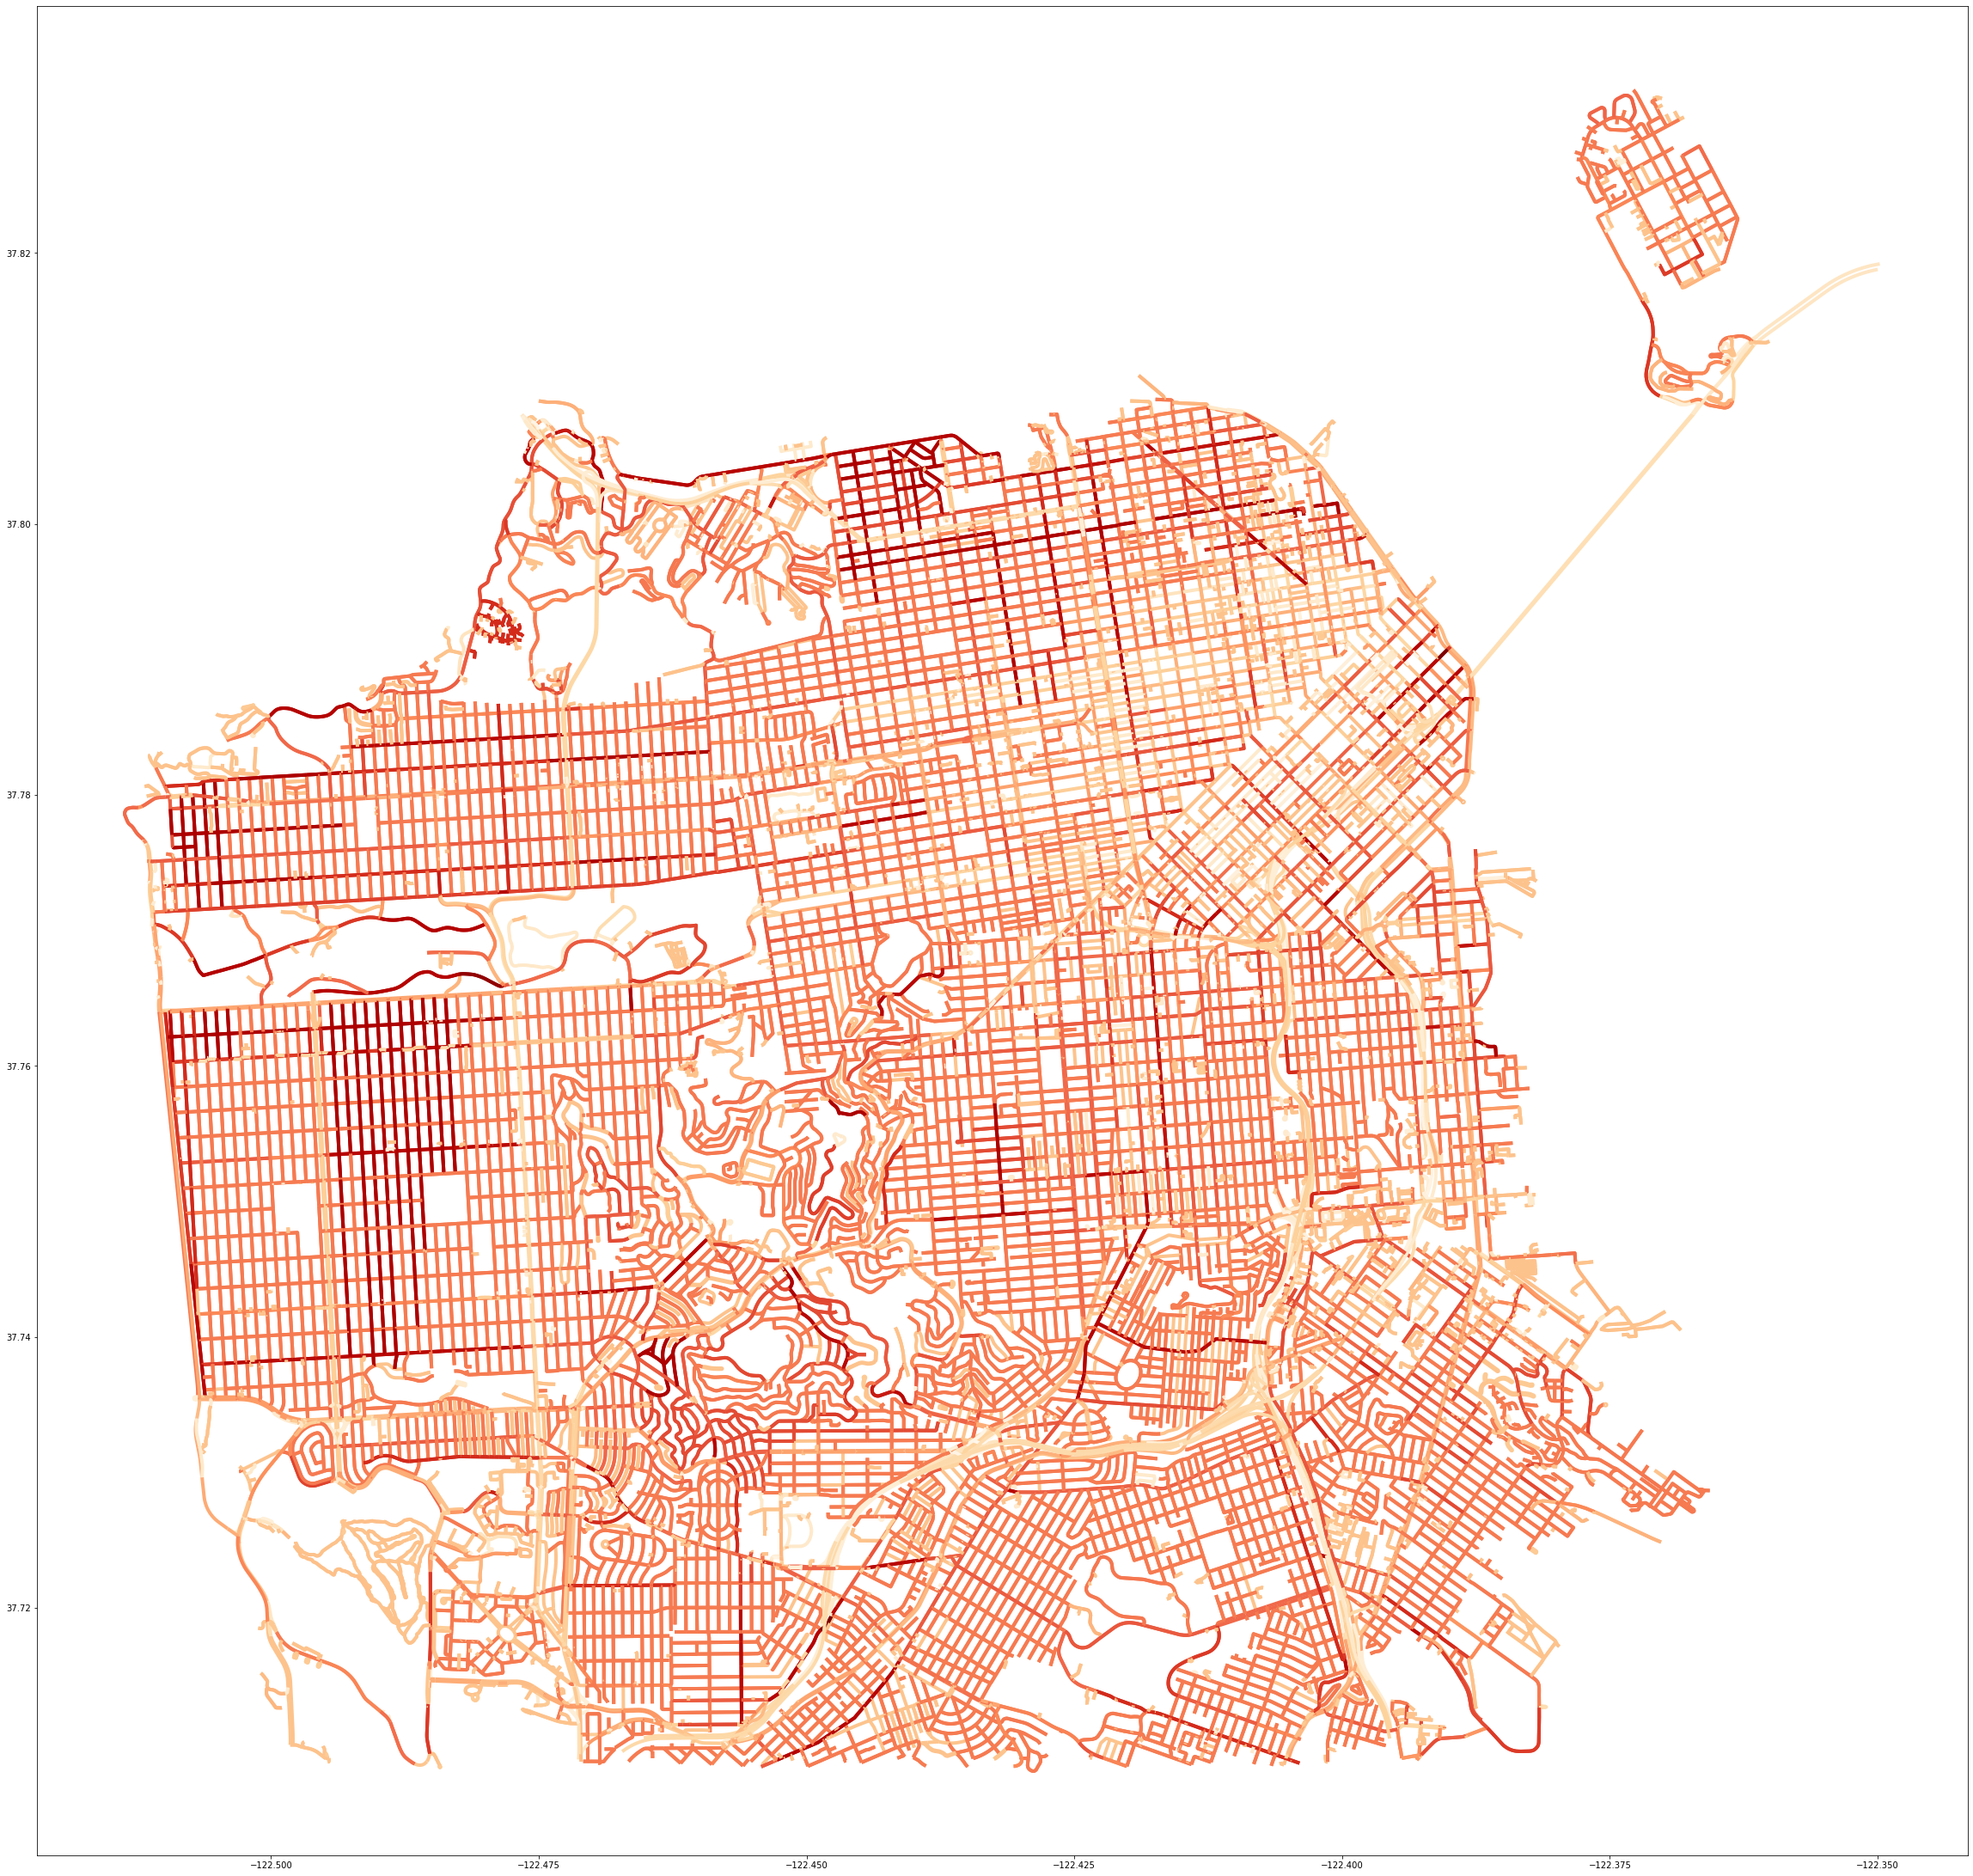

In [32]:
import matplotlib.pyplot as plt
import geopandas
fig, ax = plt.subplots(figsize=(32,40))
osmnx.plot(ax=ax, linewidth=4, column='predicted', cmap='OrRd')
plt.tight_layout()

In [33]:
min(osmnx['predicted'])

39.75689697265625

In [34]:
max(osmnx['predicted'])

54.21363830566406